# **Prepare Data**

## **Import Library**

In [95]:
# Import library
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

## **Load Data**

In [96]:
# Load Data
path = "../Data Arduino 4 treatment/fixed_formatData.xlsx"
df = pd.read_excel(path)
df

R      G       B  IR_Intensity (%)  Perlakuan  Pengambilan
0     151  149.0  106.40                73          0            1
1     151  149.0  109.78                73          0            1
2     149  149.0  106.40                73          0            1
3     149  149.0  130.06                73          0            1
4     149  151.4  106.40                73          0            1
...   ...    ...     ...               ...        ...          ...
1436  147  151.4  136.82                64          3            4
1437  149  153.8  140.20                64          3            4
1438  147  153.8  113.16                64          3            4
1439  149  153.8  123.30                64          3            4
1440  149  151.4  140.20                64          3            4

[1441 rows x 6 columns]

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R                 1441 non-null   int64  
 1   G                 1441 non-null   float64
 2   B                 1441 non-null   float64
 3   IR_Intensity (%)  1441 non-null   int64  
 4   Perlakuan         1441 non-null   int64  
 5   Pengambilan       1441 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 67.7 KB


## **Checking Outliers**

### **Visualisasi Outliers**

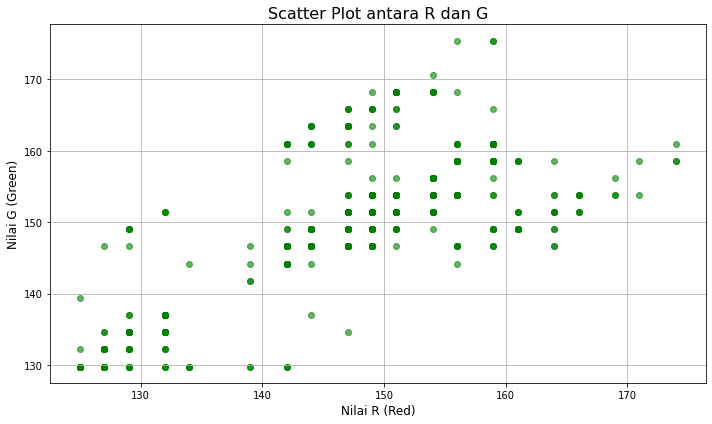

In [98]:
# Scatter plot antara R dan G
plt.figure(figsize=(10, 6))
plt.scatter(df['R'], df['G'], c='green', alpha=0.6)
plt.title("Scatter Plot antara R dan G", fontsize=16)
plt.xlabel("Nilai R (Red)", fontsize=12)
plt.ylabel("Nilai G (Green)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

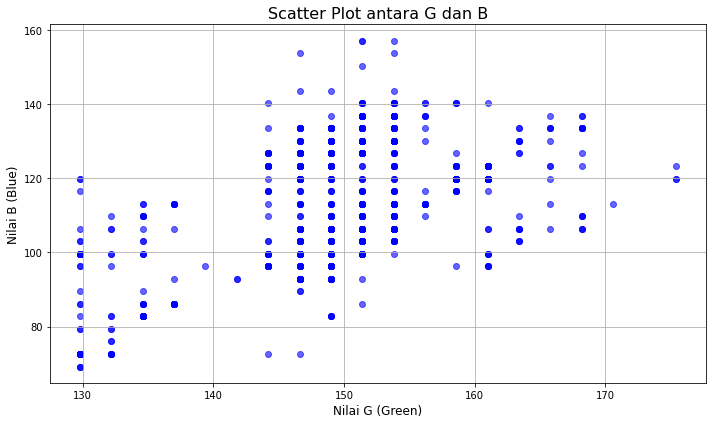

In [99]:
# Scatter plot antara G dan B
plt.figure(figsize=(10, 6))
plt.scatter(df['G'], df['B'], c='blue', alpha=0.6)
plt.title("Scatter Plot antara G dan B", fontsize=16)
plt.xlabel("Nilai G (Green)", fontsize=12)
plt.ylabel("Nilai B (Blue)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

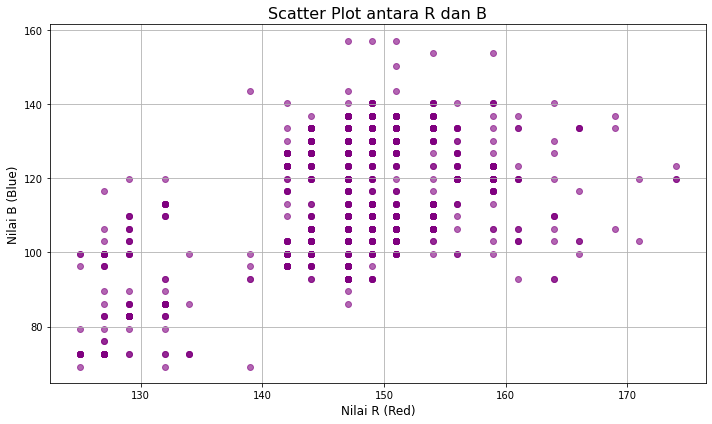

In [100]:
# Scatter plot antara R dan B
plt.figure(figsize=(10, 6))
plt.scatter(df['R'], df['B'], c='purple', alpha=0.6)
plt.title("Scatter Plot antara R dan B", fontsize=16)
plt.xlabel("Nilai R (Red)", fontsize=12)
plt.ylabel("Nilai B (Blue)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

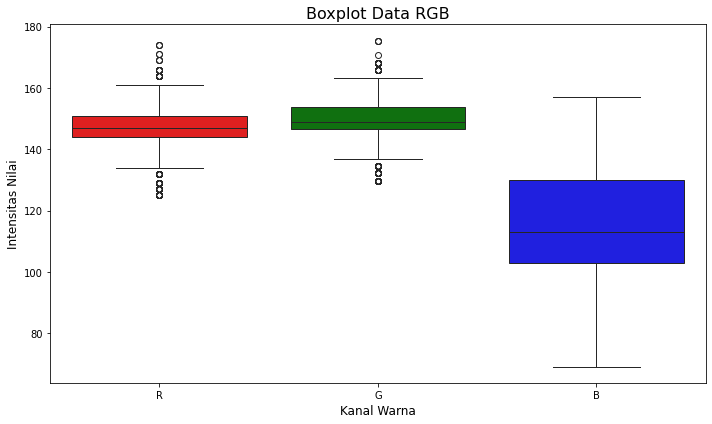

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['R', 'G', 'B']], palette=["red", "green", "blue"])
plt.title("Boxplot Data RGB", fontsize=16)
plt.ylabel("Intensitas Nilai", fontsize=12)
plt.xlabel("Kanal Warna", fontsize=12)
plt.tight_layout()
plt.show()


### **Mengatasi Outliers**

In [102]:
# Fungsi deteksi outlier dengan IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound), lower_bound, upper_bound

In [103]:
# Membuat salinan DataFrame untuk analisis tanpa memodifikasi DataFrame asli
df_cleaned = df.copy()

# Ubah kolom 'R' menjadi tipe data float
df_cleaned['R'] = df_cleaned['R'].astype(float)

for col in ['R', 'G', 'B']:
    outliers_mask, lower_bound, upper_bound = detect_outliers_iqr(df_cleaned[col])
    
    # Tampilkan data yang merupakan outlier
    outliers_data = df_cleaned.loc[outliers_mask, col]
    print(f"\nOutliers in column '{col}':")
    print(outliers_data)
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    
    # Ganti nilai outlier
    df_cleaned.loc[outliers_mask, col] = np.where(
        df_cleaned.loc[outliers_mask, col] < lower_bound,
        lower_bound,
        upper_bound
    )


Outliers in column 'R':
33      164.0
55      164.0
73      164.0
254     132.0
255     129.0
        ...  
1215    164.0
1222    171.0
1229    174.0
1257    164.0
1263    164.0
Name: R, Length: 158, dtype: float64
Lower bound: 133.5, Upper bound: 161.5

Outliers in column 'G':
27      165.8
254     132.2
255     129.8
256     132.2
257     132.2
        ...  
1199    165.8
1220    175.4
1241    175.4
1372    165.8
1416    165.8
Name: G, Length: 144, dtype: float64
Lower bound: 135.79999999999995, Upper bound: 164.60000000000002

Outliers in column 'B':
Series([], Name: B, dtype: float64)
Lower bound: 62.45999999999999, Upper bound: 170.62


In [104]:
# # # Membuat salinan DataFrame untuk analisis tanpa memodifikasi DataFrame asli
# df_cleaned = df.copy()

# # Terapkan Winsorization langsung pada kolom R, G, dan B
# df_cleaned['R'] = winsorize(df_cleaned['R'], limits=[0.05, 0.05])
# df_cleaned['G'] = winsorize(df_cleaned['G'], limits=[0.05, 0.05])
# df_cleaned['B'] = winsorize(df_cleaned['B'], limits=[0.05, 0.05])

In [105]:
# # Membuat salinan DataFrame untuk analisis tanpa memodifikasi DataFrame asli
# df_cleaned = df.copy()

# # Menghapus outlier dari salinan DataFrame
# df_cleaned = df_cleaned[~df_cleaned['R'].isin(outliers_R)]
# df_cleaned = df_cleaned[~df_cleaned['G'].isin(outliers_G)]
# df_cleaned = df_cleaned[~df_cleaned['B'].isin(outliers_B)]

# # Menampilkan jumlah data sebelum dan sesudah pembersihan
# print("Jumlah data sebelum pembersihan:", len(df))
# print("Jumlah data setelah pembersihan:", len(df_cleaned))

In [106]:
df_cleaned

R      G       B  IR_Intensity (%)  Perlakuan  Pengambilan
0     151.0  149.0  106.40                73          0            1
1     151.0  149.0  109.78                73          0            1
2     149.0  149.0  106.40                73          0            1
3     149.0  149.0  130.06                73          0            1
4     149.0  151.4  106.40                73          0            1
...     ...    ...     ...               ...        ...          ...
1436  147.0  151.4  136.82                64          3            4
1437  149.0  153.8  140.20                64          3            4
1438  147.0  153.8  113.16                64          3            4
1439  149.0  153.8  123.30                64          3            4
1440  149.0  151.4  140.20                64          3            4

[1441 rows x 6 columns]

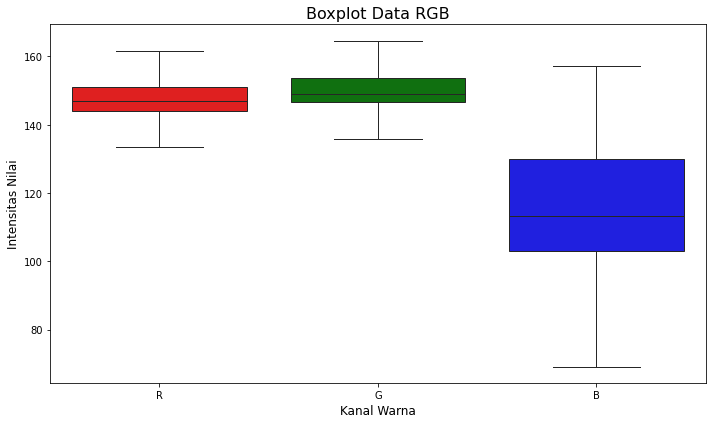

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[['R', 'G', 'B']], palette=["red", "green", "blue"])
plt.title("Boxplot Data RGB", fontsize=16)
plt.ylabel("Intensitas Nilai", fontsize=12)
plt.xlabel("Kanal Warna", fontsize=12)
plt.tight_layout()
plt.show()

## **Ekstraksi Fitur**

### **Normalisasi Kanal RGB**

In [108]:
def normalize_rgb(df):
    # Salin dataframe
    df_norm = df.copy()
    # Normalisasi kolom R, G, dan B
    df_norm['r'] = df_norm['R'] / 255
    df_norm['g'] = df_norm['G'] / 255
    df_norm['b'] = df_norm['B'] / 255

    return df_norm

In [109]:
df_norm= normalize_rgb(df)
df_norm

R      G       B  IR_Intensity (%)  Perlakuan  Pengambilan         r  \
0     151  149.0  106.40                73          0            1  0.592157   
1     151  149.0  109.78                73          0            1  0.592157   
2     149  149.0  106.40                73          0            1  0.584314   
3     149  149.0  130.06                73          0            1  0.584314   
4     149  151.4  106.40                73          0            1  0.584314   
...   ...    ...     ...               ...        ...          ...       ...   
1436  147  151.4  136.82                64          3            4  0.576471   
1437  149  153.8  140.20                64          3            4  0.584314   
1438  147  153.8  113.16                64          3            4  0.576471   
1439  149  153.8  123.30                64          3            4  0.584314   
1440  149  151.4  140.20                64          3            4  0.584314   

             g         b  
0     0.584314  0.417255  
1     0.584314  0.430510  
2     0.584314  0.417255  
3     0.584314  0.510039  
4     0.593725  0.417255  
...        ...       ...  
1436  0.593725  0.536549  
1437  0.603137  0.549804  
1438  0.603137  0.443765  
1439  0.603137  0.483529  
1440  0.593725  0.549804  

[1441 rows x 9 columns]

In [110]:
df_norm_co=normalize_rgb(df_cleaned)
df_norm_co

R      G       B  IR_Intensity (%)  Perlakuan  Pengambilan  \
0     151.0  149.0  106.40                73          0            1   
1     151.0  149.0  109.78                73          0            1   
2     149.0  149.0  106.40                73          0            1   
3     149.0  149.0  130.06                73          0            1   
4     149.0  151.4  106.40                73          0            1   
...     ...    ...     ...               ...        ...          ...   
1436  147.0  151.4  136.82                64          3            4   
1437  149.0  153.8  140.20                64          3            4   
1438  147.0  153.8  113.16                64          3            4   
1439  149.0  153.8  123.30                64          3            4   
1440  149.0  151.4  140.20                64          3            4   

             r         g         b  
0     0.592157  0.584314  0.417255  
1     0.592157  0.584314  0.430510  
2     0.584314  0.584314  0.417255  
3     0.584314  0.584314  0.510039  
4     0.584314  0.593725  0.417255  
...        ...       ...       ...  
1436  0.576471  0.593725  0.536549  
1437  0.584314  0.603137  0.549804  
1438  0.576471  0.603137  0.443765  
1439  0.584314  0.603137  0.483529  
1440  0.584314  0.593725  0.549804  

[1441 rows x 9 columns]

### **Perbandingan Kanal**

In [111]:
def calculate_ratios(df):
    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_rasio = df_norm.copy()

    # Hitung rasio R/G
    df_rasio['R/Gratio'] = df_rasio['R'] / df_rasio['G']

    # Hitung rasio G/B
    df_rasio['G/Bratio'] = df_rasio['G'] / df_rasio['B']

    return df_rasio

In [112]:
df_rasio = calculate_ratios(df_norm)
df_rasio

R      G       B  IR_Intensity (%)  Perlakuan  Pengambilan         r  \
0     151  149.0  106.40                73          0            1  0.592157   
1     151  149.0  109.78                73          0            1  0.592157   
2     149  149.0  106.40                73          0            1  0.584314   
3     149  149.0  130.06                73          0            1  0.584314   
4     149  151.4  106.40                73          0            1  0.584314   
...   ...    ...     ...               ...        ...          ...       ...   
1436  147  151.4  136.82                64          3            4  0.576471   
1437  149  153.8  140.20                64          3            4  0.584314   
1438  147  153.8  113.16                64          3            4  0.576471   
1439  149  153.8  123.30                64          3            4  0.584314   
1440  149  151.4  140.20                64          3            4  0.584314   

             g         b  R/Gratio  G/Bratio  
0     0.584314  0.417255  1.013423  1.400376  
1     0.584314  0.430510  1.013423  1.357260  
2     0.584314  0.417255  1.000000  1.400376  
3     0.584314  0.510039  1.000000  1.145625  
4     0.593725  0.417255  0.984148  1.422932  
...        ...       ...       ...       ...  
1436  0.593725  0.536549  0.970938  1.106563  
1437  0.603137  0.549804  0.968791  1.097004  
1438  0.603137  0.443765  0.955787  1.359138  
1439  0.603137  0.483529  0.968791  1.247364  
1440  0.593725  0.549804  0.984148  1.079886  

[1441 rows x 11 columns]

In [113]:
df_rasio_co = calculate_ratios(df_norm_co)
df_rasio_co

R      G       B  IR_Intensity (%)  Perlakuan  Pengambilan         r  \
0     151  149.0  106.40                73          0            1  0.592157   
1     151  149.0  109.78                73          0            1  0.592157   
2     149  149.0  106.40                73          0            1  0.584314   
3     149  149.0  130.06                73          0            1  0.584314   
4     149  151.4  106.40                73          0            1  0.584314   
...   ...    ...     ...               ...        ...          ...       ...   
1436  147  151.4  136.82                64          3            4  0.576471   
1437  149  153.8  140.20                64          3            4  0.584314   
1438  147  153.8  113.16                64          3            4  0.576471   
1439  149  153.8  123.30                64          3            4  0.584314   
1440  149  151.4  140.20                64          3            4  0.584314   

             g         b  R/Gratio  G/Bratio  
0     0.584314  0.417255  1.013423  1.400376  
1     0.584314  0.430510  1.013423  1.357260  
2     0.584314  0.417255  1.000000  1.400376  
3     0.584314  0.510039  1.000000  1.145625  
4     0.593725  0.417255  0.984148  1.422932  
...        ...       ...       ...       ...  
1436  0.593725  0.536549  0.970938  1.106563  
1437  0.603137  0.549804  0.968791  1.097004  
1438  0.603137  0.443765  0.955787  1.359138  
1439  0.603137  0.483529  0.968791  1.247364  
1440  0.593725  0.549804  0.984148  1.079886  

[1441 rows x 11 columns]

### **Mencari Nilai HSV**

In [114]:
def rgb_to_hsv(df):
    # Salin dataframe
    df_hsv = df_rasio.copy()
    
    # Ekstrak kolom r, g, dan b
    r = df_hsv['r']
    g = df_hsv['g']
    b = df_hsv['b']

    # Hitung nilai maksimum (V) dan minimum (m)
    cmax = np.maximum.reduce([r, g, b])
    cmin = np.minimum.reduce([r, g, b])
    delta = cmax - cmin

    # Hitung Hue (H)
    def calculate_hue():
        hue = np.zeros_like(delta)  # Default hue adalah 0
        mask_r_max = (cmax == r) & (delta != 0)
        mask_g_max = (cmax == g) & (delta != 0)
        mask_b_max = (cmax == b) & (delta != 0)

        # Rumus untuk hue jika R adalah maksimum
        hue[mask_r_max] = (60 * ((g[mask_r_max] - b[mask_r_max]) / delta[mask_r_max]) + 360) % 360

        # Rumus untuk hue jika G adalah maksimum
        hue[mask_g_max] = (60 * ((b[mask_g_max] - r[mask_g_max]) / delta[mask_g_max]) + 120) % 360

        # Rumus untuk hue jika B adalah maksimum
        hue[mask_b_max] = (60 * ((r[mask_b_max] - g[mask_b_max]) / delta[mask_b_max]) + 240) % 360

        return hue

    h = calculate_hue()

    # Hitung Saturation (S)
    s = np.where(cmax != 0, delta / cmax, 0)

    # Value (V) adalah nilai maksimum
    v = cmax

    # Tambahkan kolom h, s, dan v ke DataFrame
    df_hsv['H'] = h
    df_hsv['S'] = s
    df_hsv['V'] = v

    return df_hsv

In [115]:
df_hsv = rgb_to_hsv(df_rasio)
df_hsv

R      G       B  IR_Intensity (%)  Perlakuan  Pengambilan         r  \
0     151  149.0  106.40                73          0            1  0.592157   
1     151  149.0  109.78                73          0            1  0.592157   
2     149  149.0  106.40                73          0            1  0.584314   
3     149  149.0  130.06                73          0            1  0.584314   
4     149  151.4  106.40                73          0            1  0.584314   
...   ...    ...     ...               ...        ...          ...       ...   
1436  147  151.4  136.82                64          3            4  0.576471   
1437  149  153.8  140.20                64          3            4  0.584314   
1438  147  153.8  113.16                64          3            4  0.576471   
1439  149  153.8  123.30                64          3            4  0.584314   
1440  149  151.4  140.20                64          3            4  0.584314   

             g         b  R/Gratio  G/Bratio          H         S         V  
0     0.584314  0.417255  1.013423  1.400376  57.309417  0.295364  0.592157  
1     0.584314  0.430510  1.013423  1.357260  57.088792  0.272980  0.592157  
2     0.584314  0.417255  1.000000  1.400376  60.000000  0.285906  0.584314  
3     0.584314  0.510039  1.000000  1.145625  60.000000  0.127114  0.584314  
4     0.593725  0.417255  0.984148  1.422932  63.200000  0.297226  0.593725  
...        ...       ...       ...       ...        ...       ...       ...  
1436  0.593725  0.536549  0.970938  1.106563  78.106996  0.096301  0.593725  
1437  0.603137  0.549804  0.968791  1.097004  81.176471  0.088427  0.603137  
1438  0.603137  0.443765  0.955787  1.359138  70.039370  0.264239  0.603137  
1439  0.603137  0.483529  0.968791  1.247364  69.442623  0.198309  0.603137  
1440  0.593725  0.549804  0.984148  1.079886  72.857143  0.073976  0.593725  

[1441 rows x 14 columns]

In [116]:
df_hsv_co=rgb_to_hsv(df_rasio_co)
df_hsv_co

R      G       B  IR_Intensity (%)  Perlakuan  Pengambilan         r  \
0     151  149.0  106.40                73          0            1  0.592157   
1     151  149.0  109.78                73          0            1  0.592157   
2     149  149.0  106.40                73          0            1  0.584314   
3     149  149.0  130.06                73          0            1  0.584314   
4     149  151.4  106.40                73          0            1  0.584314   
...   ...    ...     ...               ...        ...          ...       ...   
1436  147  151.4  136.82                64          3            4  0.576471   
1437  149  153.8  140.20                64          3            4  0.584314   
1438  147  153.8  113.16                64          3            4  0.576471   
1439  149  153.8  123.30                64          3            4  0.584314   
1440  149  151.4  140.20                64          3            4  0.584314   

             g         b  R/Gratio  G/Bratio          H         S         V  
0     0.584314  0.417255  1.013423  1.400376  57.309417  0.295364  0.592157  
1     0.584314  0.430510  1.013423  1.357260  57.088792  0.272980  0.592157  
2     0.584314  0.417255  1.000000  1.400376  60.000000  0.285906  0.584314  
3     0.584314  0.510039  1.000000  1.145625  60.000000  0.127114  0.584314  
4     0.593725  0.417255  0.984148  1.422932  63.200000  0.297226  0.593725  
...        ...       ...       ...       ...        ...       ...       ...  
1436  0.593725  0.536549  0.970938  1.106563  78.106996  0.096301  0.593725  
1437  0.603137  0.549804  0.968791  1.097004  81.176471  0.088427  0.603137  
1438  0.603137  0.443765  0.955787  1.359138  70.039370  0.264239  0.603137  
1439  0.603137  0.483529  0.968791  1.247364  69.442623  0.198309  0.603137  
1440  0.593725  0.549804  0.984148  1.079886  72.857143  0.073976  0.593725  

[1441 rows x 14 columns]

### **Mencari Nilai Lab**

#### **Hitung Manual**

In [117]:
def rgb_to_lab(df):
    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_lab = df_hsv.copy()

    # Normalisasi RGB ke rentang [0, 1]
    r = df_lab['r']
    g = df_lab['g']
    b = df_lab['b']

    # Koreksi gamma untuk nilai RGB
    def gamma_correction(c):
        return np.where(c > 0.04045, ((c + 0.055) / 1.055) ** 2.4, c / 12.92)

    # Terapkan koreksi gamma
    r_linear = gamma_correction(r)
    g_linear = gamma_correction(g)
    b_linear = gamma_correction(b)

    # Transformasi RGB ke XYZ menggunakan matriks standar
    X = 0.4124564 * r_linear + 0.3575761 * g_linear + 0.1804375 * b_linear
    Y = 0.2126729 * r_linear + 0.7151522 * g_linear + 0.0721750 * b_linear
    Z = 0.0193339 * r_linear + 0.1191920 * g_linear + 0.9503041 * b_linear

    # Nilai referensi untuk XYZ (D65/2° standard illuminant)
    Xn, Yn, Zn = 0.95047, 1.0, 1.08883

    # Fungsi untuk menghitung f(t)
    def f(t):
        return np.where(t > 0.008856, t ** (1/3), 7.787 * t + 16/116)

    # Hitung L, a, dan b
    L = 116 * f(Y / Yn) - 16
    a = 500 * (f(X / Xn) - f(Y / Yn))
    b = 200 * (f(Y / Yn) - f(Z / Zn))

    # Tambahkan kolom L, a, dan b ke DataFrame
    df_lab['cL'] = L
    df_lab['ca'] = a
    df_lab['cb'] = b

    return df_lab

In [118]:
df_lab=rgb_to_lab(df_hsv)
df_lab

R      G       B  IR_Intensity (%)  Perlakuan  Pengambilan         r  \
0     151  149.0  106.40                73          0            1  0.592157   
1     151  149.0  109.78                73          0            1  0.592157   
2     149  149.0  106.40                73          0            1  0.584314   
3     149  149.0  130.06                73          0            1  0.584314   
4     149  151.4  106.40                73          0            1  0.584314   
...   ...    ...     ...               ...        ...          ...       ...   
1436  147  151.4  136.82                64          3            4  0.576471   
1437  149  153.8  140.20                64          3            4  0.584314   
1438  147  153.8  113.16                64          3            4  0.576471   
1439  149  153.8  123.30                64          3            4  0.584314   
1440  149  151.4  140.20                64          3            4  0.584314   

             g         b  R/Gratio  G/Bratio          H         S         V  \
0     0.584314  0.417255  1.013423  1.400376  57.309417  0.295364  0.592157   
1     0.584314  0.430510  1.013423  1.357260  57.088792  0.272980  0.592157   
2     0.584314  0.417255  1.000000  1.400376  60.000000  0.285906  0.584314   
3     0.584314  0.510039  1.000000  1.145625  60.000000  0.127114  0.584314   
4     0.593725  0.417255  0.984148  1.422932  63.200000  0.297226  0.593725   
...        ...       ...       ...       ...        ...       ...       ...   
1436  0.593725  0.536549  0.970938  1.106563  78.106996  0.096301  0.593725   
1437  0.603137  0.549804  0.968791  1.097004  81.176471  0.088427  0.603137   
1438  0.603137  0.443765  0.955787  1.359138  70.039370  0.264239  0.603137   
1439  0.603137  0.483529  0.968791  1.247364  69.442623  0.198309  0.603137   
1440  0.593725  0.549804  0.984148  1.079886  72.857143  0.073976  0.593725   

             cL        ca         cb  
0     60.890564 -6.299734  22.830546  
1     60.953899 -5.827671  21.044019  
2     60.723155 -7.112026  22.577013  
3     61.218617 -3.447379  10.020923  
4     61.395413 -8.411532  23.476470  
...         ...       ...        ...  
1436  61.883257 -4.341136   7.130325  
1437  62.788701 -4.301695   6.543102  
1438  62.035710 -9.534773  20.581252  
1439  62.399884 -7.187258  15.471242  
1440  62.126888 -2.982561   5.593500  

[1441 rows x 17 columns]

In [119]:
df_lab_co=rgb_to_lab(df_hsv_co)
df_lab_co

R      G       B  IR_Intensity (%)  Perlakuan  Pengambilan         r  \
0     151  149.0  106.40                73          0            1  0.592157   
1     151  149.0  109.78                73          0            1  0.592157   
2     149  149.0  106.40                73          0            1  0.584314   
3     149  149.0  130.06                73          0            1  0.584314   
4     149  151.4  106.40                73          0            1  0.584314   
...   ...    ...     ...               ...        ...          ...       ...   
1436  147  151.4  136.82                64          3            4  0.576471   
1437  149  153.8  140.20                64          3            4  0.584314   
1438  147  153.8  113.16                64          3            4  0.576471   
1439  149  153.8  123.30                64          3            4  0.584314   
1440  149  151.4  140.20                64          3            4  0.584314   

             g         b  R/Gratio  G/Bratio          H         S         V  \
0     0.584314  0.417255  1.013423  1.400376  57.309417  0.295364  0.592157   
1     0.584314  0.430510  1.013423  1.357260  57.088792  0.272980  0.592157   
2     0.584314  0.417255  1.000000  1.400376  60.000000  0.285906  0.584314   
3     0.584314  0.510039  1.000000  1.145625  60.000000  0.127114  0.584314   
4     0.593725  0.417255  0.984148  1.422932  63.200000  0.297226  0.593725   
...        ...       ...       ...       ...        ...       ...       ...   
1436  0.593725  0.536549  0.970938  1.106563  78.106996  0.096301  0.593725   
1437  0.603137  0.549804  0.968791  1.097004  81.176471  0.088427  0.603137   
1438  0.603137  0.443765  0.955787  1.359138  70.039370  0.264239  0.603137   
1439  0.603137  0.483529  0.968791  1.247364  69.442623  0.198309  0.603137   
1440  0.593725  0.549804  0.984148  1.079886  72.857143  0.073976  0.593725   

             cL        ca         cb  
0     60.890564 -6.299734  22.830546  
1     60.953899 -5.827671  21.044019  
2     60.723155 -7.112026  22.577013  
3     61.218617 -3.447379  10.020923  
4     61.395413 -8.411532  23.476470  
...         ...       ...        ...  
1436  61.883257 -4.341136   7.130325  
1437  62.788701 -4.301695   6.543102  
1438  62.035710 -9.534773  20.581252  
1439  62.399884 -7.187258  15.471242  
1440  62.126888 -2.982561   5.593500  

[1441 rows x 17 columns]

#### **Hitung Dengan Library OpenCV**

In [120]:
def rgb_to_lab_with_opencv(df):

    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_cv = df_hsv.copy()

    # Konversi RGB ke LAB menggunakan OpenCV
    rgb_values = df_cv[['R', 'G', 'B']].values.astype(np.uint8)
    rgb_values = rgb_values[:, ::-1]
    lab_values = cv2.cvtColor(rgb_values.reshape(1, -1, 3), cv2.COLOR_BGR2LAB).reshape(-1, 3)

    # Pisahkan nilai L, a, dan b
    L = lab_values[:, 0] * (100 / 255)  # Konversi L ke rentang [0, 100]
    
    # Ubah tipe data a dan b ke float sebelum penggeseran
    a = lab_values[:, 1].astype(float) - 128  # Geser a ke rentang [-128, 127]
    b = lab_values[:, 2].astype(float) - 128  # Geser b ke rentang [-128, 127]

    # Tambahkan kolom cL, ca, dan cb ke DataFrame
    df_cv['cL'] = L
    df_cv['ca'] = a
    df_cv['cb'] = b

    return df_cv

In [121]:
df_cv=rgb_to_lab_with_opencv(df_hsv)
df_cv

R      G       B  IR_Intensity (%)  Perlakuan  Pengambilan         r  \
0     151  149.0  106.40                73          0            1  0.592157   
1     151  149.0  109.78                73          0            1  0.592157   
2     149  149.0  106.40                73          0            1  0.584314   
3     149  149.0  130.06                73          0            1  0.584314   
4     149  151.4  106.40                73          0            1  0.584314   
...   ...    ...     ...               ...        ...          ...       ...   
1436  147  151.4  136.82                64          3            4  0.576471   
1437  149  153.8  140.20                64          3            4  0.584314   
1438  147  153.8  113.16                64          3            4  0.576471   
1439  149  153.8  123.30                64          3            4  0.584314   
1440  149  151.4  140.20                64          3            4  0.584314   

             g         b  R/Gratio  G/Bratio          H         S         V  \
0     0.584314  0.417255  1.013423  1.400376  57.309417  0.295364  0.592157   
1     0.584314  0.430510  1.013423  1.357260  57.088792  0.272980  0.592157   
2     0.584314  0.417255  1.000000  1.400376  60.000000  0.285906  0.584314   
3     0.584314  0.510039  1.000000  1.145625  60.000000  0.127114  0.584314   
4     0.593725  0.417255  0.984148  1.422932  63.200000  0.297226  0.593725   
...        ...       ...       ...       ...        ...       ...       ...   
1436  0.593725  0.536549  0.970938  1.106563  78.106996  0.096301  0.593725   
1437  0.603137  0.549804  0.968791  1.097004  81.176471  0.088427  0.603137   
1438  0.603137  0.443765  0.955787  1.359138  70.039370  0.264239  0.603137   
1439  0.603137  0.483529  0.968791  1.247364  69.442623  0.198309  0.603137   
1440  0.593725  0.549804  0.984148  1.079886  72.857143  0.073976  0.593725   

             cL   ca    cb  
0     60.784314 -6.0  23.0  
1     61.176471 -6.0  21.0  
2     60.784314 -7.0  23.0  
3     61.176471 -4.0  10.0  
4     61.176471 -8.0  23.0  
...         ...  ...   ...  
1436  61.960784 -4.0   7.0  
1437  62.745098 -4.0   6.0  
1438  61.960784 -9.0  20.0  
1439  62.352941 -7.0  15.0  
1440  61.960784 -3.0   5.0  

[1441 rows x 17 columns]

In [122]:
df_cv_co=rgb_to_lab_with_opencv(df_hsv_co)
df_cv_co

R      G       B  IR_Intensity (%)  Perlakuan  Pengambilan         r  \
0     151  149.0  106.40                73          0            1  0.592157   
1     151  149.0  109.78                73          0            1  0.592157   
2     149  149.0  106.40                73          0            1  0.584314   
3     149  149.0  130.06                73          0            1  0.584314   
4     149  151.4  106.40                73          0            1  0.584314   
...   ...    ...     ...               ...        ...          ...       ...   
1436  147  151.4  136.82                64          3            4  0.576471   
1437  149  153.8  140.20                64          3            4  0.584314   
1438  147  153.8  113.16                64          3            4  0.576471   
1439  149  153.8  123.30                64          3            4  0.584314   
1440  149  151.4  140.20                64          3            4  0.584314   

             g         b  R/Gratio  G/Bratio          H         S         V  \
0     0.584314  0.417255  1.013423  1.400376  57.309417  0.295364  0.592157   
1     0.584314  0.430510  1.013423  1.357260  57.088792  0.272980  0.592157   
2     0.584314  0.417255  1.000000  1.400376  60.000000  0.285906  0.584314   
3     0.584314  0.510039  1.000000  1.145625  60.000000  0.127114  0.584314   
4     0.593725  0.417255  0.984148  1.422932  63.200000  0.297226  0.593725   
...        ...       ...       ...       ...        ...       ...       ...   
1436  0.593725  0.536549  0.970938  1.106563  78.106996  0.096301  0.593725   
1437  0.603137  0.549804  0.968791  1.097004  81.176471  0.088427  0.603137   
1438  0.603137  0.443765  0.955787  1.359138  70.039370  0.264239  0.603137   
1439  0.603137  0.483529  0.968791  1.247364  69.442623  0.198309  0.603137   
1440  0.593725  0.549804  0.984148  1.079886  72.857143  0.073976  0.593725   

             cL   ca    cb  
0     60.784314 -6.0  23.0  
1     61.176471 -6.0  21.0  
2     60.784314 -7.0  23.0  
3     61.176471 -4.0  10.0  
4     61.176471 -8.0  23.0  
...         ...  ...   ...  
1436  61.960784 -4.0   7.0  
1437  62.745098 -4.0   6.0  
1438  61.960784 -9.0  20.0  
1439  62.352941 -7.0  15.0  
1440  61.960784 -3.0   5.0  

[1441 rows x 17 columns]

# **Seleksi Fitur Gabungan Fitur**

## **Import Library**

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import joblib
import os
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
import warnings
import itertools
import time

In [124]:
# Matikan FutureWarning, ConvergenceWarning, dan UndefinedMetricWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

## **Mempersiapkan Data**

In [125]:
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R                 1441 non-null   int64  
 1   G                 1441 non-null   float64
 2   B                 1441 non-null   float64
 3   IR_Intensity (%)  1441 non-null   int64  
 4   Perlakuan         1441 non-null   int64  
 5   Pengambilan       1441 non-null   int64  
 6   r                 1441 non-null   float64
 7   g                 1441 non-null   float64
 8   b                 1441 non-null   float64
 9   R/Gratio          1441 non-null   float64
 10  G/Bratio          1441 non-null   float64
 11  H                 1441 non-null   float64
 12  S                 1441 non-null   float64
 13  V                 1441 non-null   float64
 14  cL                1441 non-null   float64
 15  ca                1441 non-null   float64
 16  cb                1441 non-null   float64


### **Membuat Kombinasi Grup**

In [126]:
# Data input
grup_fitur = {
    'RGB': ['R', 'G', 'B'],
    'rgb': ['r', 'g', 'b'],
    'HSV': ['H', 'S', 'V'],
    'CLab': ['cL', 'ca', 'cb'],
    'R/Gratio': ['R/Gratio'],
    'G/Bratio': ['G/Bratio'],
}

# Inisialisasi kamus kombinasi
kombinasi_grup = {}

# Tambahkan semua grup individu terlebih dahulu
for group_name, features in grup_fitur.items():
    kombinasi_grup[group_name] = grup_fitur[group_name]

# Buat set fitur "Full" dengan semua fitur yang digabungkan
all_features = []
for features in grup_fitur.values():
    all_features.extend(features)
kombinasi_grup['Full'] = all_features

# Hasilkan kombinasi dari 2 grup fitur
groups = list(grup_fitur.keys())
for i, j in itertools.combinations(groups, 2):
    combo_name = f"{i}_{j}"
    kombinasi_grup[combo_name] = grup_fitur[i] + grup_fitur[j]

# Hasilkan kombinasi dari 3 grup fitur
for i, j, k in itertools.combinations(groups, 3):
    combo_name = f"{i}_{j}_{k}"
    kombinasi_grup[combo_name] = grup_fitur[i] + grup_fitur[j] + grup_fitur[k]

# Hasilkan kombinasi dari 4 grup fitur
for i, j, k, l in itertools.combinations(groups, 4):
    combo_name = f"{i}_{j}_{k}_{l}"
    kombinasi_grup[combo_name] = grup_fitur[i] + grup_fitur[j] + grup_fitur[k] + grup_fitur[l]

# Hasilkan kombinasi dari 5 grup fitur
for i, j, k, l, m in itertools.combinations(groups, 5):
    combo_name = f"{i}_{j}_{k}_{l}_{m}"
    kombinasi_grup[combo_name] = grup_fitur[i] + grup_fitur[j] + grup_fitur[k] + grup_fitur[l] + grup_fitur[m]

### **Membuat Dictionary**

In [127]:
def prepare_data_variasi_fitur(df, kombinasi_grup):
    hasil_split = {}

    for nama_grup, fitur in kombinasi_grup.items():
        X = df[fitur]
        y = df['Perlakuan']

        # Membagi data menjadi set pelatihan dan pengujian
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
        
        # Preprocessing data tanpa split untuk ANN: StandardScaler
        scaler_ann = StandardScaler()
        # Preprocessing untuk ANN: StandardScaler
        X_train_ann = scaler_ann.fit_transform(X_train)
        X_test_ann = scaler_ann.transform(X_test)
        
        # Preprocessing data tanpa split untuk AdaBoost SVM: StandardScaler
        scaler_svm = StandardScaler()
        X_train_svm = scaler_svm.fit_transform(X_train)
        X_test_svm = scaler_svm.transform(X_test)

        # Preprocessing untuk AdaBoost DT: Tanpa scaling
        X_train_dt = X_train.values
        X_test_dt = X_test.values

        hasil_split[nama_grup] = {
            'X_train_ann': X_train_ann, 'X_test_ann': X_test_ann,
            'X_train_svm': X_train_svm, 'X_test_svm': X_test_svm,
            'X_train_dt': X_train_dt, 'X_test_dt': X_test_dt,
            'y_train': y_train, 'y_test': y_test,
            'fitur': fitur
        }

        print(f"Grup: {nama_grup}")
        print(f"Jumlah fitur yang digunakan: {len(fitur)}")
        print(f"Fitur: {fitur}")
        print(f"Jumlah data training: {X_train.shape[0]}")
        print(f"Jumlah data testing: {X_test.shape[0]}")
        print(f"Jumlah data training ANN: {X_train_ann.shape[0]}")
        print(f"Jumlah data testing ANN: {X_test_ann.shape[0]}")
        print(f"Jumlah data training SVM: {X_train_svm.shape[0]}")
        print(f"Jumlah data testing SVM: {X_test_svm.shape[0]}")
        print(f"Jumlah y_train: {y_train.shape[0]}")
        print(f"Jumlah y_test: {y_test.shape[0]}")

    return hasil_split


In [128]:
data_prep = prepare_data_variasi_fitur(df_lab, kombinasi_grup)

Grup: RGB
Jumlah fitur yang digunakan: 3
Fitur: ['R', 'G', 'B']
Jumlah data training: 1008
Jumlah data testing: 433
Jumlah data training ANN: 1008
Jumlah data testing ANN: 433
Jumlah data training SVM: 1008
Jumlah data testing SVM: 433
Jumlah y_train: 1008
Jumlah y_test: 433
Grup: rgb
Jumlah fitur yang digunakan: 3
Fitur: ['r', 'g', 'b']
Jumlah data training: 1008
Jumlah data testing: 433
Jumlah data training ANN: 1008
Jumlah data testing ANN: 433
Jumlah data training SVM: 1008
Jumlah data testing SVM: 433
Jumlah y_train: 1008
Jumlah y_test: 433
Grup: HSV
Jumlah fitur yang digunakan: 3
Fitur: ['H', 'S', 'V']
Jumlah data training: 1008
Jumlah data testing: 433
Jumlah data training ANN: 1008
Jumlah data testing ANN: 433
Jumlah data training SVM: 1008
Jumlah data testing SVM: 433
Jumlah y_train: 1008
Jumlah y_test: 433
Grup: CLab
Jumlah fitur yang digunakan: 3
Fitur: ['cL', 'ca', 'cb']
Jumlah data training: 1008
Jumlah data testing: 433
Jumlah data training ANN: 1008
Jumlah data testing A

In [129]:
data_prep

{'RGB': {'X_train_ann': array([[ 0.26102096,  0.28250637, -0.45739047],
         [ 0.51609525,  0.28250637, -0.66432475],
         [ 0.00594667, -0.05569603,  0.99114954],
         ...,
         [ 0.00594667,  0.28250637, -0.25045618],
         [ 0.00594667, -0.39389844, -1.28512761],
         [-0.37666476, -0.05569603,  0.99114954]]),
  'X_test_ann': array([[ 0.00594667,  0.28250637,  1.19808383],
         [ 0.00594667, -0.05569603,  0.37034668],
         [ 2.81176382,  0.95891119,  1.40501811],
         ...,
         [-0.37666476, -0.05569603, -0.66432475],
         [ 1.53639239,  1.29711359,  0.37034668],
         [ 0.00594667, -0.05569603, -1.07819333]]),
  'X_train_svm': array([[ 0.26102096,  0.28250637, -0.45739047],
         [ 0.51609525,  0.28250637, -0.66432475],
         [ 0.00594667, -0.05569603,  0.99114954],
         ...,
         [ 0.00594667,  0.28250637, -0.25045618],
         [ 0.00594667, -0.39389844, -1.28512761],
         [-0.37666476, -0.05569603,  0.99114954]]),
 

## **Membangun Model**

### **Artiifical Neural Network (ANN)**

#### **MLP Sklearn**

In [130]:
def train_ann(X_train, y_train, params=None):
    print("=== Melatih Model ANN ===")

    default_params = {
        "hidden_layer_sizes": (100, 50),
        "activation": "relu",
        "solver": "adam",
        "alpha": 0.0001,
        "learning_rate": "constant",
        "max_iter": 1000,
        "random_state": 42,
        "early_stopping": False,
    }

    if params:
        default_params.update(params)

    ann = MLPClassifier(**default_params)
    ann.fit(X_train, y_train)

    return ann

### **Adaboost Decision Tree**

In [131]:
def train_adaboost_dt(X_train, y_train, params=None):
    print("\n=== Melatih Model AdaBoost dengan Decision Tree ===")

    estimator = DecisionTreeClassifier(max_depth=11, random_state=42)
    default_params = {
        "estimator": estimator,
        "n_estimators": 50,
        "learning_rate": 1.0,
        "random_state": 42,
    }

    if params:
        estimator_params = {k.split('__')[1]: v for k, v in params.items() if k.startswith('estimator__')}
        default_params["estimator"].set_params(**estimator_params)
        params = {k: v for k, v in params.items() if not k.startswith('estimator__')}
        default_params.update(params)

    adaboost_dt = AdaBoostClassifier(**default_params)
    adaboost_dt.fit(X_train, y_train)

    return adaboost_dt

### **Adaboost Support Vector Machine (SVM) Kernel RBF**

In [132]:
def train_adaboost_svm(X_train, y_train, params=None):
    print("\n=== Melatih Model AdaBoost dengan SVM RBF Kernel ===")

    svc = SVC(kernel='rbf', C=1.0, gamma=10 , probability=True, random_state=42)
    default_params = {
        "estimator": svc,
        "n_estimators": 50,
        "learning_rate": 1.0,
        "random_state": 42,
    }

    if params:
        estimator_params = {k.split('__')[1]: v for k, v in params.items() if k.startswith('estimator__')}
        default_params["estimator"].set_params(**estimator_params)
        params = {k: v for k, v in params.items() if not k.startswith('estimator__')}
        default_params.update(params)

    adaboost_svm = AdaBoostClassifier(**default_params)
    adaboost_svm.fit(X_train, y_train)

    return adaboost_svm

### **Bagging Support Vector Machine (SVM) Kernel RBF**

In [133]:
def train_bagging_svm(X_train, y_train, params=None):
    print("\n=== Melatih Model Bagging dengan SVM RBF Kernel ===")

    svc = SVC(kernel='rbf', C=1.0, gamma=10 , probability=True, random_state=42)
    default_params = {
        "estimator": svc,
        "n_estimators": 50,
        "random_state": 42,
        "n_jobs": -1,
    }

    if params:
        estimator_params = {k.split('__')[1]: v for k, v in params.items() if k.startswith('estimator__')}
        default_params["estimator"].set_params(**estimator_params)
        params = {k: v for k, v in params.items() if not k.startswith('estimator__')}
        default_params.update(params)

    bagging_svm = BaggingClassifier(**default_params)
    bagging_svm.fit(X_train, y_train)

    return bagging_svm

## **Training dan Evaluasi Model**

### **Inisiasi Parameter**

In [134]:
# Daftar fitur lengkap yang digunakan
ALL_FEATURES = [
    'R', 'G', 'B', 'r', 'g', 'b', 
    'R/Gratio', 'G/Bratio', 
    'H', 'S', 'V', 
    'cL', 'ca', 'cb'
]

# Mapping kelompok fitur ke komponen penyusunnya
FEATURE_GROUP_MAP = {
    'RGB': ['R', 'G', 'B'],
    'rgb': ['r', 'g', 'b'],
    'R/Gratio': ['R/Gratio'],
    'G/Bratio': ['G/Bratio'],
    'HSV': ['H', 'S', 'V'],
    'CLab': ['cL', 'ca', 'cb'],
    # tambahkan grup lain jika ada
}


### **Fungsi Metrics Evaluasi**

In [135]:
def metrics_model(model, X, y, set_name="Data", show_report=True):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X)
    else:
        y_prob = model.predict(X)

    if len(y_prob.shape) == 2 and y_prob.shape[1] > 1:
        y_pred = np.argmax(y_prob, axis=1)
    else:
        y_pred = (y_prob > 0.5).astype(int).flatten()

    acc = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred, output_dict=True)

    metrics = {
        "accuracy": acc,
        "precision": report['weighted avg']['precision'],
        "recall": report['weighted avg']['recall'],
        "f1_score": report['weighted avg']['f1-score']
    }

    if show_report:
        print(f"\n=== Classification Report ({set_name}) ===")
        print(classification_report(y, y_pred))

    return {
        "y_pred": y_pred,
        "y_prob": y_prob,
        "metrics": metrics
    }

### **Fungsi Testing dan Evaluasi Model**

In [136]:
def evaluate_model(feature_groups, model_func, model_name, target_groups=None):
    results = {}
    metrics_data = []

    # Mapping preprocessing sesuai model
    model_preprocessing_map = {
        'ANN': ('X_train_ann', 'X_test_ann'),
        'AdaBoost DT': ('X_train_dt', 'X_test_dt'),
        'AdaBoost SVM': ('X_train_svm', 'X_test_svm'),
        'Bagging SVM': ('X_train_svm', 'X_test_svm'),
    }

    if model_name not in model_preprocessing_map:
        raise ValueError(f"Model {model_name} tidak dikenali.")

    # Ambil key yang diperlukan berdasarkan model
    X_train_key, X_test_key = model_preprocessing_map[model_name]
    required_keys = [X_train_key, X_test_key, 'y_train', 'y_test']

    # Validasi hanya key yang diperlukan
    for group_name, data in feature_groups.items():
        missing_keys = [key for key in required_keys if key not in data]
        if missing_keys:
            raise ValueError(f"Grup fitur '{group_name}' kehilangan key berikut: {missing_keys}")

    # Filter grup jika target_groups disediakan
    if target_groups:
        feature_groups = {key: value for key, value in feature_groups.items() if key in target_groups}

    # Evaluasi tiap grup fitur
    for group_name, data in feature_groups.items():
        print(f"\n=== Mengolah Grup Fitur: {group_name} dengan Model: {model_name} ===")
        start_time = time.time()  # Mulai timer

        y_train = data['y_train']
        y_test = data['y_test']

        # Latih dan evaluasi model
        model = model_func(data[X_train_key], y_train)
        train_result = metrics_model(model, data[X_train_key], y_train, "Train", show_report=True)
        test_result = metrics_model(model, data[X_test_key], y_test, "Test", show_report=True)

        results[group_name] = {
            'model': model_name,
            'train_results': train_result,
            'test_results': test_result,
        }

        # Cari fitur yang dipilih
        if group_name == "Full":
            sorted_features = ALL_FEATURES
        else:
            parts = group_name.split('_')
            selected_features = set()
            for part in parts:
                if part in FEATURE_GROUP_MAP:
                    selected_features.update(FEATURE_GROUP_MAP[part])
                elif part in ALL_FEATURES:
                    selected_features.add(part)
            sorted_features = sorted(
                selected_features,
                key=lambda x: ALL_FEATURES.index(x) if x in ALL_FEATURES else float('inf')
            )

        # Hitung durasi
        duration = time.time() - start_time

        # Simpan metrik
        metrics_data.append({
            'Feature Group': group_name,
            'Model': model_name,
            'Train Accuracy': train_result['metrics']['accuracy'],
            'Train Precision': train_result['metrics'].get('precision', 0),
            'Train Recall': train_result['metrics'].get('recall', 0),
            'Train F1-Score': train_result['metrics'].get('f1_score', 0),
            'Test Accuracy': test_result['metrics']['accuracy'],
            'Test Precision': test_result['metrics'].get('precision', 0),
            'Test Recall': test_result['metrics'].get('recall', 0),
            'Test F1-Score': test_result['metrics'].get('f1_score', 0),
            'Selected Features': ', '.join(sorted_features),
            'Processing Time (s)': round(duration, 2)
        })

    # Buat DataFrame dan urutkan
    metrics_df = pd.DataFrame(metrics_data)
    metrics_df = metrics_df.sort_values(
        by=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score'], 
        ascending=[False, False, False, False]
    ).reset_index(drop=True)

    return results, metrics_df

In [137]:
def evaluate_model_cv(feature_groups, model_func, model_name, n_splits=10, target_groups=None):
    results = {}
    metrics_data = []

    # Mapping preprocessing sesuai model
    model_preprocessing_map = {
        'ANN': 'X_train_ann',
        'AdaBoost DT': 'X_train_dt',
        'AdaBoost SVM': 'X_train_svm',
        'Bagging SVM': 'X_train_svm',
    }

    if model_name not in model_preprocessing_map:
        raise ValueError(f"Model {model_name} tidak dikenali.")
    
    X_train_key = model_preprocessing_map[model_name]
    required_keys = [X_train_key, 'y_train']

    # Validasi hanya key yang diperlukan berdasarkan model
    for group_name, data in feature_groups.items():
        missing_keys = [key for key in required_keys if key not in data]
        if missing_keys:
            raise ValueError(f"Grup fitur '{group_name}' kehilangan key berikut: {missing_keys}")

    # Filter grup jika target_groups disediakan
    if target_groups:
        feature_groups = {key: value for key, value in feature_groups.items() if key in target_groups}

    # Evaluasi tiap grup fitur
    for group_name, data in feature_groups.items():
        print(f"\n=== Mengolah Grup Fitur: {group_name} dengan Model: {model_name} ===")
        start_time = time.time()  # Mulai timer

        X_train_key = model_preprocessing_map[model_name]
        X_train_full = data[X_train_key]
        y_train_full = data['y_train'].values

        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

        fold_metrics = {
            'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': [],
            'test_accuracy': [], 'test_precision': [], 'test_recall': [], 'test_f1': []
        }

        for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full), 1):
            print(f"Fold {fold}/{n_splits}")
            X_train, X_val = X_train_full[train_idx], X_train_full[val_idx]
            y_train, y_val = y_train_full[train_idx], y_train_full[val_idx]

            model = model_func(X_train, y_train)

            train_result = metrics_model(model, X_train, y_train, "Train", show_report=False)
            test_result = metrics_model(model, X_val, y_val, "Validation", show_report=False)

            fold_metrics['train_accuracy'].append(train_result['metrics']['accuracy'])
            fold_metrics['train_precision'].append(train_result['metrics'].get('precision', 0))
            fold_metrics['train_recall'].append(train_result['metrics'].get('recall', 0))
            fold_metrics['train_f1'].append(train_result['metrics'].get('f1_score', 0))

            fold_metrics['test_accuracy'].append(test_result['metrics']['accuracy'])
            fold_metrics['test_precision'].append(test_result['metrics'].get('precision', 0))
            fold_metrics['test_recall'].append(test_result['metrics'].get('recall', 0))
            fold_metrics['test_f1'].append(test_result['metrics'].get('f1_score', 0))

        avg_metrics = {
            'Train Accuracy': np.mean(fold_metrics['train_accuracy']),
            'Train Precision': np.mean(fold_metrics['train_precision']),
            'Train Recall': np.mean(fold_metrics['train_recall']),
            'Train F1-Score': np.mean(fold_metrics['train_f1']),
            'Test Accuracy': np.mean(fold_metrics['test_accuracy']),
            'Test Precision': np.mean(fold_metrics['test_precision']),
            'Test Recall': np.mean(fold_metrics['test_recall']),
            'Test F1-Score': np.mean(fold_metrics['test_f1']),
        }

        results[group_name] = {
            'model': model_name,
            'train_results': {'metrics': avg_metrics},  # Simpan rata-rata metrik
            'test_results': {'metrics': avg_metrics},
        }

        # Cari fitur yang dipilih
        if group_name == "Full":
            sorted_features = ALL_FEATURES
        else:
            parts = group_name.split('_')
            selected_features = set()
            for part in parts:
                if part in FEATURE_GROUP_MAP:
                    selected_features.update(FEATURE_GROUP_MAP[part])
                elif part in ALL_FEATURES:
                    selected_features.add(part)
            sorted_features = sorted(
                selected_features,
                key=lambda x: ALL_FEATURES.index(x) if x in ALL_FEATURES else float('inf')
            )

        # Hitung durasi akhir
        duration = time.time() - start_time

        metrics_data.append({
            'Feature Group': group_name,
            'Model': model_name,
            'Train Accuracy': avg_metrics['Train Accuracy'],
            'Train Precision': avg_metrics['Train Precision'],
            'Train Recall': avg_metrics['Train Recall'],
            'Train F1-Score': avg_metrics['Train F1-Score'],
            'Test Accuracy': avg_metrics['Test Accuracy'],
            'Test Precision': avg_metrics['Test Precision'],
            'Test Recall': avg_metrics['Test Recall'],
            'Test F1-Score': avg_metrics['Test F1-Score'],
            'Selected Features': ', '.join(sorted_features),
            'Processing Time (s)': round(duration, 2)
        })

    # Buat DataFrame dan urutkan
    metrics_df = pd.DataFrame(metrics_data)
    metrics_df = metrics_df.sort_values(
        by=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score'], 
        ascending=[False, False, False, False]
    ).reset_index(drop=True)

    return results, metrics_df

### **Artiﬁcial Neural Network (ANN)**

In [138]:
results_ann, metrics_df_ann = evaluate_model(
    data_prep, train_ann, 'ANN'
)


=== Mengolah Grup Fitur: RGB dengan Model: ANN ===
=== Melatih Model ANN ===

=== Classification Report (Train) ===
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       228
           1       0.72      0.63      0.67       257
           2       0.61      0.75      0.68       273
           3       0.84      0.84      0.84       250

    accuracy                           0.74      1008
   macro avg       0.75      0.74      0.74      1008
weighted avg       0.74      0.74      0.74      1008


=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        98
           1       0.59      0.50      0.54       111
           2       0.54      0.68      0.60       117
           3       0.75      0.74      0.74       107

    accuracy                           0.64       433
   macro avg       0.65      0.64      0.64       433
weighted avg       0.64      0

In [139]:
results_ann_cv, metrics_df_ann_cv = evaluate_model_cv(data_prep, train_ann, 'ANN', n_splits=10)


=== Mengolah Grup Fitur: RGB dengan Model: ANN ===
Fold 1/10
=== Melatih Model ANN ===
Fold 2/10
=== Melatih Model ANN ===
Fold 3/10
=== Melatih Model ANN ===
Fold 4/10
=== Melatih Model ANN ===
Fold 5/10
=== Melatih Model ANN ===
Fold 6/10
=== Melatih Model ANN ===
Fold 7/10
=== Melatih Model ANN ===
Fold 8/10
=== Melatih Model ANN ===
Fold 9/10
=== Melatih Model ANN ===
Fold 10/10
=== Melatih Model ANN ===

=== Mengolah Grup Fitur: rgb dengan Model: ANN ===
Fold 1/10
=== Melatih Model ANN ===
Fold 2/10
=== Melatih Model ANN ===
Fold 3/10
=== Melatih Model ANN ===
Fold 4/10
=== Melatih Model ANN ===
Fold 5/10
=== Melatih Model ANN ===
Fold 6/10
=== Melatih Model ANN ===
Fold 7/10
=== Melatih Model ANN ===
Fold 8/10
=== Melatih Model ANN ===
Fold 9/10
=== Melatih Model ANN ===
Fold 10/10
=== Melatih Model ANN ===

=== Mengolah Grup Fitur: HSV dengan Model: ANN ===
Fold 1/10
=== Melatih Model ANN ===
Fold 2/10
=== Melatih Model ANN ===
Fold 3/10
=== Melatih Model ANN ===
Fold 4/10
=== 

#### **Perbandingan Hasil ANN**

In [140]:
metrics_df_ann.head(5)

Feature Group Model  Train Accuracy  Train Precision  \
0  RGB_rgb_CLab_R/Gratio_G/Bratio   ANN        0.753968         0.775270   
1  RGB_HSV_CLab_R/Gratio_G/Bratio   ANN        0.750992         0.769178   
2  rgb_HSV_CLab_R/Gratio_G/Bratio   ANN        0.750992         0.769178   
3                        RGB_CLab   ANN        0.740079         0.755213   
4                        rgb_CLab   ANN        0.740079         0.755213   

   Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  \
0      0.753968        0.754163       0.685912        0.709270     0.685912   
1      0.750992        0.751383       0.674365        0.688004     0.674365   
2      0.750992        0.751383       0.674365        0.688004     0.674365   
3      0.740079        0.740499       0.672055        0.693413     0.672055   
4      0.740079        0.740499       0.672055        0.693413     0.672055   

   Test F1-Score                                 Selected Features  \
0       0.684377  R, G, B, r, g, b, R/Gratio, G/Bratio, cL, ca, cb   
1       0.674535  R, G, B, R/Gratio, G/Bratio, H, S, V, cL, ca, cb   
2       0.674535  r, g, b, R/Gratio, G/Bratio, H, S, V, cL, ca, cb   
3       0.672578                               R, G, B, cL, ca, cb   
4       0.672578                               r, g, b, cL, ca, cb   

   Processing Time (s)  
0                 1.98  
1                 1.89  
2                 1.94  
3                 2.21  
4                 2.41

In [141]:
metrics_df_ann_cv.head(5)

Feature Group Model  Train Accuracy  Train Precision  \
0                HSV_R/Gratio   ANN        0.805005         0.817331   
1                RGB_R/Gratio   ANN        0.805888         0.816586   
2                rgb_R/Gratio   ANN        0.805888         0.816586   
3   RGB_rgb_HSV_CLab_G/Bratio   ANN        0.805006         0.817554   
4  HSV_CLab_R/Gratio_G/Bratio   ANN        0.805667         0.816398   

   Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  \
0      0.805005        0.805572       0.731198        0.745203     0.731198   
1      0.805888        0.806844       0.731178        0.743362     0.731178   
2      0.805888        0.806844       0.731178        0.743362     0.731178   
3      0.805006        0.805916       0.728218        0.742595     0.728218   
4      0.805667        0.806024       0.727267        0.738274     0.727267   

   Test F1-Score                                Selected Features  \
0       0.729575                                R/Gratio, H, S, V   
1       0.731206                                R, G, B, R/Gratio   
2       0.731206                                r, g, b, R/Gratio   
3       0.727352  R, G, B, r, g, b, G/Bratio, H, S, V, cL, ca, cb   
4       0.725848          R/Gratio, G/Bratio, H, S, V, cL, ca, cb   

   Processing Time (s)  
0                32.93  
1                30.70  
2                30.98  
3                22.90  
4                30.56

### **Adaboost Decision Tree**

In [142]:
results_adaboost_dt, metrics_df_adaboost_dt = evaluate_model(
    data_prep, train_adaboost_dt, 'AdaBoost DT'
)


=== Mengolah Grup Fitur: RGB dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===

=== Classification Report (Train) ===
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       228
           1       0.86      0.72      0.79       257
           2       0.73      0.91      0.81       273
           3       0.92      0.87      0.89       250

    accuracy                           0.83      1008
   macro avg       0.84      0.83      0.83      1008
weighted avg       0.84      0.83      0.83      1008


=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.73      0.72      0.73        98
           1       0.70      0.51      0.59       111
           2       0.63      0.79      0.70       117
           3       0.79      0.81      0.80       107

    accuracy                           0.71       433
   macro avg       0.72      0.71      0.71      

In [143]:
results_adaboost_dt_cv, metrics_df_adaboost_dt_cv = evaluate_model_cv(data_prep, train_adaboost_dt, 'AdaBoost DT', n_splits=10)


=== Mengolah Grup Fitur: RGB dengan Model: AdaBoost DT ===
Fold 1/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 2/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 3/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 4/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 5/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 6/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 7/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 8/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 9/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 10/10

=== Melatih Model AdaBoost dengan Decision Tree ===

=== Mengolah Grup Fitur: rgb dengan Model: AdaBoost DT ===
Fold 1/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 2/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 3/10

=== Melatih Model AdaBoost dengan Decision Tree ===
Fold 4/10

=== Melatih Model AdaBoost dengan Decision Tree =

#### **Perbandingan Hasil Adaboost Decision Tree**

In [145]:
metrics_df_adaboost_dt.head(5)

Feature Group        Model  Train Accuracy  Train Precision  \
0   RGB_rgb_HSV_G/Bratio  AdaBoost DT        0.830357         0.841212   
1  RGB_R/Gratio_G/Bratio  AdaBoost DT        0.827381         0.837860   
2  rgb_R/Gratio_G/Bratio  AdaBoost DT        0.827381         0.837860   
3       RGB_HSV_G/Bratio  AdaBoost DT        0.830357         0.838963   
4       rgb_HSV_G/Bratio  AdaBoost DT        0.830357         0.838963   

   Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  \
0      0.830357        0.830432       0.715935        0.720609     0.715935   
1      0.827381        0.827458       0.713626        0.717861     0.713626   
2      0.827381        0.827458       0.713626        0.717861     0.713626   
3      0.830357        0.830468       0.713626        0.717809     0.713626   
4      0.830357        0.830468       0.713626        0.717809     0.713626   

   Test F1-Score                    Selected Features  Processing Time (s)  
0       0.711771  R, G, B, r, g, b, G/Bratio, H, S, V                 0.21  
1       0.708294          R, G, B, R/Gratio, G/Bratio                 0.17  
2       0.708294          r, g, b, R/Gratio, G/Bratio                 0.15  
3       0.709510           R, G, B, G/Bratio, H, S, V                 0.18  
4       0.709510           r, g, b, G/Bratio, H, S, V                 0.18

In [144]:
metrics_df_adaboost_dt_cv.head(5)

Feature Group        Model  Train Accuracy  Train Precision  \
0  RGB_rgb_HSV_CLab_G/Bratio  AdaBoost DT        0.833664         0.842718   
1                    RGB_rgb  AdaBoost DT        0.832011         0.839684   
2           RGB_rgb_HSV_CLab  AdaBoost DT        0.833444         0.843269   
3               RGB_HSV_CLab  AdaBoost DT        0.833775         0.843161   
4               rgb_HSV_CLab  AdaBoost DT        0.833775         0.843161   

   Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  \
0      0.833664        0.833205       0.731168        0.741946     0.731168   
1      0.832011        0.831956       0.730178        0.742138     0.730178   
2      0.833444        0.833187       0.729188        0.740510     0.729188   
3      0.833775        0.833400       0.727218        0.738646     0.727218   
4      0.833775        0.833400       0.727218        0.738646     0.727218   

   Test F1-Score                                Selected Features  \
0       0.729839  R, G, B, r, g, b, G/Bratio, H, S, V, cL, ca, cb   
1       0.730011                                 R, G, B, r, g, b   
2       0.727712            R, G, B, r, g, b, H, S, V, cL, ca, cb   
3       0.725844                     R, G, B, H, S, V, cL, ca, cb   
4       0.725844                     r, g, b, H, S, V, cL, ca, cb   

   Processing Time (s)  
0                 2.30  
1                 1.38  
2                 2.21  
3                 2.00  
4                 2.11

### **Adaboost Support Vector Machine (SVM) Kernel RBF**

In [146]:
results_aboost_svm, metrics_df_adaboost_svm = evaluate_model(
    data_prep, train_adaboost_svm, 'AdaBoost SVM'
)


=== Mengolah Grup Fitur: RGB dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

=== Classification Report (Train) ===
              precision    recall  f1-score   support

           0       0.98      0.53      0.68       228
           1       0.82      0.54      0.65       257
           2       0.57      0.97      0.72       273
           3       0.88      0.86      0.87       250

    accuracy                           0.74      1008
   macro avg       0.81      0.73      0.73      1008
weighted avg       0.80      0.74      0.73      1008


=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.98      0.49      0.65        98
           1       0.58      0.40      0.47       111
           2       0.48      0.91      0.63       117
           3       0.89      0.72      0.79       107

    accuracy                           0.64       433
   macro avg       0.73      0.63      0.64    

In [147]:
results_aboost_svm_cv, metrics_df_adaboost_svm_cv = evaluate_model_cv(data_prep, train_adaboost_svm, 'AdaBoost SVM', n_splits=10)


=== Mengolah Grup Fitur: RGB dengan Model: AdaBoost SVM ===
Fold 1/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 2/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 3/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 4/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 5/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 6/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 7/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 8/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 9/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 10/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

=== Mengolah Grup Fitur: rgb dengan Model: AdaBoost SVM ===
Fold 1/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 2/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 3/10

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Fold 4/10

=== Melatih Model AdaBoost dengan 

#### **Perbandingan Hasil Adaboost SVM Kernel RBF**

In [148]:
metrics_df_adaboost_svm_cv.head(5)

Feature Group         Model  Train Accuracy  Train Precision  Train Recall  \
0           rgb  AdaBoost SVM        0.697083         0.775927      0.697083   
1           RGB  AdaBoost SVM        0.682319         0.747363      0.682319   
2          CLab  AdaBoost SVM        0.676024         0.767109      0.676024   
3           HSV  AdaBoost SVM        0.662903         0.737893      0.662903   
4  rgb_R/Gratio  AdaBoost SVM        0.647363         0.649717      0.647363   

   Train F1-Score  Test Accuracy  Test Precision  Test Recall  Test F1-Score  \
0        0.672937       0.620069        0.713417     0.620069       0.597579   
1        0.653390       0.606149        0.689676     0.606149       0.579837   
2        0.645572       0.588366        0.709606     0.588366       0.560416   
3        0.625097       0.577485        0.660233     0.577485       0.542802   
4        0.585432       0.561574        0.545418     0.561574       0.506569   

   Selected Features  Processing Time (s)  
0            r, g, b               129.31  
1            R, G, B               131.55  
2         cL, ca, cb               133.18  
3            H, S, V               133.96  
4  r, g, b, R/Gratio               250.38

In [149]:
metrics_df_adaboost_svm.head(5)

Feature Group         Model  Train Accuracy  Train Precision  Train Recall  \
0           RGB  AdaBoost SVM        0.735119         0.800518      0.735119   
1           rgb  AdaBoost SVM        0.721230         0.800830      0.721230   
2           HSV  AdaBoost SVM        0.713294         0.802511      0.713294   
3  RGB_R/Gratio  AdaBoost SVM        0.708333         0.802330      0.708333   
4          CLab  AdaBoost SVM        0.704365         0.804301      0.704365   

   Train F1-Score  Test Accuracy  Test Precision  Test Recall  Test F1-Score  \
0        0.730849       0.635104        0.718434     0.635104       0.634083   
1        0.713882       0.625866        0.717579     0.625866       0.616856   
2        0.704382       0.614319        0.734745     0.614319       0.611139   
3        0.701291       0.607390        0.726710     0.607390       0.603864   
4        0.696401       0.607390        0.719196     0.607390       0.600610   

   Selected Features  Processing Time (s)  
0            R, G, B                17.81  
1            r, g, b                20.29  
2            H, S, V                17.63  
3  R, G, B, R/Gratio                18.23  
4         cL, ca, cb                17.70

### **Bagging Support Vector Machine (SVM) Kernel RBF**

In [150]:
results_bagging_svm, metrics_df_bagging_svm = evaluate_model(
    data_prep, train_bagging_svm, 'Bagging SVM'
)


=== Mengolah Grup Fitur: RGB dengan Model: Bagging SVM ===

=== Melatih Model Bagging dengan SVM RBF Kernel ===

=== Classification Report (Train) ===
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       228
           1       0.83      0.73      0.78       257
           2       0.72      0.89      0.80       273
           3       0.87      0.89      0.88       250

    accuracy                           0.82      1008
   macro avg       0.83      0.81      0.82      1008
weighted avg       0.83      0.82      0.82      1008


=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        98
           1       0.70      0.56      0.62       111
           2       0.64      0.75      0.69       117
           3       0.74      0.80      0.77       107

    accuracy                           0.70       433
   macro avg       0.70      0.70      0.70      

In [151]:
results_bagging_svm_cv, metrics_df_bagging_svm_cv = evaluate_model_cv(data_prep, train_bagging_svm, 'Bagging SVM', n_splits=10)


=== Mengolah Grup Fitur: RGB dengan Model: Bagging SVM ===
Fold 1/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 2/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 3/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 4/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 5/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 6/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 7/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 8/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 9/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 10/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===

=== Mengolah Grup Fitur: rgb dengan Model: Bagging SVM ===
Fold 1/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 2/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 3/10

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Fold 4/10

=== Melatih Model Bagging dengan SVM RBF Kernel =

#### **Perbandingan Hasil Bagging SVM Kernel RBF**

In [152]:
metrics_df_bagging_svm_cv.head(5)

Feature Group        Model  Train Accuracy  Train Precision  Train Recall  \
0           HSV  Bagging SVM        0.824075         0.830779      0.824075   
1  HSV_G/Bratio  Bagging SVM        0.829917         0.836508      0.829917   
2  RGB_G/Bratio  Bagging SVM        0.829034         0.835989      0.829034   
3  rgb_G/Bratio  Bagging SVM        0.829034         0.835989      0.829034   
4  HSV_R/Gratio  Bagging SVM        0.827822         0.836481      0.827822   

   Train F1-Score  Test Accuracy  Test Precision  Test Recall  Test F1-Score  \
0        0.823947       0.726198        0.736683     0.726198       0.724671   
1        0.829824       0.726198        0.734291     0.726198       0.723917   
2        0.828726       0.726188        0.736246     0.726188       0.724248   
3        0.828726       0.726188        0.736246     0.726188       0.724248   
4        0.827635       0.725208        0.738108     0.725208       0.723021   

   Selected Features  Processing Time (s)  
0            H, S, V                12.32  
1  G/Bratio, H, S, V                12.52  
2  R, G, B, G/Bratio                12.37  
3  r, g, b, G/Bratio                12.16  
4  R/Gratio, H, S, V                12.78

In [153]:
metrics_df_bagging_svm.head(5)

Feature Group        Model  Train Accuracy  Train Precision  \
0  RGB_rgb_R/Gratio  Bagging SVM        0.829365         0.840394   
1  RGB_HSV_R/Gratio  Bagging SVM        0.830357         0.841614   
2  rgb_HSV_R/Gratio  Bagging SVM        0.830357         0.841614   
3      RGB_R/Gratio  Bagging SVM        0.821429         0.831116   
4      rgb_R/Gratio  Bagging SVM        0.821429         0.831116   

   Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  \
0      0.829365        0.829347       0.706697        0.718848     0.706697   
1      0.830357        0.830292       0.706697        0.717867     0.706697   
2      0.830357        0.830292       0.706697        0.717867     0.706697   
3      0.821429        0.821347       0.704388        0.712822     0.704388   
4      0.821429        0.821347       0.704388        0.712822     0.704388   

   Test F1-Score           Selected Features  Processing Time (s)  
0       0.700247  R, G, B, r, g, b, R/Gratio                 1.62  
1       0.700072  R, G, B, R/Gratio, H, S, V                 1.78  
2       0.700072  r, g, b, R/Gratio, H, S, V                 1.60  
3       0.700140           R, G, B, R/Gratio                 1.74  
4       0.700140           r, g, b, R/Gratio                 1.47

# **Seleksi Fitur Algoritma**

## **Import Library**

In [154]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, SelectFromModel, mutual_info_classif
from sklearn.base import clone
from copy import deepcopy
from joblib import dump

## **Membuat Dictionary**

In [155]:
def prepare_data(df):
    # Memilih kolom yang akan digunakan sebagai fitur
    feature_columns = [col for col in df.columns if col not in ['Pengambilan', 'IR_Intensity (%)', 'Perlakuan']]
    
    # Memilih fitur dan target
    X = df[feature_columns]
    y = df['Perlakuan']

    # Membagi data menjadi set pelatihan dan pengujian
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    # Preprocessing data yang telah di-split untuk setiap model
    scaler_ann_split = StandardScaler()
    X_train_ann_split = scaler_ann_split.fit_transform(X_train)
    X_test_ann_split = scaler_ann_split.transform(X_test)
    
    scaler_svm_split = StandardScaler()
    X_train_svm_split = scaler_svm_split.fit_transform(X_train)
    X_test_svm_split = scaler_svm_split.transform(X_test)
    
    X_train_dt_split = X_train.values  # Data tanpa scaling untuk AdaBoost DT
    X_test_dt_split = X_test.values

    # Hasil data yang telah di-split
    hasil_split = {
        'X_train_ann': X_train_ann_split, 'X_test_ann': X_test_ann_split,
        'X_train_svm': X_train_svm_split, 'X_test_svm': X_test_svm_split,
        'X_train_dt': X_train_dt_split, 'X_test_dt': X_test_dt_split,
        'y_train': y_train, 'y_test': y_test,
        'feature_columns': feature_columns
    }
    
    print(f"Jumlah fitur yang digunakan: {len(feature_columns)}")
    print(f"Fitur yang digunakan: {feature_columns}")
    print(f"Jumlah data training: {X_train.shape[0]}")
    print(f"Jumlah data testing: {X_test.shape[0]}")
    
    return hasil_split


In [156]:
# Menggunakan fungsi prepare_data untuk menyiapkan data
data_prep_selection = prepare_data(df_lab)

Jumlah fitur yang digunakan: 14
Fitur yang digunakan: ['R', 'G', 'B', 'r', 'g', 'b', 'R/Gratio', 'G/Bratio', 'H', 'S', 'V', 'cL', 'ca', 'cb']
Jumlah data training: 1008
Jumlah data testing: 433


In [157]:
data_prep_selection

{'X_train_ann': array([[ 0.26102096,  0.28250637, -0.45739047, ...,  0.20878795,
         -0.49797279,  0.67789092],
        [ 0.51609525,  0.28250637, -0.66432475, ...,  0.24697386,
         -0.37852949,  0.95417851],
        [ 0.00594667, -0.05569603,  0.99114954, ...,  0.08465919,
          0.91248461, -1.19459891],
        ...,
        [ 0.00594667,  0.28250637, -0.25045618, ...,  0.17240903,
         -0.60745079,  0.40106928],
        [ 0.00594667, -0.39389844, -1.28512761, ..., -0.42907208,
         -0.49553809,  1.36975039],
        [-0.37666476, -0.05569603,  0.99114954, ..., -0.00323664,
          0.52887363, -1.24578722]]),
 'X_test_ann': array([[ 5.94667235e-03,  2.82506374e-01,  1.19808383e+00, ...,
          3.57038651e-01,  6.67370401e-01, -1.31039200e+00],
        [ 5.94667235e-03, -5.56960310e-02,  3.70346680e-01, ...,
          1.50910531e-03,  3.47905316e-01, -4.58467315e-01],
        [ 2.81176382e+00,  9.58911185e-01,  1.40501811e+00, ...,
          1.53469455e+00,  

## **Membuat Fungsi Seleksi Fitur**

In [158]:
def generic_feature_selection(data_prep, model_type='ann', method='pca',
                              n_components=8, threshold=0.01, n_features=10):

    # Salin data_prep agar tidak mengubah asli
    data_selected = {k: v for k, v in data_prep.items()}
    
    x_train_key = next((k for k in data_prep.keys() if 'X_train' in k), None)
    x_test_key = next((k for k in data_prep.keys() if 'X_test' in k), None)
    if not x_train_key or not x_test_key:
        raise KeyError("Tidak ditemukan key 'X_train_...' atau 'X_test_...' dalam data_prep")
    y_train = data_prep.get('y_train')
    if y_train is None:
        raise KeyError("Label 'y_train' tidak ditemukan dalam data_prep")

    # Simpan nama fitur
    if isinstance(data_prep[x_train_key], pd.DataFrame):
        feature_names = data_prep[x_train_key].columns.tolist()
    else:
        feature_names = data_prep.get('feature_columns', [f"feature_{i}" for i in range(data_prep[x_train_key].shape[1])])

    # Mapping model_type ke suffix output key
    model_suffix_map = {
        'ann': 'ann',
        'adaboost_dt': 'adt',
        'adaboost_svm': 'absvm',
        'bagging_svm': 'bagsvm'
    }

    if model_type not in model_suffix_map:
        raise ValueError(f"Model '{model_type}' tidak didukung.")

    suffix = model_suffix_map[model_type]

    # Helper function
    def _apply_selectkbest(X_train_raw, X_test_raw, score_func, k):
        skb = SelectKBest(score_func=score_func, k=k)
        X_train = skb.fit_transform(X_train_raw, y_train)
        X_test = skb.transform(X_test_raw)
        selected_mask = skb.get_support()
        selected_features = [feature_names[i] for i in range(len(feature_names)) if selected_mask[i]]
        return X_train, X_test, selected_features

    def _apply_pca(X_train_raw, X_test_raw, n_comp):
        pca = PCA(n_components=n_comp)
        X_train = pca.fit_transform(X_train_raw)
        X_test = pca.transform(X_test_raw)
        selected_features = f"PCA Components ({n_comp})"
        return X_train, X_test, selected_features, pca

    def _apply_select_from_model(X_train_raw, X_test_raw, estimator, thresh):
        sfm = SelectFromModel(estimator=estimator, threshold=thresh).fit(X_train_raw, y_train)
        X_train = sfm.transform(X_train_raw)
        X_test = sfm.transform(X_test_raw)
        selected_mask = sfm.get_support()
        selected_features = [feature_names[i] for i in range(len(feature_names)) if selected_mask[i]]
        return X_train, X_test, selected_features

    # Apply feature selection based on model type and method
    if model_type == 'ann':
        if method == 'mutual_info':
            X_train, X_test, selected_features = _apply_selectkbest(data_prep[x_train_key], data_prep[x_test_key], mutual_info_classif, n_features)
        elif method == 'pca':
            # Perbarui panggilan fungsi PCA untuk menerima model PCA
            X_train, X_test, selected_features, pca_model = _apply_pca(data_prep[x_train_key], data_prep[x_test_key], n_components)
            # Simpan model PCA
            data_selected[f'pca_model_{suffix}'] = pca_model
        else:
            raise ValueError(f"Metode '{method}' tidak didukung untuk ANN.")

    elif model_type == 'adaboost_dt':
        base_estimator = DecisionTreeClassifier(max_depth=3)
        ab = AdaBoostClassifier(estimator=base_estimator, n_estimators=50)
        if method == 'sft':
            X_train, X_test, selected_features = _apply_select_from_model(data_prep[x_train_key], data_prep[x_test_key], ab, threshold)
        elif method == 'mutual_info':
            X_train, X_test, selected_features = _apply_selectkbest(data_prep[x_train_key], data_prep[x_test_key], mutual_info_classif, n_features)
        elif method == 'pca':
            # Perbarui panggilan fungsi PCA untuk menerima model PCA
            X_train, X_test, selected_features, pca_model = _apply_pca(data_prep[x_train_key], data_prep[x_test_key], n_components)
            # Simpan model PCA
            data_selected[f'pca_model_{suffix}'] = pca_model
        else:
            raise ValueError(f"Metode '{method}' tidak didukung untuk AdaBoost DT.")

    elif model_type == 'adaboost_svm':
        if method == 'mutual_info':
            X_train, X_test, selected_features = _apply_selectkbest(data_prep[x_train_key], data_prep[x_test_key], mutual_info_classif, n_features)
        elif method == 'pca':
            # Perbarui panggilan fungsi PCA untuk menerima model PCA
            X_train, X_test, selected_features, pca_model = _apply_pca(data_prep[x_train_key], data_prep[x_test_key], n_components)
            # Simpan model PCA
            data_selected[f'pca_model_{suffix}'] = pca_model
        else:
            raise ValueError(f"Metode '{method}' tidak didukung untuk AdaBoost SVM.")

    elif model_type == 'bagging_svm':
        if method == 'mutual_info':
            X_train, X_test, selected_features = _apply_selectkbest(data_prep[x_train_key], data_prep[x_test_key], mutual_info_classif, n_features)
        elif method == 'pca':
            # Perbarui panggilan fungsi PCA untuk menerima model PCA
            X_train, X_test, selected_features, pca_model = _apply_pca(data_prep[x_train_key], data_prep[x_test_key], n_components)
            # Simpan model PCA
            data_selected[f'pca_model_{suffix}'] = pca_model
        else:
            raise ValueError(f"Metode '{method}' tidak didukung untuk Bagging SVM.")

    else:
        raise ValueError(f"Tipe model '{model_type}' tidak dikenali.")
    # Buat key unik agar tidak benturan antar model
    data_selected[f'X_train_{suffix}'] = X_train
    data_selected[f'X_test_{suffix}'] = X_test
    data_selected[f'selected_features_{suffix}'] = selected_features
    data_selected[f'feature_selection_method_{suffix}'] = method

    return data_selected

## **Mencari Fitur Terbaik**

### **Inisiasi Parameter**

In [159]:
feature_selection_functions = {
    'ANN': lambda dp, **kwargs: generic_feature_selection(dp, model_type='ann', **kwargs),
    'AdaBoost DT': lambda dp, **kwargs: generic_feature_selection(dp, model_type='adaboost_dt', **kwargs),
    'AdaBoost SVM': lambda dp, **kwargs: generic_feature_selection(dp, model_type='adaboost_svm', **kwargs),
    'Bagging SVM': lambda dp, **kwargs: generic_feature_selection(dp, model_type='bagging_svm', **kwargs)
}

In [160]:
model_name_to_func = {
    'ANN': train_ann,
    'AdaBoost DT': train_adaboost_dt,
    'AdaBoost SVM': train_adaboost_svm,
    'Bagging SVM': train_bagging_svm
}

In [161]:
selection_methods_by_model = {
    'ANN': [
        {'method': 'pca', 'params': [{'n_components': i} for i in range(3, 15)]},
        {'method': 'mutual_info', 'params': [{'n_features': i} for i in range(3, 15)]},
    ],
    'AdaBoost DT': [
        {'method': 'sft', 'params': [{'threshold': t} for t in [0.001, 0.005, 0.01, 0.02, 0.05]]},
        {'method': 'mutual_info', 'params': [{'n_features': i} for i in range(3, 15)]},
        {'method': 'pca', 'params': [{'n_components': i} for i in range(3, 15)]}
    ],
    'AdaBoost SVM': [
        {'method': 'mutual_info', 'params': [{'n_features': i} for i in range(3, 15)]},
        {'method': 'pca', 'params': [{'n_components': i} for i in range(3, 15)]}
    ],
    'Bagging SVM': [
        {'method': 'mutual_info', 'params': [{'n_features': i} for i in range(3, 15)]},
        {'method': 'pca', 'params': [{'n_components': i} for i in range(3, 15)]}
    ]
}


### **Seleksi Fitur Masing-Masing Model**

#### **Fungsi Seleksi**

In [162]:
def save_best_pca_model_and_data(model_key, best_pca_model, best_pca_data, output_dir, cv):
    """Fungsi untuk menyimpan model PCA terbaik dan data selected."""
    if best_pca_model is not None:
        # Tambahkan '_cv' jika cv=True
        suffix = "_cv" if cv else ""
        model_filename = os.path.join(
            output_dir, 
            f"best_pca_{model_key.replace(' ', '_')}{suffix}.pkl"
        )
        data_filename = os.path.join(
            output_dir, 
            f"best_pca_data_{model_key.replace(' ', '_')}{suffix}.pkl"
        )
        dump(best_pca_model, model_filename)
        dump(best_pca_data, data_filename)
        print(f"[INFO] Model PCA terbaik disimpan ke: {model_filename}")
        print(f"[INFO] Data selected PCA terbaik disimpan ke: {data_filename}")
    else:
        print(f"[WARNING] Tidak ada model PCA valid yang ditemukan untuk {model_key}")

In [163]:
def select_best_pca_model(data_selected, metrics_data, model_key, best_metric_row, best_pca_model, best_pca_data, pca_model_key_map):
    """Memilih model PCA terbaik berdasarkan metrik."""
    # Ambil model PCA dari data_selected dengan key yang benar
    pca_key = pca_model_key_map.get(model_key)

    # Debug output
    print(f"[DEBUG] Mencari model PCA dengan key: {pca_key}")
    print(f"[DEBUG] Keys yang tersedia di data_selected: {list(data_selected.keys())}")

    pca_model = data_selected.get(pca_key)
    print(f"[DEBUG] Model PCA ditemukan: {pca_model is not None}")

    # Simpan model PCA jika valid
    if isinstance(pca_model, PCA):
        print(f"[INFO] Model PCA valid ditemukan!")
        # Update best jika belum ada atau metrik lebih baik
        if best_metric_row is None or metrics_data['Test Accuracy'] > best_metric_row['Test Accuracy']:
            best_metric_row = metrics_data
            best_pca_model = pca_model
            best_pca_data = {
                'X_train_ann': data_selected.get('X_train_ann'),
                'X_test_ann': data_selected.get('X_test_ann'),
                'X_train_svm': data_selected.get('X_train_svm'),
                'X_test_svm': data_selected.get('X_test_svm'),
                'X_train_dt': data_selected.get('X_train_dt'),
                'X_test_dt': data_selected.get('X_test_dt'),
                'y_train': data_selected.get('y_train'),
                'y_test': data_selected.get('y_test'),
            }
            print(f"[INFO] Model PCA terbaik diperbarui, akurasi: {metrics_data['Test Accuracy']}")
    else:
        print(f"[WARNING] Model PCA untuk {model_key} tidak ditemukan atau bukan instance PCA yang valid")

    return best_metric_row, best_pca_model, best_pca_data

In [164]:
def multi_selection_feature(
    data_prep,
    selection_methods_by_model,
    feature_selection_functions,
    model_name_to_func,
    evaluate_function,
    output_dir='best_pca_models',
    cv=False  # Parameter untuk menentukan apakah cross-validation digunakan
):
    results_per_model = {}
    metrics_per_model = {}

    # Mapping antara model_key dan key selected_features di data_selected
    feature_key_map = {
        'ANN': 'selected_features_ann',
        'AdaBoost DT': 'selected_features_adt',
        'AdaBoost SVM': 'selected_features_absvm',
        'Bagging SVM': 'selected_features_bagsvm'
    }
    
    # Mapping untuk key model PCA
    pca_model_key_map = {
        'ANN': 'pca_model_ann',
        'AdaBoost DT': 'pca_model_adt',
        'AdaBoost SVM': 'pca_model_absvm',
        'Bagging SVM': 'pca_model_bagsvm'
    }

    # Buat direktori untuk menyimpan model PCA terbaik
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for model_key in model_name_to_func.keys():
        print(f"\n\n=== Memulai Seleksi Fitur untuk Model: {model_key} ===")

        if model_key not in selection_methods_by_model:
            print(f"[Error] Tidak ada metode seleksi fitur untuk model '{model_key}'")
            continue

        all_results = {}
        metrics_list = []

        best_metric_row = None
        best_pca_model = None  # Untuk simpan model PCA jika ada
        best_pca_data = None  # Untuk simpan data selected PCA terbaik

        method_configs = selection_methods_by_model[model_key]

        for method_config in method_configs:
            method = method_config['method']
            param_list = method_config['params']  # list of dicts

            for params in param_list:
                full_params = {'method': method, **params}

                # Ambil fungsi seleksi fitur
                feature_selection_func = feature_selection_functions.get(model_key)
                if not feature_selection_func:
                    print(f"[Error] Fungsi seleksi fitur tidak ditemukan untuk model '{model_key}'")
                    continue

                # PRINT DEBUG SEBELUM EKSEKUSI
                print(f"[INFO] Menjalankan: {model_key} - {method} - {params}")

                try:
                    # Gunakan deepcopy agar setiap eksekusi bersih
                    data_copy = deepcopy(data_prep)

                    # Jalankan seleksi fitur
                    data_selected = feature_selection_func(data_copy, **full_params)
                except Exception as e:
                    print(f"[Error] Pada metode '{full_params}': {str(e)}")
                    continue

                # Buat nama grup unik
                param_desc = "_".join([f"{k}-{v}" for k, v in params.items()])
                group_name = f"{model_key.upper()}_{method.upper()}_{param_desc}"

                # Evaluasi model
                train_func = model_name_to_func[model_key]
                result, metrics = evaluate_function({group_name: data_selected}, train_func, model_key)

                # Ambil selected features menggunakan mapping
                key = feature_key_map.get(model_key)
                selected_features = data_selected.get(key) if key else None

                # Simpan hasil dan metrics
                all_results[group_name] = result[group_name]
                metrics_data = metrics.to_dict(orient='records')[0]
                metrics_data['Selected Features'] = (
                    ', '.join(selected_features)
                    if isinstance(selected_features, list)
                    else '(tidak tersedia)'
                )
                metrics_list.append(metrics_data)

                # Cek apakah ini metode PCA dan apakah merupakan hasil terbaik
                if method == 'pca':
                    best_metric_row, best_pca_model, best_pca_data = select_best_pca_model(
                        data_selected=data_selected,
                        metrics_data=metrics_data,
                        model_key=model_key,
                        best_metric_row=best_metric_row,
                        best_pca_model=best_pca_model,
                        best_pca_data=best_pca_data,
                        pca_model_key_map=pca_model_key_map,
                    )

        # Simpan model PCA terbaik jika tersedia
        save_best_pca_model_and_data(model_key, best_pca_model, best_pca_data, output_dir, cv)

        # Simpan hasil per model
        results_per_model[model_key] = all_results
        if metrics_list:
            sorted_metrics = pd.DataFrame(metrics_list).sort_values(
                by=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score'],
                ascending=[False, False, False, False]
            ).reset_index(drop=True)
            metrics_per_model[model_key] = sorted_metrics
        else:
            metrics_per_model[model_key] = pd.DataFrame()

    return results_per_model, metrics_per_model


#### **Perbandingan Hasil Seleksi Fitur**

In [165]:
results_fs, metrics_fs = multi_selection_feature(
    data_prep=data_prep_selection,
    selection_methods_by_model=selection_methods_by_model,
    feature_selection_functions=feature_selection_functions,
    model_name_to_func=model_name_to_func,
    evaluate_function=evaluate_model,
    output_dir='../Ipynb/PCA4/',
    cv=False
)



=== Memulai Seleksi Fitur untuk Model: ANN ===
[INFO] Menjalankan: ANN - pca - {'n_components': 3}

=== Mengolah Grup Fitur: ANN_PCA_n_components-3 dengan Model: ANN ===
=== Melatih Model ANN ===

=== Classification Report (Train) ===
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       228
           1       0.71      0.58      0.64       257
           2       0.58      0.83      0.68       273
           3       0.85      0.82      0.83       250

    accuracy                           0.72      1008
   macro avg       0.75      0.71      0.72      1008
weighted avg       0.74      0.72      0.72      1008


=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0       0.79      0.60      0.68        98
           1       0.59      0.50      0.54       111
           2       0.52      0.74      0.61       117
           3       0.82      0.76      0.79       107

    accuracy      

In [166]:
results_fs_cv, metrics_fs_cv = multi_selection_feature(
    data_prep=data_prep_selection,
    selection_methods_by_model=selection_methods_by_model,
    feature_selection_functions=feature_selection_functions,
    model_name_to_func=model_name_to_func,
    evaluate_function=evaluate_model_cv,
    output_dir='../Ipynb/PCA4/',
    cv=True
)



=== Memulai Seleksi Fitur untuk Model: ANN ===
[INFO] Menjalankan: ANN - pca - {'n_components': 3}

=== Mengolah Grup Fitur: ANN_PCA_n_components-3 dengan Model: ANN ===
Fold 1/10
=== Melatih Model ANN ===
Fold 2/10
=== Melatih Model ANN ===
Fold 3/10
=== Melatih Model ANN ===
Fold 4/10
=== Melatih Model ANN ===
Fold 5/10
=== Melatih Model ANN ===
Fold 6/10
=== Melatih Model ANN ===
Fold 7/10
=== Melatih Model ANN ===
Fold 8/10
=== Melatih Model ANN ===
Fold 9/10
=== Melatih Model ANN ===
Fold 10/10
=== Melatih Model ANN ===
[DEBUG] Mencari model PCA dengan key: pca_model_ann
[DEBUG] Keys yang tersedia di data_selected: ['X_train_ann', 'X_test_ann', 'X_train_svm', 'X_test_svm', 'X_train_dt', 'X_test_dt', 'y_train', 'y_test', 'feature_columns', 'pca_model_ann', 'selected_features_ann', 'feature_selection_method_ann']
[DEBUG] Model PCA ditemukan: True
[INFO] Model PCA valid ditemukan!
[INFO] Model PCA terbaik diperbarui, akurasi: 0.7153366336633663
[INFO] Menjalankan: ANN - pca - {'n_c

In [167]:
def extract_best_results(results, metrics, model_name):
    best_result = results.get(model_name)
    best_metric = metrics.get(model_name)

    # Jika best_metric adalah DataFrame, drop kolom 'Feature Group'
    if isinstance(best_metric, pd.DataFrame) and 'Group' in best_metric.columns:
        best_metric = best_metric.drop(columns=['Group'])

    return best_result, best_metric

# Penggunaan
results_fs_ann, metrics_fs_ann = extract_best_results(results_fs, metrics_fs, 'ANN')
results_fs_adaboost_dt, metrics_fs_adaboost_dt = extract_best_results(results_fs, metrics_fs, 'AdaBoost DT')
results_fs_adaboost_svm, metrics_fs_adaboost_svm = extract_best_results(results_fs, metrics_fs, 'AdaBoost SVM')
results_fs_bagging_svm, metrics_fs_bagging_svm = extract_best_results(results_fs, metrics_fs, 'Bagging SVM')

results_fs_ann_cv, metrics_fs_ann_cv = extract_best_results(results_fs_cv, metrics_fs_cv, 'ANN')
results_fs_adaboost_dt_cv, metrics_fs_adaboost_dt_cv = extract_best_results(results_fs_cv, metrics_fs_cv, 'AdaBoost DT')
results_fs_adaboost_svm_cv, metrics_fs_adaboost_svm_cv = extract_best_results(results_fs_cv, metrics_fs_cv, 'AdaBoost SVM')
results_fs_bagging_svm_cv, metrics_fs_bagging_svm_cv = extract_best_results(results_fs_cv, metrics_fs_cv, 'Bagging SVM')

##### **ANN**

In [168]:
metrics_fs_ann.head(5)

Feature Group Model  Train Accuracy  Train Precision  \
0   ANN_MUTUAL_INFO_n_features-8   ANN        0.770833         0.788175   
1        ANN_PCA_n_components-11   ANN        0.758929         0.779553   
2  ANN_MUTUAL_INFO_n_features-11   ANN        0.744048         0.762479   
3   ANN_MUTUAL_INFO_n_features-9   ANN        0.754960         0.767395   
4  ANN_MUTUAL_INFO_n_features-12   ANN        0.766865         0.781017   

   Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  \
0      0.770833        0.770529       0.676674        0.687778     0.676674   
1      0.758929        0.758335       0.667436        0.684024     0.667436   
2      0.744048        0.746005       0.667436        0.681987     0.667436   
3      0.754960        0.756435       0.667436        0.677251     0.667436   
4      0.766865        0.768141       0.665127        0.672726     0.665127   

   Test F1-Score                                  Selected Features  \
0       0.674974            G, R/Gratio, G/Bratio, H, S, cL, ca, cb   
1       0.663328                                   (tidak tersedia)   
2       0.668978   R, G, g, R/Gratio, G/Bratio, H, S, V, cL, ca, cb   
3       0.667846         g, R/Gratio, G/Bratio, H, S, V, cL, ca, cb   
4       0.664958  R, G, r, g, R/Gratio, G/Bratio, H, S, V, cL, c...   

   Processing Time (s)  
0                 2.71  
1                 2.44  
2                 2.16  
3                 2.38  
4                 2.17

In [169]:
metrics_fs_ann_cv.head(5)

Feature Group Model  Train Accuracy  Train Precision  \
0        ANN_PCA_n_components-5   ANN        0.814485         0.825461   
1       ANN_PCA_n_components-11   ANN        0.815257         0.825247   
2        ANN_PCA_n_components-7   ANN        0.813381         0.822783   
3       ANN_PCA_n_components-13   ANN        0.813492         0.824567   
4  ANN_MUTUAL_INFO_n_features-7   ANN        0.807429         0.816802   

   Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  \
0      0.814485        0.815272       0.734198        0.745539     0.734198   
1      0.815257        0.815619       0.730228        0.740950     0.730228   
2      0.813381        0.813985       0.724257        0.734049     0.724257   
3      0.813492        0.813799       0.722307        0.735117     0.722307   
4      0.807429        0.807757       0.720337        0.731095     0.720337   

   Test F1-Score                     Selected Features  Processing Time (s)  
0       0.733562                      (tidak tersedia)                36.70  
1       0.729595                      (tidak tersedia)                36.92  
2       0.723455                      (tidak tersedia)                35.49  
3       0.720752                      (tidak tersedia)                35.25  
4       0.719409  R/Gratio, G/Bratio, H, S, cL, ca, cb                36.02

##### **Adaboost Decision Tree**

In [170]:
metrics_fs_adaboost_dt.head(5)

Feature Group        Model  Train Accuracy  \
0  ADABOOST DT_SFT_threshold-0.001  AdaBoost DT        0.831349   
1  ADABOOST DT_SFT_threshold-0.005  AdaBoost DT        0.831349   
2   ADABOOST DT_SFT_threshold-0.01  AdaBoost DT        0.831349   
3   ADABOOST DT_SFT_threshold-0.02  AdaBoost DT        0.831349   
4   ADABOOST DT_SFT_threshold-0.05  AdaBoost DT        0.831349   

   Train Precision  Train Recall  Train F1-Score  Test Accuracy  \
0         0.836558      0.831349        0.830748       0.702079   
1         0.836558      0.831349        0.830748       0.702079   
2         0.836558      0.831349        0.830748       0.702079   
3         0.836558      0.831349        0.830748       0.702079   
4         0.836558      0.831349        0.830748       0.702079   

   Test Precision  Test Recall  Test F1-Score  \
0        0.707282     0.702079       0.695707   
1        0.707282     0.702079       0.695707   
2        0.707282     0.702079       0.695707   
3        0.707282     0.702079       0.695707   
4        0.707282     0.702079       0.695707   

                                   Selected Features  Processing Time (s)  
0  R, G, B, r, g, b, R/Gratio, G/Bratio, H, S, V,...                 0.32  
1  R, G, B, r, g, b, R/Gratio, G/Bratio, H, S, V,...                 0.27  
2  R, G, B, r, b, R/Gratio, G/Bratio, H, S, V, cL...                 0.28  
3  R, r, g, b, R/Gratio, G/Bratio, H, S, V, cL, c...                 0.29  
4                            G/Bratio, H, cL, ca, cb                 0.28

In [171]:
metrics_fs_adaboost_dt_cv.head(5)

Feature Group        Model  Train Accuracy  \
0  ADABOOST DT_SFT_threshold-0.001  AdaBoost DT        0.833444   
1  ADABOOST DT_SFT_threshold-0.005  AdaBoost DT        0.833444   
2   ADABOOST DT_SFT_threshold-0.01  AdaBoost DT        0.833444   
3   ADABOOST DT_SFT_threshold-0.02  AdaBoost DT        0.833444   
4   ADABOOST DT_SFT_threshold-0.05  AdaBoost DT        0.833444   

   Train Precision  Train Recall  Train F1-Score  Test Accuracy  \
0         0.842165      0.833444        0.833293       0.719277   
1         0.842165      0.833444        0.833293       0.719277   
2         0.842165      0.833444        0.833293       0.719277   
3         0.842165      0.833444        0.833293       0.719277   
4         0.842165      0.833444        0.833293       0.719277   

   Test Precision  Test Recall  Test F1-Score  \
0        0.730221     0.719277       0.718322   
1        0.730221     0.719277       0.718322   
2        0.730221     0.719277       0.718322   
3        0.730221     0.719277       0.718322   
4        0.730221     0.719277       0.718322   

                                   Selected Features  Processing Time (s)  
0  R, G, B, r, g, b, R/Gratio, G/Bratio, H, S, V,...                 2.64  
1  R, G, B, r, g, b, R/Gratio, G/Bratio, H, S, V,...                 2.53  
2  R, G, B, r, g, b, R/Gratio, G/Bratio, H, S, V,...                 3.05  
3  R, B, r, g, R/Gratio, G/Bratio, H, S, V, cL, c...                 2.69  
4                         R, G/Bratio, H, cL, ca, cb                 2.57

##### **Adaboost SVM Kernel RBF**

In [172]:
metrics_fs_adaboost_svm.head(5)

Feature Group         Model  Train Accuracy  \
0  ADABOOST SVM_MUTUAL_INFO_n_features-3  AdaBoost SVM        0.637897   
1  ADABOOST SVM_MUTUAL_INFO_n_features-4  AdaBoost SVM        0.637897   
2  ADABOOST SVM_MUTUAL_INFO_n_features-5  AdaBoost SVM        0.637897   
3  ADABOOST SVM_MUTUAL_INFO_n_features-6  AdaBoost SVM        0.637897   
4  ADABOOST SVM_MUTUAL_INFO_n_features-7  AdaBoost SVM        0.637897   

   Train Precision  Train Recall  Train F1-Score  Test Accuracy  \
0         0.568091      0.637897        0.571102       0.515012   
1         0.568091      0.637897        0.571102       0.515012   
2         0.568091      0.637897        0.571102       0.515012   
3         0.568091      0.637897        0.571102       0.515012   
4         0.568091      0.637897        0.571102       0.515012   

   Test Precision  Test Recall  Test F1-Score  \
0          0.4785     0.515012       0.454432   
1          0.4785     0.515012       0.454432   
2          0.4785     0.515012       0.454432   
3          0.4785     0.515012       0.454432   
4          0.4785     0.515012       0.454432   

                      Selected Features  Processing Time (s)  
0                      G/Bratio, cL, cb                24.32  
1             R/Gratio, G/Bratio, H, cL                23.64  
2         R/Gratio, G/Bratio, S, cL, cb                24.80  
3            G/Bratio, H, S, cL, ca, cb                25.60  
4  R/Gratio, G/Bratio, H, S, cL, ca, cb                36.35

In [173]:
metrics_fs_adaboost_svm_cv.head(5)

Feature Group         Model  Train Accuracy  \
0  ADABOOST SVM_MUTUAL_INFO_n_features-3  AdaBoost SVM        0.538013   
1  ADABOOST SVM_MUTUAL_INFO_n_features-4  AdaBoost SVM        0.538013   
2  ADABOOST SVM_MUTUAL_INFO_n_features-5  AdaBoost SVM        0.538013   
3  ADABOOST SVM_MUTUAL_INFO_n_features-6  AdaBoost SVM        0.538013   
4  ADABOOST SVM_MUTUAL_INFO_n_features-7  AdaBoost SVM        0.538013   

   Train Precision  Train Recall  Train F1-Score  Test Accuracy  \
0         0.538476      0.538013        0.472599       0.483257   
1         0.538476      0.538013        0.472599       0.483257   
2         0.538476      0.538013        0.472599       0.483257   
3         0.538476      0.538013        0.472599       0.483257   
4         0.538476      0.538013        0.472599       0.483257   

   Test Precision  Test Recall  Test F1-Score  \
0        0.542294     0.483257       0.419526   
1        0.542294     0.483257       0.419526   
2        0.542294     0.483257       0.419526   
3        0.542294     0.483257       0.419526   
4        0.542294     0.483257       0.419526   

                      Selected Features  Processing Time (s)  
0                       G/Bratio, H, cL               203.09  
1                   G/Bratio, H, cL, cb               265.22  
2                G/Bratio, H, S, cL, cb               217.45  
3      R/Gratio, G/Bratio, H, S, cL, cb               251.95  
4  R/Gratio, G/Bratio, H, S, cL, ca, cb               283.84

##### **Bagging SVM Kernel RBF**

In [174]:
metrics_fs_bagging_svm.head(5)

Feature Group        Model  Train Accuracy  \
0  BAGGING SVM_MUTUAL_INFO_n_features-3  Bagging SVM        0.831349   
1  BAGGING SVM_MUTUAL_INFO_n_features-4  Bagging SVM        0.831349   
2  BAGGING SVM_MUTUAL_INFO_n_features-5  Bagging SVM        0.831349   
3  BAGGING SVM_MUTUAL_INFO_n_features-6  Bagging SVM        0.831349   
4  BAGGING SVM_MUTUAL_INFO_n_features-7  Bagging SVM        0.831349   

   Train Precision  Train Recall  Train F1-Score  Test Accuracy  \
0         0.838074      0.831349        0.830621       0.685912   
1         0.838074      0.831349        0.830621       0.685912   
2         0.838074      0.831349        0.830621       0.685912   
3         0.838074      0.831349        0.830621       0.685912   
4         0.838074      0.831349        0.830621       0.685912   

   Test Precision  Test Recall  Test F1-Score  \
0        0.704504     0.685912       0.679584   
1        0.704504     0.685912       0.679584   
2        0.704504     0.685912       0.679584   
3        0.704504     0.685912       0.679584   
4        0.704504     0.685912       0.679584   

                      Selected Features  Processing Time (s)  
0                       G/Bratio, H, cL                 7.05  
1                    G/Bratio, H, S, cL                 3.13  
2                G/Bratio, H, S, cL, cb                 3.21  
3      R/Gratio, G/Bratio, H, S, cL, cb                 3.36  
4  R/Gratio, G/Bratio, H, S, cL, ca, cb                 3.22

In [175]:
metrics_fs_bagging_svm_cv.head(5)

Feature Group        Model  Train Accuracy  \
0  BAGGING SVM_MUTUAL_INFO_n_features-3  Bagging SVM        0.833885   
1  BAGGING SVM_MUTUAL_INFO_n_features-4  Bagging SVM        0.833885   
2  BAGGING SVM_MUTUAL_INFO_n_features-5  Bagging SVM        0.833885   
3  BAGGING SVM_MUTUAL_INFO_n_features-6  Bagging SVM        0.833885   
4  BAGGING SVM_MUTUAL_INFO_n_features-7  Bagging SVM        0.833885   

   Train Precision  Train Recall  Train F1-Score  Test Accuracy  \
0         0.841164      0.833885         0.83349       0.690475   
1         0.841164      0.833885         0.83349       0.690475   
2         0.841164      0.833885         0.83349       0.690475   
3         0.841164      0.833885         0.83349       0.690475   
4         0.841164      0.833885         0.83349       0.690475   

   Test Precision  Test Recall  Test F1-Score  \
0        0.710857     0.690475        0.68771   
1        0.710857     0.690475        0.68771   
2        0.710857     0.690475        0.68771   
3        0.710857     0.690475        0.68771   
4        0.710857     0.690475        0.68771   

                      Selected Features  Processing Time (s)  
0                      G/Bratio, cL, cb                22.38  
1                   G/Bratio, H, cL, cb                18.55  
2         R/Gratio, G/Bratio, H, cL, cb                18.95  
3      R/Gratio, G/Bratio, H, S, cL, cb                19.39  
4  R/Gratio, G/Bratio, H, S, cL, ca, cb                19.66

# **Fitur Terbaik Tiap Model**

## **Menggabungkan Dataframe Evaluasi**

In [176]:
def model_to_tune(evaluasi_klasifikasi, evaluasi_seleksi_fitur):
    # Membuat salinan dari DataFrame inputan
    df_a= evaluasi_klasifikasi.copy()
    df_b= evaluasi_seleksi_fitur.copy()
    
    # Menambahkan kolom untuk membedakan sumber data
    df_a['Sumber'] = 'Gabungan Fitur'
    df_b['Sumber'] = 'Algoritma'
    
    # emnggabungkan hasil evaluasi klasifikasi dan seleksi fitur
    df_gabungan = pd.concat([df_a, df_b], ignore_index=True)
    
    # Menghitung jumlah fitur dari kolom Selected Features
    df_gabungan['Jumlah Fitur'] = df_gabungan['Selected Features'].apply(
        lambda x: len(x.split(',')) if isinstance(x, str) and x.strip() else 0
    )
    
    # Sorting berdasarkan Test Accuracy (descending),pression, kemudian Recall, lalu F1-Score, lalu jumlah fitur (ascending)
    df_gabungan = df_gabungan.sort_values(
        by=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score', 'Processing Time (s)'],
        ascending=[False, False, False, False, True]
    ).reset_index(drop=True)
    df_gabungan.reset_index(drop=True, inplace=True)
    
    return df_gabungan

### **ANN**

In [177]:
df_ann = model_to_tune(
    metrics_df_ann, metrics_fs_ann
    )

In [178]:
df_ann

Feature Group Model  Train Accuracy  Train Precision  \
0   RGB_rgb_CLab_R/Gratio_G/Bratio   ANN        0.753968         0.775270   
1     ANN_MUTUAL_INFO_n_features-8   ANN        0.770833         0.788175   
2   RGB_HSV_CLab_R/Gratio_G/Bratio   ANN        0.750992         0.769178   
3   rgb_HSV_CLab_R/Gratio_G/Bratio   ANN        0.750992         0.769178   
4                         RGB_CLab   ANN        0.740079         0.755213   
..                             ...   ...             ...              ...   
82           rgb_HSV_CLab_G/Bratio   ANN        0.659722         0.673775   
83           RGB_HSV_CLab_G/Bratio   ANN        0.659722         0.673775   
84               R/Gratio_G/Bratio   ANN        0.539683         0.564840   
85                        G/Bratio   ANN        0.432540         0.403823   
86                        R/Gratio   ANN        0.323413         0.245496   

    Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  \
0       0.753968        0.754163       0.685912        0.709270     0.685912   
1       0.770833        0.770529       0.676674        0.687778     0.676674   
2       0.750992        0.751383       0.674365        0.688004     0.674365   
3       0.750992        0.751383       0.674365        0.688004     0.674365   
4       0.740079        0.740499       0.672055        0.693413     0.672055   
..           ...             ...            ...             ...          ...   
82      0.659722        0.658814       0.577367        0.592208     0.577367   
83      0.659722        0.658814       0.577367        0.592208     0.577367   
84      0.539683        0.540347       0.457275        0.493647     0.457275   
85      0.432540        0.392359       0.390300        0.329205     0.390300   
86      0.323413        0.273189       0.277136        0.212424     0.277136   

    Test F1-Score                                 Selected Features  \
0        0.684377  R, G, B, r, g, b, R/Gratio, G/Bratio, cL, ca, cb   
1        0.674974           G, R/Gratio, G/Bratio, H, S, cL, ca, cb   
2        0.674535  R, G, B, R/Gratio, G/Bratio, H, S, V, cL, ca, cb   
3        0.674535  r, g, b, R/Gratio, G/Bratio, H, S, V, cL, ca, cb   
4        0.672578                               R, G, B, cL, ca, cb   
..            ...                                               ...   
82       0.577984            r, g, b, G/Bratio, H, S, V, cL, ca, cb   
83       0.577984            R, G, B, G/Bratio, H, S, V, cL, ca, cb   
84       0.460040                                R/Gratio, G/Bratio   
85       0.347917                                          G/Bratio   
86       0.233735                                          R/Gratio   

    Processing Time (s)          Sumber  Jumlah Fitur  
0                  1.98  Gabungan Fitur            11  
1                  2.71       Algoritma             8  
2                  1.89  Gabungan Fitur            11  
3                  1.94  Gabungan Fitur            11  
4                  2.21  Gabungan Fitur             6  
..                  ...             ...           ...  
82                 0.91  Gabungan Fitur            10  
83                 1.00  Gabungan Fitur            10  
84                 1.24  Gabungan Fitur             2  
85                 1.09  Gabungan Fitur             1  
86                 0.50  Gabungan Fitur             1  

[87 rows x 14 columns]

In [179]:
df_ann_cv = model_to_tune(
    metrics_df_ann_cv, metrics_fs_ann_cv
    )

In [180]:
df_ann_cv

Feature Group Model  Train Accuracy  Train Precision  \
0    ANN_PCA_n_components-5   ANN        0.814485         0.825461   
1              HSV_R/Gratio   ANN        0.805005         0.817331   
2              RGB_R/Gratio   ANN        0.805888         0.816586   
3              rgb_R/Gratio   ANN        0.805888         0.816586   
4   ANN_PCA_n_components-11   ANN        0.815257         0.825247   
..                      ...   ...             ...              ...   
82        RGB_CLab_G/Bratio   ANN        0.799604         0.807973   
83        rgb_CLab_G/Bratio   ANN        0.799604         0.807973   
84        R/Gratio_G/Bratio   ANN        0.608908         0.619249   
85                 G/Bratio   ANN        0.510692         0.507233   
86                 R/Gratio   ANN        0.498903         0.540950   

    Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  \
0       0.814485        0.815272       0.734198        0.745539     0.734198   
1       0.805005        0.805572       0.731198        0.745203     0.731198   
2       0.805888        0.806844       0.731178        0.743362     0.731178   
3       0.805888        0.806844       0.731178        0.743362     0.731178   
4       0.815257        0.815619       0.730228        0.740950     0.730228   
..           ...             ...            ...             ...          ...   
82      0.799604        0.800011       0.702416        0.709990     0.702416   
83      0.799604        0.800011       0.702416        0.709990     0.702416   
84      0.608908        0.607671       0.551693        0.570857     0.551693   
85      0.510692        0.504660       0.500059        0.501933     0.500059   
86      0.498903        0.490523       0.472287        0.499900     0.472287   

    Test F1-Score              Selected Features  Processing Time (s)  \
0        0.733562               (tidak tersedia)                36.70   
1        0.729575              R/Gratio, H, S, V                32.93   
2        0.731206              R, G, B, R/Gratio                30.70   
3        0.731206              r, g, b, R/Gratio                30.98   
4        0.729595               (tidak tersedia)                36.92   
..            ...                            ...                  ...   
82       0.700737  R, G, B, G/Bratio, cL, ca, cb                24.53   
83       0.700737  r, g, b, G/Bratio, cL, ca, cb                24.96   
84       0.550302             R/Gratio, G/Bratio                35.42   
85       0.493789                       G/Bratio                23.23   
86       0.459911                       R/Gratio                40.57   

            Sumber  Jumlah Fitur  
0        Algoritma             1  
1   Gabungan Fitur             4  
2   Gabungan Fitur             4  
3   Gabungan Fitur             4  
4        Algoritma             1  
..             ...           ...  
82  Gabungan Fitur             7  
83  Gabungan Fitur             7  
84  Gabungan Fitur             2  
85  Gabungan Fitur             1  
86  Gabungan Fitur             1  

[87 rows x 14 columns]

### **Adaboost Decision Tree**

In [181]:
df_adaboost_dt = model_to_tune(
    metrics_df_adaboost_dt, metrics_fs_adaboost_dt
    )

df_adaboost_dt

Feature Group        Model  Train Accuracy  Train Precision  \
0    RGB_rgb_HSV_G/Bratio  AdaBoost DT        0.830357         0.841212   
1   rgb_R/Gratio_G/Bratio  AdaBoost DT        0.827381         0.837860   
2   RGB_R/Gratio_G/Bratio  AdaBoost DT        0.827381         0.837860   
3        RGB_HSV_G/Bratio  AdaBoost DT        0.830357         0.838963   
4        rgb_HSV_G/Bratio  AdaBoost DT        0.830357         0.838963   
..                    ...          ...             ...              ...   
87           HSV_G/Bratio  AdaBoost DT        0.830357         0.838770   
88           HSV_R/Gratio  AdaBoost DT        0.829365         0.839653   
89      R/Gratio_G/Bratio  AdaBoost DT        0.829365         0.838735   
90               G/Bratio  AdaBoost DT        0.737103         0.745933   
91               R/Gratio  AdaBoost DT        0.676587         0.719098   

    Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  \
0       0.830357        0.830432       0.715935        0.720609     0.715935   
1       0.827381        0.827458       0.713626        0.717861     0.713626   
2       0.827381        0.827458       0.713626        0.717861     0.713626   
3       0.830357        0.830468       0.713626        0.717809     0.713626   
4       0.830357        0.830468       0.713626        0.717809     0.713626   
..           ...             ...            ...             ...          ...   
87      0.830357        0.830691       0.685912        0.690484     0.685912   
88      0.829365        0.829895       0.681293        0.683779     0.681293   
89      0.829365        0.830023       0.669746        0.680633     0.669746   
90      0.737103        0.739838       0.655889        0.669492     0.655889   
91      0.676587        0.680694       0.630485        0.672022     0.630485   

    Test F1-Score                    Selected Features  Processing Time (s)  \
0        0.711771  R, G, B, r, g, b, G/Bratio, H, S, V                 0.21   
1        0.708294          r, g, b, R/Gratio, G/Bratio                 0.15   
2        0.708294          R, G, B, R/Gratio, G/Bratio                 0.17   
3        0.709510           R, G, B, G/Bratio, H, S, V                 0.18   
4        0.709510           r, g, b, G/Bratio, H, S, V                 0.18   
..            ...                                  ...                  ...   
87       0.681949                    G/Bratio, H, S, V                 0.16   
88       0.677622                    R/Gratio, H, S, V                 0.16   
89       0.664924                   R/Gratio, G/Bratio                 0.14   
90       0.659212                             G/Bratio                 0.13   
91       0.634361                             R/Gratio                 0.13   

            Sumber  Jumlah Fitur  
0   Gabungan Fitur            10  
1   Gabungan Fitur             5  
2   Gabungan Fitur             5  
3   Gabungan Fitur             7  
4   Gabungan Fitur             7  
..             ...           ...  
87  Gabungan Fitur             4  
88  Gabungan Fitur             4  
89  Gabungan Fitur             2  
90  Gabungan Fitur             1  
91  Gabungan Fitur             1  

[92 rows x 14 columns]

In [182]:
df_adaboost_dt_cv = model_to_tune(
    metrics_df_adaboost_dt_cv, metrics_fs_adaboost_dt_cv
    )

df_adaboost_dt_cv

Feature Group        Model  Train Accuracy  Train Precision  \
0   RGB_rgb_HSV_CLab_G/Bratio  AdaBoost DT        0.833664         0.842718   
1                     RGB_rgb  AdaBoost DT        0.832011         0.839684   
2            RGB_rgb_HSV_CLab  AdaBoost DT        0.833444         0.843269   
3                RGB_HSV_CLab  AdaBoost DT        0.833775         0.843161   
4                rgb_HSV_CLab  AdaBoost DT        0.833775         0.843161   
..                        ...          ...             ...              ...   
87       RGB_rgb_HSV_R/Gratio  AdaBoost DT        0.833003         0.840557   
88          HSV_CLab_G/Bratio  AdaBoost DT        0.833664         0.843512   
89          R/Gratio_G/Bratio  AdaBoost DT        0.832011         0.840417   
90                   G/Bratio  AdaBoost DT        0.736113         0.742944   
91                   R/Gratio  AdaBoost DT        0.678131         0.713555   

    Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  \
0       0.833664        0.833205       0.731168        0.741946     0.731168   
1       0.832011        0.831956       0.730178        0.742138     0.730178   
2       0.833444        0.833187       0.729188        0.740510     0.729188   
3       0.833775        0.833400       0.727218        0.738646     0.727218   
4       0.833775        0.833400       0.727218        0.738646     0.727218   
..           ...             ...            ...             ...          ...   
87      0.833003        0.832651       0.714327        0.722859     0.714327   
88      0.833664        0.833696       0.714317        0.723253     0.714317   
89      0.832011        0.831931       0.693485        0.701201     0.693485   
90      0.736113        0.737555       0.672644        0.682136     0.672644   
91      0.678131        0.681253       0.627950        0.662642     0.627950   

    Test F1-Score                                Selected Features  \
0        0.729839  R, G, B, r, g, b, G/Bratio, H, S, V, cL, ca, cb   
1        0.730011                                 R, G, B, r, g, b   
2        0.727712            R, G, B, r, g, b, H, S, V, cL, ca, cb   
3        0.725844                     R, G, B, H, S, V, cL, ca, cb   
4        0.725844                     r, g, b, H, S, V, cL, ca, cb   
..            ...                                              ...   
87       0.713445              R, G, B, r, g, b, R/Gratio, H, S, V   
88       0.712417                    G/Bratio, H, S, V, cL, ca, cb   
89       0.691189                               R/Gratio, G/Bratio   
90       0.672449                                         G/Bratio   
91       0.628710                                         R/Gratio   

    Processing Time (s)          Sumber  Jumlah Fitur  
0                  2.30  Gabungan Fitur            13  
1                  1.38  Gabungan Fitur             6  
2                  2.21  Gabungan Fitur            12  
3                  2.00  Gabungan Fitur             9  
4                  2.11  Gabungan Fitur             9  
..                  ...             ...           ...  
87                 2.14  Gabungan Fitur            10  
88                 2.03  Gabungan Fitur             7  
89                 1.27  Gabungan Fitur             2  
90                 1.09  Gabungan Fitur             1  
91                 1.05  Gabungan Fitur             1  

[92 rows x 14 columns]

### **Adaboost SVM Kernel RBF**

In [183]:
df_adaboost_svm = model_to_tune(
    metrics_df_adaboost_svm, metrics_fs_adaboost_svm
    )

df_adaboost_svm

Feature Group         Model  Train Accuracy  Train Precision  \
0                         RGB  AdaBoost SVM        0.735119         0.800518   
1                         rgb  AdaBoost SVM        0.721230         0.800830   
2                         HSV  AdaBoost SVM        0.713294         0.802511   
3                RGB_R/Gratio  AdaBoost SVM        0.708333         0.802330   
4                        CLab  AdaBoost SVM        0.704365         0.804301   
..                        ...           ...             ...              ...   
82  RGB_rgb_HSV_CLab_G/Bratio  AdaBoost SVM        0.625992         0.558689   
83                   G/Bratio  AdaBoost SVM        0.430556         0.326859   
84          R/Gratio_G/Bratio  AdaBoost SVM        0.404762         0.323364   
85                   R/Gratio  AdaBoost SVM        0.376984         0.346327   
86              CLab_G/Bratio  AdaBoost SVM        0.277778         0.292451   

    Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  \
0       0.735119        0.730849       0.635104        0.718434     0.635104   
1       0.721230        0.713882       0.625866        0.717579     0.625866   
2       0.713294        0.704382       0.614319        0.734745     0.614319   
3       0.708333        0.701291       0.607390        0.726710     0.607390   
4       0.704365        0.696401       0.607390        0.719196     0.607390   
..           ...             ...            ...             ...          ...   
82      0.625992        0.560729       0.491917        0.465503     0.491917   
83      0.430556        0.362230       0.399538        0.308715     0.399538   
84      0.404762        0.330151       0.362587        0.279704     0.362587   
85      0.376984        0.324866       0.325635        0.299452     0.325635   
86      0.277778        0.138365       0.270208        0.123173     0.270208   

    Test F1-Score                                Selected Features  \
0        0.634083                                          R, G, B   
1        0.616856                                          r, g, b   
2        0.611139                                          H, S, V   
3        0.603864                                R, G, B, R/Gratio   
4        0.600610                                       cL, ca, cb   
..            ...                                              ...   
82       0.431935  R, G, B, r, g, b, G/Bratio, H, S, V, cL, ca, cb   
83       0.336878                                         G/Bratio   
84       0.287195                               R/Gratio, G/Bratio   
85       0.279196                                         R/Gratio   
86       0.120074                             G/Bratio, cL, ca, cb   

    Processing Time (s)          Sumber  Jumlah Fitur  
0                 17.81  Gabungan Fitur             3  
1                 20.29  Gabungan Fitur             3  
2                 17.63  Gabungan Fitur             3  
3                 18.23  Gabungan Fitur             4  
4                 17.70  Gabungan Fitur             3  
..                  ...             ...           ...  
82                21.84  Gabungan Fitur            13  
83                18.64  Gabungan Fitur             1  
84                18.64  Gabungan Fitur             2  
85                18.22  Gabungan Fitur             1  
86                19.59  Gabungan Fitur             4  

[87 rows x 14 columns]

In [184]:
df_adaboost_svm_cv = model_to_tune(
    metrics_df_adaboost_svm_cv, metrics_fs_adaboost_svm_cv
    )
df_adaboost_svm_cv

Feature Group         Model  Train Accuracy  Train Precision  \
0                          rgb  AdaBoost SVM        0.697083         0.775927   
1                          RGB  AdaBoost SVM        0.682319         0.747363   
2                         CLab  AdaBoost SVM        0.676024         0.767109   
3                          HSV  AdaBoost SVM        0.662903         0.737893   
4                 rgb_R/Gratio  AdaBoost SVM        0.647363         0.649717   
..                         ...           ...             ...              ...   
82      CLab_R/Gratio_G/Bratio  AdaBoost SVM        0.501994         0.540796   
83  HSV_CLab_R/Gratio_G/Bratio  AdaBoost SVM        0.518716         0.523217   
84                    G/Bratio  AdaBoost SVM        0.354709         0.279002   
85           R/Gratio_G/Bratio  AdaBoost SVM        0.370042         0.427492   
86                    R/Gratio  AdaBoost SVM        0.305113         0.199390   

    Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  \
0       0.697083        0.672937       0.620069        0.713417     0.620069   
1       0.682319        0.653390       0.606149        0.689676     0.606149   
2       0.676024        0.645572       0.588366        0.709606     0.588366   
3       0.662903        0.625097       0.577485        0.660233     0.577485   
4       0.647363        0.585432       0.561574        0.545418     0.561574   
..           ...             ...            ...             ...          ...   
82      0.501994        0.431469       0.460277        0.515571     0.460277   
83      0.518716        0.450084       0.457465        0.501527     0.457465   
84      0.354709        0.267191       0.364188        0.253909     0.364188   
85      0.370042        0.288972       0.360168        0.436190     0.360168   
86      0.305113        0.192668       0.298604        0.163065     0.298604   

    Test F1-Score                        Selected Features  \
0        0.597579                                  r, g, b   
1        0.579837                                  R, G, B   
2        0.560416                               cL, ca, cb   
3        0.542802                                  H, S, V   
4        0.506569                        r, g, b, R/Gratio   
..            ...                                      ...   
82       0.392957           R/Gratio, G/Bratio, cL, ca, cb   
83       0.391872  R/Gratio, G/Bratio, H, S, V, cL, ca, cb   
84       0.270533                                 G/Bratio   
85       0.277285                       R/Gratio, G/Bratio   
86       0.183895                                 R/Gratio   

    Processing Time (s)          Sumber  Jumlah Fitur  
0                129.31  Gabungan Fitur             3  
1                131.55  Gabungan Fitur             3  
2                133.18  Gabungan Fitur             3  
3                133.96  Gabungan Fitur             3  
4                250.38  Gabungan Fitur             4  
..                  ...             ...           ...  
82               403.77  Gabungan Fitur             5  
83               174.28  Gabungan Fitur             8  
84               140.19  Gabungan Fitur             1  
85               139.99  Gabungan Fitur             2  
86               135.48  Gabungan Fitur             1  

[87 rows x 14 columns]

### **Bagging SVM Kernel RBF**

In [185]:
df_bagging_svm = model_to_tune(
    metrics_df_bagging_svm, metrics_fs_bagging_svm
    )

df_bagging_svm

Feature Group        Model  Train Accuracy  Train Precision  \
0    RGB_rgb_R/Gratio  Bagging SVM        0.829365         0.840394   
1    rgb_HSV_R/Gratio  Bagging SVM        0.830357         0.841614   
2    RGB_HSV_R/Gratio  Bagging SVM        0.830357         0.841614   
3        rgb_R/Gratio  Bagging SVM        0.821429         0.831116   
4        RGB_R/Gratio  Bagging SVM        0.821429         0.831116   
..                ...          ...             ...              ...   
82  rgb_CLab_G/Bratio  Bagging SVM        0.831349         0.838241   
83       HSV_G/Bratio  Bagging SVM        0.827381         0.831979   
84  R/Gratio_G/Bratio  Bagging SVM        0.646825         0.652256   
85           G/Bratio  Bagging SVM        0.539683         0.545376   
86           R/Gratio  Bagging SVM        0.443452         0.475445   

    Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  \
0       0.829365        0.829347       0.706697        0.718848     0.706697   
1       0.830357        0.830292       0.706697        0.717867     0.706697   
2       0.830357        0.830292       0.706697        0.717867     0.706697   
3       0.821429        0.821347       0.704388        0.712822     0.704388   
4       0.821429        0.821347       0.704388        0.712822     0.704388   
..           ...             ...            ...             ...          ...   
82      0.831349        0.830500       0.676674        0.678363     0.676674   
83      0.827381        0.827139       0.676674        0.676141     0.676674   
84      0.646825        0.644758       0.526559        0.533942     0.526559   
85      0.539683        0.533707       0.501155        0.502423     0.501155   
86      0.443452        0.423062       0.399538        0.412298     0.399538   

    Test F1-Score              Selected Features  Processing Time (s)  \
0        0.700247     R, G, B, r, g, b, R/Gratio                 1.62   
1        0.700072     r, g, b, R/Gratio, H, S, V                 1.60   
2        0.700072     R, G, B, R/Gratio, H, S, V                 1.78   
3        0.700140              r, g, b, R/Gratio                 1.47   
4        0.700140              R, G, B, R/Gratio                 1.74   
..            ...                            ...                  ...   
82       0.669793  r, g, b, G/Bratio, cL, ca, cb                 1.46   
83       0.673132              G/Bratio, H, S, V                 1.59   
84       0.527324             R/Gratio, G/Bratio                 1.66   
85       0.495799                       G/Bratio                 1.81   
86       0.377483                       R/Gratio                 2.20   

            Sumber  Jumlah Fitur  
0   Gabungan Fitur             7  
1   Gabungan Fitur             7  
2   Gabungan Fitur             7  
3   Gabungan Fitur             4  
4   Gabungan Fitur             4  
..             ...           ...  
82  Gabungan Fitur             7  
83  Gabungan Fitur             4  
84  Gabungan Fitur             2  
85  Gabungan Fitur             1  
86  Gabungan Fitur             1  

[87 rows x 14 columns]

In [186]:
df_bagging_svm_cv = model_to_tune(
    metrics_df_bagging_svm_cv, metrics_fs_bagging_svm_cv
    )
df_bagging_svm_cv

Feature Group        Model  Train Accuracy  \
0                               HSV  Bagging SVM        0.824075   
1                      HSV_G/Bratio  Bagging SVM        0.829917   
2                      rgb_G/Bratio  Bagging SVM        0.829034   
3                      RGB_G/Bratio  Bagging SVM        0.829034   
4                      HSV_R/Gratio  Bagging SVM        0.827822   
..                              ...          ...             ...   
82  BAGGING SVM_PCA_n_components-14  Bagging SVM        0.833885   
83                             Full  Bagging SVM        0.833885   
84                R/Gratio_G/Bratio  Bagging SVM        0.648701   
85                         G/Bratio  Bagging SVM        0.532408   
86                         R/Gratio  Bagging SVM        0.449847   

    Train Precision  Train Recall  Train F1-Score  Test Accuracy  \
0          0.830779      0.824075        0.823947       0.726198   
1          0.836508      0.829917        0.829824       0.726198   
2          0.835989      0.829034        0.828726       0.726188   
3          0.835989      0.829034        0.828726       0.726188   
4          0.836481      0.827822        0.827635       0.725208   
..              ...           ...             ...            ...   
82         0.841164      0.833885        0.833490       0.690475   
83         0.841164      0.833885        0.833490       0.690475   
84         0.652389      0.648701        0.646760       0.561564   
85         0.535618      0.532408        0.525017       0.507000   
86         0.491406      0.449847        0.432547       0.429683   

    Test Precision  Test Recall  Test F1-Score  \
0         0.736683     0.726198       0.724671   
1         0.734291     0.726198       0.723917   
2         0.736246     0.726188       0.724248   
3         0.736246     0.726188       0.724248   
4         0.738108     0.725208       0.723021   
..             ...          ...            ...   
82        0.710857     0.690475       0.687710   
83        0.710857     0.690475       0.687710   
84        0.562899     0.561564       0.554975   
85        0.516035     0.507000       0.498744   
86        0.454994     0.429683       0.409398   

                                    Selected Features  Processing Time (s)  \
0                                             H, S, V                12.32   
1                                   G/Bratio, H, S, V                12.52   
2                                   r, g, b, G/Bratio                12.16   
3                                   R, G, B, G/Bratio                12.37   
4                                   R/Gratio, H, S, V                12.78   
..                                                ...                  ...   
82                                   (tidak tersedia)                23.96   
83  R, G, B, r, g, b, R/Gratio, G/Bratio, H, S, V,...                26.46   
84                                 R/Gratio, G/Bratio                13.30   
85                                           G/Bratio                13.30   
86                                           R/Gratio                14.38   

            Sumber  Jumlah Fitur  
0   Gabungan Fitur             3  
1   Gabungan Fitur             4  
2   Gabungan Fitur             4  
3   Gabungan Fitur             4  
4   Gabungan Fitur             4  
..             ...           ...  
82       Algoritma             1  
83  Gabungan Fitur            14  
84  Gabungan Fitur             2  
85  Gabungan Fitur             1  
86  Gabungan Fitur             1  

[87 rows x 14 columns]

## **Menyimpan Dataframe Evaluasi**

In [212]:
# Direktori output
output_dir_metrics = '../Ipynb/Metrics_3/'
# output_dir_data = '../Data Arduino 4 treatment/'

# Fungsi untuk menyimpan DataFrame ke file CSV dengan menambahkan angka 2 pada namanya
def save_csv(dataframes, directory):
    for df, filename in dataframes:
        filepath = f"{directory}{filename}"
        df.to_csv(filepath, index=False)
        print(f"Saved: {filepath}")

In [ ]:
# DataFrames untuk disimpan ke direktori metrics
metrics_dfs = [
    (df_ann, 'df_ann.csv'),
    (df_adaboost_dt, 'df_adaboost_dt.csv'),
    (df_adaboost_svm, 'df_adaboost_svm.csv'),
    (df_bagging_svm, 'df_bagging_svm.csv'),
    # (df_ann_cv, 'df_ann_cv.csv'),
    (df_adaboost_dt_cv, 'df_adaboost_dt_cv.csv'),
    (df_adaboost_svm_cv, 'df_adaboost_svm_cv.csv'),
    (df_bagging_svm_cv, 'df_bagging_svm_cv.csv'),
    (metrics_df_ann, 'metrics_df_ann.csv'),
    (metrics_df_adaboost_dt, 'metrics_df_adaboost_dt.csv'),
    (metrics_df_adaboost_svm, 'metrics_df_adaboost_svm.csv'),
    (metrics_df_bagging_svm, 'metrics_df_bagging_svm.csv'),
    # (metrics_df_ann_cv, 'metrics_df_ann_cv.csv'),
    (metrics_df_adaboost_dt_cv, 'metrics_df_adaboost_dt_cv.csv'),
    (metrics_df_adaboost_svm_cv, 'metrics_df_adaboost_svm_cv.csv'),
    (metrics_df_bagging_svm_cv, 'metrics_df_bagging_svm_cv.csv'),
    (metrics_fs_ann, 'metrics_fs_ann.csv'),
    (metrics_fs_adaboost_dt, 'metrics_fs_adaboost_dt.csv'),
    (metrics_fs_adaboost_svm, 'metrics_fs_adaboost_svm.csv'),
    (metrics_fs_bagging_svm, 'metrics_fs_bagging_svm.csv'),
    (metrics_fs_ann_cv, 'metrics_fs_ann_cv.csv'),
    (metrics_fs_adaboost_dt_cv, 'metrics_fs_adaboost_dt_cv.csv'),
    (metrics_fs_adaboost_svm_cv, 'metrics_fs_adaboost_svm_cv.csv'),
    (metrics_fs_bagging_svm_cv, 'metrics_fs_bagging_svm_cv.csv'),
]

# # DataFrames untuk disimpan ke direktori data
# data_dfs = [
#     (df_lab, 'df_lab.csv'),
#     (df_lab_co, 'df_lab_co.csv'),
# ]

# Gabungkan semua file ke dalam satu proses penyimpanan
save_csv(metrics_dfs, output_dir_metrics)
# save_csv(data_dfs, output_dir_data)

Saved: ../Ipynb/Metrics_3/df_ann.csv
Saved: ../Ipynb/Metrics_3/df_adaboost_dt.csv
Saved: ../Ipynb/Metrics_3/df_adaboost_svm.csv
Saved: ../Ipynb/Metrics_3/df_bagging_svm.csv
Saved: ../Ipynb/Metrics_3/df_adaboost_dt_cv.csv
Saved: ../Ipynb/Metrics_3/df_adaboost_svm_cv.csv
Saved: ../Ipynb/Metrics_3/df_bagging_svm_cv.csv
Saved: ../Ipynb/Metrics_3/metrics_df_ann.csv
Saved: ../Ipynb/Metrics_3/metrics_df_adaboost_dt.csv
Saved: ../Ipynb/Metrics_3/metrics_df_adaboost_svm.csv
Saved: ../Ipynb/Metrics_3/metrics_df_bagging_svm.csv
Saved: ../Ipynb/Metrics_3/metrics_df_adaboost_dt_cv.csv
Saved: ../Ipynb/Metrics_3/metrics_df_adaboost_svm_cv.csv
Saved: ../Ipynb/Metrics_3/metrics_df_bagging_svm_cv.csv
Saved: ../Ipynb/Metrics_3/metrics_fs_ann.csv
Saved: ../Ipynb/Metrics_3/metrics_fs_adaboost_dt.csv
Saved: ../Ipynb/Metrics_3/metrics_fs_adaboost_svm.csv
Saved: ../Ipynb/Metrics_3/metrics_fs_bagging_svm.csv
Saved: ../Ipynb/Metrics_3/metrics_fs_ann_cv.csv
Saved: ../Ipynb/Metrics_3/metrics_fs_adaboost_dt_cv.csv

## **Menyimpan Result Seleksi Fitur**

In [213]:
def save_multiple_dicts(data_dicts, directory='../Ipynb/Results_3/'):
    # Pastikan direktori ada
    os.makedirs(directory, exist_ok=True)
    
    for data, filename in data_dicts:
        filepath = os.path.join(directory, f"{filename}")
        joblib.dump(data, filepath)
        print(f"Saved: {filepath}")

In [ ]:
# Daftar data dan file
data_to_save = [
    (results_ann, 'results_ann.pkl'),
    (results_adaboost_dt, 'results_adaboost_dt.pkl'),
    (results_aboost_svm, 'results_adaboost_svm.pkl'),
    (results_bagging_svm, 'results_bagging_svm.pkl'),
    # (results_ann_cv, 'results_ann_cv.pkl'),
    (results_adaboost_dt_cv, 'results_adaboost_dt_cv.pkl'),
    (results_aboost_svm_cv, 'results_aboost_svm_cv.pkl'),
    (results_bagging_svm_cv, 'results_bagging_svm_cv.pkl'),
    (results_fs, 'results_fs.pkl'),
    (results_fs_cv, 'results_fs_cv.pkl'),
    (results_fs_ann, 'results_fs_ann.pkl'),
    (results_fs_adaboost_dt, 'results_fs_adaboost_dt.pkl'),
    (results_fs_adaboost_svm, 'results_fs_adaboost_svm.pkl'),
    (results_fs_bagging_svm, 'results_fs_bagging_svm.pkl'),
    (results_fs_ann_cv, 'results_fs_ann_cv.pkl'),
    (results_fs_adaboost_dt_cv, 'results_fs_adaboost_dt_cv.pkl'),
    (results_fs_adaboost_svm_cv, 'results_fs_adaboost_svm_cv.pkl'),
    (results_fs_bagging_svm_cv, 'results_fs_bagging_svm_cv.pkl')
]
    
# Simpan semua file ke direktori results/
save_multiple_dicts(data_to_save, directory='../Ipynb/Results_3/')

Saved: ../Ipynb/Results_3/results_ann.pkl
Saved: ../Ipynb/Results_3/results_adaboost_dt.pkl
Saved: ../Ipynb/Results_3/results_adaboost_svm.pkl
Saved: ../Ipynb/Results_3/results_bagging_svm.pkl
Saved: ../Ipynb/Results_3/results_adaboost_dt_cv.pkl
Saved: ../Ipynb/Results_3/results_aboost_svm_cv.pkl
Saved: ../Ipynb/Results_3/results_bagging_svm_cv.pkl
Saved: ../Ipynb/Results_3/results_fs.pkl
Saved: ../Ipynb/Results_3/results_fs_cv.pkl
Saved: ../Ipynb/Results_3/results_fs_ann.pkl
Saved: ../Ipynb/Results_3/results_fs_adaboost_dt.pkl
Saved: ../Ipynb/Results_3/results_fs_adaboost_svm.pkl
Saved: ../Ipynb/Results_3/results_fs_bagging_svm.pkl
Saved: ../Ipynb/Results_3/results_fs_ann_cv.pkl
Saved: ../Ipynb/Results_3/results_fs_adaboost_dt_cv.pkl
Saved: ../Ipynb/Results_3/results_fs_adaboost_svm_cv.pkl
Saved: ../Ipynb/Results_3/results_fs_bagging_svm_cv.pkl


# **Fine Tuning**

## **Import Library**

In [187]:
from sklearn.model_selection import StratifiedKFold
import ast
from operator import itemgetter
from itertools import product
import time
import joblib

## **Load Data**

In [49]:
# baca data dari file CSV
df_lab = pd.read_csv('../Data Arduino 4 treatment/df_lab.csv')
df_ann = pd.read_csv('../Ipynb/Metrics_3/df_ann.csv')
df_adaboost_dt = pd.read_csv('../Ipynb/Metrics_3/df_adaboost_dt.csv')
df_adaboost_svm = pd.read_csv('../Ipynb/Metrics_3/df_adaboost_svm.csv')
df_bagging_svm = pd.read_csv('../Ipynb/Metrics_3/df_bagging_svm.csv')

# load semua data metrics
metrics_df_ann = pd.read_csv('../Ipynb/Metrics_3/metrics_df_ann.csv')
metrics_df_adaboost_dt = pd.read_csv('../Ipynb/Metrics_3/metrics_df_adaboost_dt.csv')
metrics_df_adaboost_svm = pd.read_csv('../Ipynb/Metrics_3/metrics_df_adaboost_svm.csv')
metrics_df_bagging_svm = pd.read_csv('../Ipynb/Metrics_3/metrics_df_bagging_svm.csv')
metrics_df_ann_cv = pd.read_csv('../Ipynb/Metrics_3/metrics_df_ann_cv.csv')
metrics_df_adaboost_dt_cv = pd.read_csv('../Ipynb/Metrics_3/metrics_df_adaboost_dt_cv.csv')
metrics_df_adaboost_svm_cv = pd.read_csv('../Ipynb/Metrics_3/metrics_df_adaboost_svm_cv.csv')
metrics_df_bagging_svm_cv = pd.read_csv('../Ipynb/Metrics_3/metrics_df_bagging_svm_cv.csv')

metrics_fs_ann = pd.read_csv('../Ipynb/Metrics_3/metrics_fs_ann.csv')
metrics_fs_adaboost_dt = pd.read_csv('../Ipynb/Metrics_3/metrics_fs_adaboost_dt.csv')
metrics_fs_adaboost_svm = pd.read_csv('../Ipynb/Metrics_3/metrics_fs_adaboost_svm.csv')
metrics_fs_bagging_svm = pd.read_csv('../Ipynb/Metrics_3/metrics_fs_bagging_svm.csv')
metrics_fs_ann_cv = pd.read_csv('../Ipynb/Metrics_3/metrics_fs_ann_cv.csv')
metrics_fs_adaboost_dt_cv = pd.read_csv('../Ipynb/Metrics_3/metrics_fs_adaboost_dt_cv.csv')
metrics_fs_adaboost_svm_cv = pd.read_csv('../Ipynb/Metrics_3/metrics_fs_adaboost_svm_cv.csv')
metrics_fs_bagging_svm_cv = pd.read_csv('../Ipynb/Metrics_3/metrics_fs_bagging_svm_cv.csv')


In [50]:
# Load semua data results
results_ann = joblib.load('../Ipynb/Results_3/results_ann.pkl')
results_adaboost_dt = joblib.load('../Ipynb/Results_3/results_adaboost_dt.pkl')
results_adaboost_svm = joblib.load('../Ipynb/Results_3/results_adaboost_svm.pkl')
results_bagging_svm = joblib.load('../Ipynb/Results_3/results_bagging_svm.pkl')

results_ann_cv = joblib.load('../Ipynb/Results_3/results_ann_cv.pkl')
results_adaboost_dt_cv = joblib.load('../Ipynb/Results_3/results_adaboost_dt_cv.pkl')
results_adaboost_svm_cv = joblib.load('../Ipynb/Results_3/results_aboost_svm_cv.pkl')
results_bagging_svm_cv = joblib.load('../Ipynb/Results_3/results_bagging_svm_cv.pkl')

results_fs = joblib.load('../Ipynb/Results_3/results_fs.pkl')
results_fs_cv = joblib.load('../Ipynb/Results_3/results_fs_cv.pkl')


results_fs_ann = joblib.load('../Ipynb/Results_3/results_fs_ann.pkl')
results_fs_adaboost_dt = joblib.load('../Ipynb/Results_3/results_fs_adaboost_dt.pkl')
results_fs_adaboost_svm = joblib.load('../Ipynb/Results_3/results_fs_adaboost_svm.pkl')
results_fs_bagging_svm = joblib.load('../Ipynb/Results_3/results_fs_bagging_svm.pkl')

results_fs_ann_cv = joblib.load('../Ipynb/Results_3/results_fs_ann_cv.pkl')
results_fs_adaboost_dt_cv = joblib.load('../Ipynb/Results_3/results_fs_adaboost_dt_cv.pkl')
results_fs_adaboost_svm_cv = joblib.load('../Ipynb/Results_3/results_fs_adaboost_svm_cv.pkl')
results_fs_bagging_svm_cv = joblib.load('../Ipynb/Results_3/results_fs_bagging_svm_cv.pkl')

## **Membuat Dcitionary**

In [188]:
def prepare_data_variasi_fitur(df, kombinasi_grup, path_pca_model=None):
    hasil = {}

    for nama_grup, fitur in kombinasi_grup.items():
        print(f"\nGrup: {nama_grup}")
        print(f"Fitur: {fitur}")

        # Validasi kolom
        missing = [f for f in fitur if f not in df.columns and f != '(tidak tersedia)']
        if missing:
            raise KeyError(f"[!] Fitur tidak ditemukan di DataFrame: {missing}")

        # Cek apakah menggunakan PCA
        gunakan_pca = fitur == ['(tidak tersedia)']

        # Pilih fitur dan target
        if gunakan_pca:
            feature_columns = [col for col in df.columns if col not in ['Pengambilan', 'IR_Intensity (%)', 'Perlakuan']]
            X = df[feature_columns]
        else:
            X = df[fitur]
        y = df['Perlakuan']

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

        # Dictionary untuk simpan hasil preprocessing berdasarkan model
        processed = {
            'y_train': y_train,
            'y_test': y_test,
            'fitur': fitur
        }

        # --- Preprocessing berdasarkan jenis model ---
        if 'ANN' in nama_grup:
            # Jika pakai PCA, scaling + PCA lalu masukkan ke X_train_ann
            if gunakan_pca:
                pca_path = path_pca_model.get(nama_grup)
                if pca_path is None:
                    raise ValueError(f"[!] Path ke model PCA harus disediakan untuk grup {nama_grup}")

                pca = joblib.load(pca_path)
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                X_train_ann = pca.transform(X_train_scaled)
                X_test_ann = pca.transform(X_test_scaled)

                processed.update({
                    'X_train_ann': X_train_ann,
                    'X_test_ann': X_test_ann,
                    'scaler': scaler,
                    'pca': pca,
                    'type': 'ANN_PCA'
                })
            else:
                # Tanpa PCA, hanya scaling opsional
                scaler = StandardScaler()
                X_train_ann = scaler.fit_transform(X_train)
                X_test_ann = scaler.transform(X_test)

                processed.update({
                    'X_train_ann': X_train_ann,
                    'X_test_ann': X_test_ann,
                    'scaler': scaler,
                    'type': 'ANN'
                })

        elif 'AdaBoost_DT' in nama_grup or 'DT' in nama_grup:
            # DT tidak butuh scaling, tapi tetap simpan sebagai X_train_dt
            if gunakan_pca:
                pca_path = path_pca_model.get(nama_grup)
                if pca_path is None:
                    raise ValueError(f"[!] Path ke model PCA harus disediakan untuk grup {nama_grup}")

                pca = joblib.load(pca_path)
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                X_train_dt = pca.transform(X_train_scaled)
                X_test_dt = pca.transform(X_test_scaled)

                processed.update({
                    'X_train_dt': X_train_dt,
                    'X_test_dt': X_test_dt,
                    'scaler': scaler,
                    'pca': pca,
                    'type': 'DT_PCA'
                })
            else:
                processed.update({
                    'X_train_dt': X_train.values,
                    'X_test_dt': X_test.values,
                    'type': 'DT'
                })

        elif 'AdaBoost_SVM' in nama_grup or 'Bagging_SVM' in nama_grup or 'SVM' in nama_grup:
            # SVM selalu di-scale, bisa pakai PCA atau tidak
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            if gunakan_pca:
                pca_path = path_pca_model.get(nama_grup)
                if pca_path is None:
                    raise ValueError(f"[!] Path ke model PCA harus disediakan untuk grup {nama_grup}")

                pca = joblib.load(pca_path)
                X_train_svm = pca.transform(X_train_scaled)
                X_test_svm = pca.transform(X_test_scaled)

                processed.update({
                    'X_train_svm': X_train_svm,
                    'X_test_svm': X_test_svm,
                    'scaler': scaler,
                    'pca': pca,
                    'type': 'SVM_PCA'
                })
            else:
                processed.update({
                    'X_train_svm': X_train_scaled,
                    'X_test_svm': X_test_scaled,
                    'type': 'SVM'
                })

        else:
            # Default: tanpa scaling
            processed.update({
                'X_train_raw': X_train.values,
                'X_test_raw': X_test.values,
                'type': 'Raw'
            })

        # Simpan ke dictionary hasil
        hasil[nama_grup] = processed

        # Print info
        print(f"Jumlah fitur yang digunakan: {len(fitur)}")
        print(f"Jenis model: {processed['type']}")
        print(f"Jumlah data training: {X_train.shape[0]}")
        print(f"Jumlah data testing: {X_test.shape[0]}")

    return hasil

In [215]:
# Fungsi untuk memastikan fitur berbentuk list
def parse_features(feature_str):
    try:
        # Jika dalam format string list seperti "['R', 'G', ...]"
        return ast.literal_eval(feature_str)
    except (ValueError, SyntaxError):
        # Jika dalam format "R, G, B, ..."
        return [x.strip() for x in feature_str.split(',')]

# Ambil best features dan ubah ke format list
best_features_from_ann = parse_features(df_ann_cv.iloc[0]['Selected Features'])
best_features_from_dt = parse_features(df_adaboost_dt_cv.iloc[0]['Selected Features'])
best_features_from_asvm = parse_features(df_adaboost_svm_cv.iloc[0]['Selected Features'])
best_features_from_bsvm = parse_features(df_bagging_svm_cv.iloc[0]['Selected Features'])

# Simpan ke group_finetune dengan format list fitur
group_finetune = {
    'ANN_Best': best_features_from_ann,
    'AdaBoost_DT_Best': best_features_from_dt,
    'AdaBoost_SVM_Best': best_features_from_asvm,
    'Bagging_SVM_Best': best_features_from_bsvm
}

pca_model= {
    'ANN_Best': '../Ipynb/PCA4/best_pca_ann.pkl',
    'AdaBoost_DT_Best': '../Ipynb/PCA4/best_pca_AdaBoost_DT.pkl',
    'AdaBoost_SVM_Best': '../Ipynb/PCA4/best_pca_AdaBoost_SVM.pkl',
    'Bagging_SVM_Best': '../Ipynb/PCA4/best_pca_Bagging_SVM.pkl'
}

In [216]:
data_prep_finetuning = prepare_data_variasi_fitur(df_lab, group_finetune, pca_model)


Grup: ANN_Best
Fitur: ['(tidak tersedia)']
Jumlah fitur yang digunakan: 1
Jenis model: ANN_PCA
Jumlah data training: 1008
Jumlah data testing: 433

Grup: AdaBoost_DT_Best
Fitur: ['R', 'G', 'B', 'r', 'g', 'b', 'G/Bratio', 'H', 'S', 'V', 'cL', 'ca', 'cb']
Jumlah fitur yang digunakan: 13
Jenis model: DT
Jumlah data training: 1008
Jumlah data testing: 433

Grup: AdaBoost_SVM_Best
Fitur: ['r', 'g', 'b']
Jumlah fitur yang digunakan: 3
Jenis model: SVM
Jumlah data training: 1008
Jumlah data testing: 433

Grup: Bagging_SVM_Best
Fitur: ['H', 'S', 'V']
Jumlah fitur yang digunakan: 3
Jenis model: SVM
Jumlah data training: 1008
Jumlah data testing: 433


In [194]:
data_prep_finetuning

{'ANN_Best': {'y_train': 420     1
  342     1
  972     2
  748     2
  353     1
         ..
  627     1
  1255    3
  63      0
  1301    3
  163     0
  Name: Perlakuan, Length: 1008, dtype: int64,
  'y_test': 1392    3
  940     2
  663     1
  788     2
  122     0
         ..
  1194    3
  128     0
  161     0
  1189    3
  1340    3
  Name: Perlakuan, Length: 433, dtype: int64,
  'fitur': ['R',
   'G',
   'B',
   'r',
   'g',
   'b',
   'R/Gratio',
   'G/Bratio',
   'cL',
   'ca',
   'cb'],
  'X_train_ann': array([[ 0.26102096,  0.28250637, -0.45739047, ...,  0.20878795,
          -0.49797279,  0.67789092],
         [ 0.51609525,  0.28250637, -0.66432475, ...,  0.24697386,
          -0.37852949,  0.95417851],
         [ 0.00594667, -0.05569603,  0.99114954, ...,  0.08465919,
           0.91248461, -1.19459891],
         ...,
         [ 0.00594667,  0.28250637, -0.25045618, ...,  0.17240903,
          -0.60745079,  0.40106928],
         [ 0.00594667, -0.39389844, -1.28512761, .

## **Hyperparameter dan Evaluasi**

### **Fungsi Evaluasi**

In [195]:
def convert_to_numpy(X_train, y_train, X_test, y_test):
    def to_numpy(arr):
        return arr.values if isinstance(arr, (pd.DataFrame, pd.Series)) else arr
    return (
        to_numpy(X_train),
        to_numpy(y_train),
        to_numpy(X_test) if X_test is not None else None,
        to_numpy(y_test) if y_test is not None else None
    )

In [196]:
def perform_cross_validation(train_func, eval_func, X_train, y_train, params, model_name, group_name, cv=10):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    fold_count = 1
    fold_results = []

    print(f"\nStarting {cv}-fold cross-validation for {model_name} on {group_name}")

    for train_idx, val_idx in skf.split(X_train, y_train):
        # Mulai timer untuk fold ini
        start_time = time.time()

        # Load data fold
        if isinstance(X_train, np.ndarray):
            X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
            y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
        else:
            X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        print(f"\n--- Fold {fold_count} ---")

        # Train model
        model = train_func(X_fold_train, y_fold_train, params=params)

        # Evaluate model
        train_result = eval_func(model, X_fold_train, y_fold_train, set_name="Train", show_report=False)
        val_result = eval_func(model, X_fold_val, y_fold_val, set_name="Validation", show_report=False)

        # Akhiri timer dan hitung durasi
        fold_duration = time.time() - start_time

        fold_results.append({
            "fold": fold_count,
            "train": train_result["metrics"],
            "val": val_result["metrics"],
            "y_pred": val_result["y_pred"],
            "duration": fold_duration  # Simpan durasi untuk fold ini
        })

        print(f"Classification Report Fold {fold_count} (Validation):")
        print(classification_report(y_fold_val, val_result["y_pred"], digits=4))
        print(f"Duration for Fold {fold_count}: {fold_duration:.2f} seconds")  # Tampilkan durasi

        fold_count += 1

    return fold_results

In [197]:
def store_final_results(model_name, train_results, test_results,
                        acc_scores_train, precision_scores_train, recall_scores_train, f1_scores_train,
                        acc_scores_val, precision_scores_val, recall_scores_val, f1_scores_val):
    return {
        'model': model_name,
        'cv_scores': {
            'train': {
                'accuracy': np.mean(acc_scores_train),
                'precision': np.mean(precision_scores_train),
                'recall': np.mean(recall_scores_train),
                'f1': np.mean(f1_scores_train)
            },
            'validation': {
                'accuracy': np.mean(acc_scores_val),
                'precision': np.mean(precision_scores_val),
                'recall': np.mean(recall_scores_val),
                'f1': np.mean(f1_scores_val)
            }
        },
        'train_metrics': train_results["metrics"],
        'train_pred': train_results["y_pred"],
        'train_prob': train_results["y_prob"],
        'test_metrics': test_results.get("metrics", {}),
        'test_pred': test_results.get("y_pred"),
        'test_prob': test_results.get("y_prob")
    }

In [198]:
def save_fold_metrics(metrics_data_cv, fold_results, group_name, model_name, duration=None):
    total_duration = 0  # Untuk menghitung total durasi semua fold
    
    for result in fold_results:
        fold_num = result["fold"]
        train_m = result["train"]
        val_m = result["val"]
        fold_duration = result.get("duration", 0)  # Ambil durasi tiap fold, jika tidak ada, default ke 0

        # Tambahkan durasi ke total
        total_duration += fold_duration

        # Simpan metrik per fold
        metrics_data_cv.append({
            'Feature Group': group_name,
            'Model': model_name,
            'Fold': fold_num,
            'Train Accuracy': train_m['accuracy'],
            'Train Precision': train_m['precision'],
            'Train Recall': train_m['recall'],
            'Train F1-Score': train_m['f1_score'],            
            'Val Accuracy': val_m['accuracy'],
            'Val Precision': val_m['precision'],
            'Val Recall': val_m['recall'],
            'Val F1-Score': val_m['f1_score'],
            'Duration (s)': fold_duration  # Tambahkan durasi fold di sini
        })

    # Hitung rata-rata metrik dan durasi
    avg_train_acc = np.mean([r["train"]["accuracy"] for r in fold_results])
    avg_train_prec = np.mean([r["train"]["precision"] for r in fold_results])
    avg_train_rec = np.mean([r["train"]["recall"] for r in fold_results])
    avg_train_f1 = np.mean([r["train"]["f1_score"] for r in fold_results])
    avg_val_acc = np.mean([r["val"]["accuracy"] for r in fold_results])
    avg_val_prec = np.mean([r["val"]["precision"] for r in fold_results])
    avg_val_rec = np.mean([r["val"]["recall"] for r in fold_results])
    avg_val_f1 = np.mean([r["val"]["f1_score"] for r in fold_results])
    
    # Hitung rata-rata durasi, default ke 0 jika tidak ada durasi
    avg_duration = total_duration / len(fold_results) if len(fold_results) > 0 else 0

    # Cetak hasil
    print(f"\n--- Average Metrics Across {len(fold_results)} Folds ---")
    print(f"Train Accuracy: {avg_train_acc:.6f}, Validation Accuracy: {avg_val_acc:.6f}")
    print(f"Train Precision: {avg_train_prec:.6f}, Validation Precision: {avg_val_prec:.6f}")
    print(f"Train Recall: {avg_train_rec:.6f}, Validation Recall: {avg_val_rec:.6f}")
    print(f"Train F1-Score: {avg_train_f1:.6f}, Validation F1-Score: {avg_val_f1:.6f}")
    print(f"Average Duration: {avg_duration:.2f} seconds")

    # Simpan rata-rata metrik dan durasi ke metrics_data_cv
    metrics_data_cv.append({
        'Feature Group': group_name,
        'Model': model_name,
        'Fold': 'Average',
        'Train Accuracy': avg_train_acc,
        'Train Precision': avg_train_prec,
        'Train Recall': avg_train_rec,
        'Train F1-Score': avg_train_f1,
        'Val Accuracy': avg_val_acc,
        'Val Precision': avg_val_prec,
        'Val Recall': avg_val_rec,
        'Val F1-Score': avg_val_f1,
        'Duration (s)': avg_duration  # Simpan rata-rata durasi
    })

In [199]:
def save_final_metrics(metrics_data_final, group_name, model_name, train_results, test_results, duration=None):
    entry = {
        'Feature Group': group_name,
        'Model': model_name,
    }
    # Train metrics
    entry.update({
        'Train Accuracy': train_results['metrics']['accuracy'],
        'Train Precision': train_results['metrics']['precision'],
        'Train Recall': train_results['metrics']['recall'],
        'Train F1-Score': train_results['metrics']['f1_score'],
    })
    
    # Test metrics jika ada
    if 'y_pred' in test_results:
        entry.update({
            'Test Accuracy': test_results['metrics']['accuracy'],
            'Test Precision': test_results['metrics']['precision'],
            'Test Recall': test_results['metrics']['recall'],
            'Test F1-Score': test_results['metrics']['f1_score'],
            'Duration (s)': duration  # tambahkan durasi setelah test metrics
        })
    else:
        # Jika tidak ada test results, tetap tambahkan durasi sebagai None atau 0
        entry.update({
            'Test Accuracy': None,
            'Test Precision': None,
            'Test Recall': None,
            'Test F1-Score': None,
            'Duration (s)': duration  # tambahkan durasi setelah test metrics
        })

    metrics_data_final.append(entry)

In [200]:
def sort_by_val_metrics(metrics_df_cv, sort_by=None, ascending=False):
    df = metrics_df_cv.copy()

    if sort_by is None:
        sort_by = ['Val Accuracy', 'Val Precision', 'Val Recall', 'Val F1-Score']

    # Pastikan Fold sebagai string
    df['Fold'] = df['Fold'].astype(str)

    # Pisahkan baris 'Average'
    avg_rows = df[df['Fold'] == 'Average']
    non_avg_rows = df[df['Fold'] != 'Average']

    # Buat mapping nilai rata-rata per grup-model
    avg_dict = avg_rows.set_index(['Feature Group', 'Model'])[sort_by].to_dict(orient='index')

    # Prioritas sorting: Accuracy > Precision > Recall > F1
    def get_sort_key(key):
        if key not in avg_dict:
            return tuple([float('-inf')] * len(sort_by))
        values = itemgetter(*sort_by)(avg_dict[key])
        return tuple(-v for v in values)  # Untuk descending

    # Identifikasi semua grup fitur dan model
    feature_groups = df['Feature Group'].unique()
    models = df['Model'].unique()

    group_model_list = [(g, m) for g in feature_groups for m in models if (g, m) in avg_dict]
    sorted_group_model = sorted(group_model_list, key=get_sort_key)

    # Mapping urutan grup-model
    group_model_rank = {(g, m): idx for idx, (g, m) in enumerate(sorted_group_model)}

    # Parsing Fold jadi numerik untuk sorting
    def parse_fold(fold):
        if fold == 'Average':
            return -1
        try:
            return int(fold)
        except ValueError:
            return float('inf')  # Fold tidak valid taruh di akhir

    df['Group_Model_Rank'] = df.apply(lambda row: group_model_rank.get((row['Feature Group'], row['Model']), len(group_model_rank)), axis=1)
    df['Fold_Order'] = df['Fold'].apply(parse_fold)

    # Sort by Group_Model_Rank lalu Fold_Order
    sorted_df = df.sort_values(by=['Group_Model_Rank', 'Fold_Order'], ascending=[True, True])

    # Hapus kolom tambahan
    sorted_df = sorted_df.drop(columns=['Group_Model_Rank', 'Fold_Order']).reset_index(drop=True)

    return sorted_df

In [201]:
def evaluate_tuned_model(top_feature_data, train_func, eval_func, tuned_params, model_name, group_name=None, cv=10):
    results = {}
    metrics_data_cv = []
    metrics_data_final = []

    # Mapping preprocessing sesuai model
    model_preprocessing_map = {
        'ANN': 'X_train_ann',
        'AdaBoost DT': 'X_train_dt',
        'AdaBoost SVM': 'X_train_svm',
        'Bagging SVM': 'X_train_svm',
        'SVM': 'X_train_svm',
        'Decision Tree': 'X_train_dt',
    }

    if model_name not in model_preprocessing_map:
        raise ValueError(f"Model {model_name} tidak dikenali.")
    
    X_train_key = model_preprocessing_map[model_name]

    groups_to_process = top_feature_data if group_name is None else {group_name: top_feature_data[group_name]}

    for group_name, data in groups_to_process.items():
        print(f"\n=== Evaluating {model_name} for {group_name} ===")

        if X_train_key not in data:
            raise ValueError(f"Data '{X_train_key}' tidak tersedia untuk grup fitur '{group_name}'")

        X_train = data[X_train_key]
        y_train = data['y_train']
        X_test_key = X_train_key.replace('train', 'test')
        X_test = data.get(X_test_key)
        y_test = data.get('y_test')

        # Convert ke numpy jika diperlukan
        X_train, y_train, X_test, y_test = convert_to_numpy(X_train, y_train, X_test, y_test)

        # Dapatkan parameter terbaik
        params = tuned_params

        # Mulai hitung waktu cross-validation
        start_time_cv = time.time()

        # Cross-validation
        fold_results = perform_cross_validation(train_func, eval_func, X_train, y_train, params, model_name, group_name, cv=cv)

        duration_cv = time.time() - start_time_cv  # Durasi CV

        # Simpan metrik fold + waktu CV
        save_fold_metrics(metrics_data_cv, fold_results, group_name, model_name, duration_cv)

        # Pelatihan akhir dengan semua data latih
        start_time_final = time.time()
        model = train_func(X_train, y_train, params=params)

        # Evaluasi akhir
        train_results = eval_func(model, X_train, y_train, set_name="Final Train", show_report=True)
        test_results = eval_func(model, X_test, y_test, set_name="Test", show_report=True) if X_test is not None else {}

        duration_final = time.time() - start_time_final  # Durasi pelatihan & evaluasi final

        # Simpan hasil akhir
        results[group_name] = store_final_results(
            model_name, train_results, test_results,
            [r['train']['accuracy'] for r in fold_results],
            [r['train']['precision'] for r in fold_results],
            [r['train']['recall'] for r in fold_results],
            [r['train']['f1_score'] for r in fold_results],
            [r['val']['accuracy'] for r in fold_results],
            [r['val']['precision'] for r in fold_results],
            [r['val']['recall'] for r in fold_results],
            [r['val']['f1_score'] for r in fold_results]
        )

        # Simpan metrik final + waktu proses final
        save_final_metrics(metrics_data_final, group_name, model_name, train_results, test_results, duration_final)

    # Buat DataFrame dan urutkan
    metrics_df_cv = pd.DataFrame(metrics_data_cv)
    metrics_df_final = pd.DataFrame(metrics_data_final)

    metrics_df_cv = sort_by_val_metrics(metrics_df_cv)
    metrics_df_final.sort_values(
        by=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1-Score'],
        ascending=[False, False, False, False], inplace=True)
    metrics_df_final.reset_index(drop=True, inplace=True)

    return results, metrics_df_cv, metrics_df_final

### **Fungsi Hyperparameter Tuning**

In [202]:
def hyperparameter_tuning(feature_groups, model_func, model_name, param_grid, n_splits=10, target_groups=None):
    results = []
    best_hyperparams = None
    best_metrics = {"Test Accuracy": 0}

    # Mapping preprocessing sesuai model
    model_preprocessing_map = {
        'ANN': 'X_train_ann',
        'AdaBoost DT': 'X_train_dt',
        'AdaBoost SVM': 'X_train_svm',
        'Bagging SVM': 'X_train_svm',
    }

    if model_name not in model_preprocessing_map:
        raise ValueError(f"Model {model_name} tidak dikenali.")

    X_train_key = model_preprocessing_map[model_name]

    if target_groups:
        feature_groups = {key: value for key, value in feature_groups.items() if key in target_groups}

    for group_name, data in feature_groups.items():
        print(f"\n=== Hyperparameter Tuning Grup: {group_name} ===")

        X_train_full = data[X_train_key]
        y_train_full = data['y_train'].values

        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

        for params in product(*param_grid.values()):
            hyperparams = dict(zip(param_grid.keys(), params))
            print(f"\nEvaluasi kombinasi hyperparameter: {hyperparams}")

            fold_metrics = {'train_accuracy': [], 'test_accuracy': []}

            for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full), 1):
                X_train, X_val = X_train_full[train_idx], X_train_full[val_idx]
                y_train, y_val = y_train_full[train_idx], y_train_full[val_idx]

                model = model_func(X_train, y_train, hyperparams)

                train_result = metrics_model(model, X_train, y_train, "Train", show_report=False)
                test_result = metrics_model(model, X_val, y_val, "Validation", show_report=False)

                fold_metrics['train_accuracy'].append(train_result['metrics']['accuracy'])
                fold_metrics['test_accuracy'].append(test_result['metrics']['accuracy'])

            avg_metrics = {
                'Train Accuracy': np.mean(fold_metrics['train_accuracy']),
                'Test Accuracy': np.mean(fold_metrics['test_accuracy']),
            }

            # Simpan sebagai flat structure
            results.append({
                'Group': group_name,
                'Hyperparameters': hyperparams,
                'Train Accuracy': avg_metrics['Train Accuracy'],
                'Test Accuracy': avg_metrics['Test Accuracy']
            })

            if avg_metrics['Test Accuracy'] > best_metrics["Test Accuracy"]:
                best_metrics = avg_metrics
                best_hyperparams = hyperparams

    # Sort berdasarkan kolom biasa
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="Test Accuracy", ascending=False).reset_index(drop=True)

    return best_hyperparams, results_df

### **Artiﬁcial Neural Network (ANN)**

#### **MLP Sklearn**

In [217]:
param_grid_ann = {
    'hidden_layer_sizes': [(64, 32), (100, 50), (128, 64), (200, 100, 50)],
    'activation': ['relu'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive'],
    'solver': ['adam', 'lbfgs'],
    'max_iter': [1000],
    'random_state': [42],
    'early_stopping': [False]
}

In [218]:
best_hyperparam_ann, results_tune_ann = hyperparameter_tuning(
    data_prep_finetuning, train_ann, 'ANN', param_grid_ann, n_splits=10, target_groups=['ANN_Best']
)


=== Hyperparameter Tuning Grup: ANN_Best ===

Evaluasi kombinasi hyperparameter: {'hidden_layer_sizes': (64, 32), 'activation': 'relu', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'adam', 'max_iter': 1000, 'random_state': 42, 'early_stopping': False}
=== Melatih Model ANN ===
=== Melatih Model ANN ===
=== Melatih Model ANN ===
=== Melatih Model ANN ===
=== Melatih Model ANN ===
=== Melatih Model ANN ===
=== Melatih Model ANN ===
=== Melatih Model ANN ===
=== Melatih Model ANN ===
=== Melatih Model ANN ===

Evaluasi kombinasi hyperparameter: {'hidden_layer_sizes': (64, 32), 'activation': 'relu', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'lbfgs', 'max_iter': 1000, 'random_state': 42, 'early_stopping': False}
=== Melatih Model ANN ===
=== Melatih Model ANN ===
=== Melatih Model ANN ===
=== Melatih Model ANN ===
=== Melatih Model ANN ===
=== Melatih Model ANN ===
=== Melatih Model ANN ===
=== Melatih Model ANN ===
=== Melatih Model ANN ===
=== Melatih Model ANN =

In [219]:
best_hyperparam_ann

{'hidden_layer_sizes': (128, 64),
 'activation': 'relu',
 'alpha': 0.0001,
 'learning_rate': 'constant',
 'solver': 'lbfgs',
 'max_iter': 1000,
 'random_state': 42,
 'early_stopping': False}

In [220]:
results_tune_ann.head(10)

Group                                    Hyperparameters  \
0  ANN_Best  {'hidden_layer_sizes': (128, 64), 'activation'...   
1  ANN_Best  {'hidden_layer_sizes': (128, 64), 'activation'...   
2  ANN_Best  {'hidden_layer_sizes': (64, 32), 'activation':...   
3  ANN_Best  {'hidden_layer_sizes': (64, 32), 'activation':...   
4  ANN_Best  {'hidden_layer_sizes': (100, 50), 'activation'...   
5  ANN_Best  {'hidden_layer_sizes': (100, 50), 'activation'...   
6  ANN_Best  {'hidden_layer_sizes': (64, 32), 'activation':...   
7  ANN_Best  {'hidden_layer_sizes': (64, 32), 'activation':...   
8  ANN_Best  {'hidden_layer_sizes': (64, 32), 'activation':...   
9  ANN_Best  {'hidden_layer_sizes': (64, 32), 'activation':...   

   Train Accuracy  Test Accuracy  
0        0.833995       0.736139  
1        0.833995       0.736139  
2        0.805116       0.731149  
3        0.805116       0.731149  
4        0.815257       0.730228  
5        0.815257       0.730228  
6        0.807211       0.729198  
7        0.807211       0.729198  
8        0.794533       0.729188  
9        0.833995       0.729188

In [221]:
results_ann_tuned, metrics_df_cv_ann_tuned, metrics_df_final_ann_tuned = evaluate_tuned_model(
    top_feature_data=data_prep_finetuning,
    train_func=train_ann,
    eval_func=metrics_model,
    tuned_params=best_hyperparam_ann,
    group_name='ANN_Best',
    model_name='ANN',
    cv=10
)


=== Evaluating ANN for ANN_Best ===

Starting 10-fold cross-validation for ANN on ANN_Best

--- Fold 1 ---
=== Melatih Model ANN ===
Classification Report Fold 1 (Validation):
              precision    recall  f1-score   support

           0     0.8889    0.6957    0.7805        23
           1     0.7500    0.6923    0.7200        26
           2     0.6364    0.7778    0.7000        27
           3     0.8077    0.8400    0.8235        25

    accuracy                         0.7525       101
   macro avg     0.7707    0.7514    0.7560       101
weighted avg     0.7655    0.7525    0.7541       101

Duration for Fold 1: 6.54 seconds

--- Fold 2 ---
=== Melatih Model ANN ===
Classification Report Fold 2 (Validation):
              precision    recall  f1-score   support

           0     0.8000    0.5217    0.6316        23
           1     0.7727    0.6538    0.7083        26
           2     0.5500    0.8148    0.6567        27
           3     0.7500    0.7200    0.7347        2

In [222]:
metrics_df_cv_ann_tuned

Feature Group Model     Fold  Train Accuracy  Train Precision  \
0       ANN_Best   ANN  Average        0.833995         0.842942   
1       ANN_Best   ANN        1        0.836825         0.848718   
2       ANN_Best   ANN        2        0.842337         0.848814   
3       ANN_Best   ANN        3        0.828004         0.840498   
4       ANN_Best   ANN        4        0.839030         0.845940   
5       ANN_Best   ANN        5        0.826902         0.836920   
6       ANN_Best   ANN        6        0.835722         0.844641   
7       ANN_Best   ANN        7        0.835722         0.841921   
8       ANN_Best   ANN        8        0.831312         0.839174   
9       ANN_Best   ANN        9        0.829295         0.840551   
10      ANN_Best   ANN       10        0.834802         0.842248   

    Train Recall  Train F1-Score  Val Accuracy  Val Precision  Val Recall  \
0       0.833995        0.833690      0.736139       0.745499    0.736139   
1       0.836825        0.836398      0.752475       0.765530    0.752475   
2       0.842337        0.841925      0.683168       0.713771    0.683168   
3       0.828004        0.828775      0.742574       0.746219    0.742574   
4       0.839030        0.838833      0.722772       0.726324    0.722772   
5       0.826902        0.826009      0.792079       0.792629    0.792079   
6       0.835722        0.834701      0.663366       0.673256    0.663366   
7       0.835722        0.835398      0.722772       0.725885    0.722772   
8       0.831312        0.831174      0.782178       0.812162    0.782178   
9       0.829295        0.828966      0.750000       0.752865    0.750000   
10      0.834802        0.834725      0.750000       0.746349    0.750000   

    Val F1-Score  Duration (s)  
0       0.734631      6.240474  
1       0.754054      6.543594  
2       0.683581      6.203568  
3       0.743207      6.103614  
4       0.713907      6.456114  
5       0.791098      6.590245  
6       0.661364      6.664030  
7       0.719453      6.358699  
8       0.787255      5.862948  
9       0.746135      5.818188  
10      0.746258      5.803737

In [223]:
metrics_df_final_ann_tuned

Feature Group Model  Train Accuracy  Train Precision  Train Recall  \
0      ANN_Best   ANN        0.831349         0.839194      0.831349   

   Train F1-Score  Test Accuracy  Test Precision  Test Recall  Test F1-Score  \
0           0.831       0.676674        0.676993     0.676674       0.674033   

   Duration (s)  
0      5.993317

In [225]:
ann_tuned_metrics = [
    (metrics_df_cv_ann_tuned, 'metrics_df_cv_ann_tuned3.csv'),
    (metrics_df_final_ann_tuned, 'metrics_df_final_ann_tuned3.csv'),
]

ann_tuned_results = [
    (results_ann_tuned, 'results_ann_tuned3.pkl'),
]

In [226]:
save_csv(ann_tuned_metrics, output_dir_metrics)

save_multiple_dicts(ann_tuned_results, directory='../Ipynb/Results_3/')

Saved: ../Ipynb/Metrics_3/metrics_df_cv_ann_tuned3.csv
Saved: ../Ipynb/Metrics_3/metrics_df_final_ann_tuned3.csv
Saved: ../Ipynb/Results_3/results_ann_tuned3.pkl


### **Adaboost Decision Tree**

In [ ]:
param_grid_adt = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.02, 0.2, 1.0],
    'estimator__max_depth': [ 5, 7, 9, 11, 20],
    'estimator__min_samples_split': [2, 3, 6],
    'estimator__min_samples_leaf': [1, 2, 3],
    'estimator__criterion': ['gini', 'entropy']
}

In [ ]:
best_hyperparam_dt, results_tune_dt = hyperparameter_tuning(
    data_prep_finetuning,
    train_adaboost_dt,
    'AdaBoost DT',
    param_grid_adt,
    n_splits=10,
    target_groups=['AdaBoost_DT_Best']
)


=== Hyperparameter Tuning Grup: AdaBoost_DT_Best ===

Evaluasi kombinasi hyperparameter: {'n_estimators': 50, 'learning_rate': 0.001, 'estimator__max_depth': 5, 'estimator__min_samples_split': 2, 'estimator__min_samples_leaf': 1, 'estimator__criterion': 'gini'}

=== Melatih Model AdaBoost dengan Decision Tree ===

=== Melatih Model AdaBoost dengan Decision Tree ===

=== Melatih Model AdaBoost dengan Decision Tree ===

=== Melatih Model AdaBoost dengan Decision Tree ===

=== Melatih Model AdaBoost dengan Decision Tree ===

=== Melatih Model AdaBoost dengan Decision Tree ===

=== Melatih Model AdaBoost dengan Decision Tree ===

=== Melatih Model AdaBoost dengan Decision Tree ===

=== Melatih Model AdaBoost dengan Decision Tree ===

=== Melatih Model AdaBoost dengan Decision Tree ===

Evaluasi kombinasi hyperparameter: {'n_estimators': 50, 'learning_rate': 0.001, 'estimator__max_depth': 5, 'estimator__min_samples_split': 2, 'estimator__min_samples_leaf': 1, 'estimator__criterion': 'entro

In [ ]:
best_hyperparam_dt

{'n_estimators': 50,
 'learning_rate': 0.2,
 'estimator__max_depth': 7,
 'estimator__min_samples_split': 2,
 'estimator__min_samples_leaf': 2,
 'estimator__criterion': 'gini'}

In [ ]:
results_tune_dt

Group                                    Hyperparameters  \
0     AdaBoost_DT_Best  {'n_estimators': 50, 'learning_rate': 0.2, 'es...   
1     AdaBoost_DT_Best  {'n_estimators': 50, 'learning_rate': 0.2, 'es...   
2     AdaBoost_DT_Best  {'n_estimators': 200, 'learning_rate': 0.2, 'e...   
3     AdaBoost_DT_Best  {'n_estimators': 100, 'learning_rate': 1.0, 'e...   
4     AdaBoost_DT_Best  {'n_estimators': 200, 'learning_rate': 0.2, 'e...   
...                ...                                                ...   
1615  AdaBoost_DT_Best  {'n_estimators': 50, 'learning_rate': 0.001, '...   
1616  AdaBoost_DT_Best  {'n_estimators': 50, 'learning_rate': 0.001, '...   
1617  AdaBoost_DT_Best  {'n_estimators': 50, 'learning_rate': 0.001, '...   
1618  AdaBoost_DT_Best  {'n_estimators': 50, 'learning_rate': 0.001, '...   
1619  AdaBoost_DT_Best  {'n_estimators': 50, 'learning_rate': 0.001, '...   

      Train Accuracy  Test Accuracy  
0           0.831130       0.738109  
1           0.831130       0.738109  
2           0.833113       0.737119  
3           0.831901       0.737099  
4           0.833334       0.736129  
...              ...            ...  
1615        0.699294       0.642931  
1616        0.699294       0.642931  
1617        0.701167       0.637980  
1618        0.700947       0.636970  
1619        0.700947       0.635980  

[1620 rows x 4 columns]

In [ ]:
results_adaboost_dt_tuned, metrics_df_cv_adaboost_dt_tuned, metrics_df_final_adaboost_dt_tuned = evaluate_tuned_model(
    top_feature_data=data_prep_finetuning,
    train_func=train_adaboost_dt,
    eval_func=metrics_model,
    tuned_params=best_hyperparam_dt,
    group_name='AdaBoost_DT_Best',
    model_name='AdaBoost DT',
    cv=10
)


=== Evaluating AdaBoost DT for AdaBoost_DT_Best ===

Starting 10-fold cross-validation for AdaBoost DT on AdaBoost_DT_Best

--- Fold 1 ---

=== Melatih Model AdaBoost dengan Decision Tree ===
Classification Report Fold 1 (Validation):
              precision    recall  f1-score   support

           0     0.8947    0.7391    0.8095        23
           1     0.7308    0.7308    0.7308        26
           2     0.6452    0.7407    0.6897        27
           3     0.8400    0.8400    0.8400        25

    accuracy                         0.7624       101
   macro avg     0.7777    0.7627    0.7675       101
weighted avg     0.7723    0.7624    0.7647       101

Duration for Fold 1: 0.28 seconds

--- Fold 2 ---

=== Melatih Model AdaBoost dengan Decision Tree ===
Classification Report Fold 2 (Validation):
              precision    recall  f1-score   support

           0     0.8667    0.5652    0.6842        23
           1     0.7619    0.6154    0.6809        26
           2     0.5

In [ ]:
metrics_df_cv_adaboost_dt_tuned

Feature Group        Model     Fold  Train Accuracy  Train Precision  \
0   AdaBoost_DT_Best  AdaBoost DT  Average        0.831130         0.842165   
1   AdaBoost_DT_Best  AdaBoost DT        1        0.833517         0.845004   
2   AdaBoost_DT_Best  AdaBoost DT        2        0.837927         0.846070   
3   AdaBoost_DT_Best  AdaBoost DT        3        0.826902         0.844209   
4   AdaBoost_DT_Best  AdaBoost DT        4        0.837927         0.844195   
5   AdaBoost_DT_Best  AdaBoost DT        5        0.826902         0.836786   
6   AdaBoost_DT_Best  AdaBoost DT        6        0.833517         0.842435   
7   AdaBoost_DT_Best  AdaBoost DT        7        0.832415         0.846942   
8   AdaBoost_DT_Best  AdaBoost DT        8        0.831312         0.842000   
9   AdaBoost_DT_Best  AdaBoost DT        9        0.821586         0.830630   
10  AdaBoost_DT_Best  AdaBoost DT       10        0.829295         0.843380   

    Train Recall  Train F1-Score  Val Accuracy  Val Precision  Val Recall  \
0       0.831130        0.831161      0.738109       0.753090    0.738109   
1       0.833517        0.833291      0.762376       0.772260    0.762376   
2       0.837927        0.838101      0.712871       0.750729    0.712871   
3       0.826902        0.827785      0.772277       0.775867    0.772277   
4       0.837927        0.837601      0.663366       0.672774    0.663366   
5       0.826902        0.826110      0.801980       0.802537    0.801980   
6       0.833517        0.833432      0.693069       0.715391    0.693069   
7       0.832415        0.832289      0.712871       0.742311    0.712871   
8       0.831312        0.831284      0.772277       0.799249    0.772277   
9       0.821586        0.822120      0.740000       0.743864    0.740000   
10      0.829295        0.829595      0.750000       0.755923    0.750000   

    Val F1-Score  Duration (s)  
0       0.737755      0.234013  
1       0.764750      0.281006  
2       0.713002      0.236695  
3       0.772047      0.235377  
4       0.655889      0.230629  
5       0.800899      0.220957  
6       0.693384      0.221338  
7       0.714234      0.221378  
8       0.775280      0.229368  
9       0.739209      0.240441  
10      0.748857      0.222944

In [ ]:
metrics_df_final_adaboost_dt_tuned

Feature Group        Model  Train Accuracy  Train Precision  \
0  AdaBoost_DT_Best  AdaBoost DT        0.830357         0.842978   

   Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  \
0      0.830357        0.830689        0.69746        0.704076      0.69746   

   Test F1-Score  Duration (s)  
0       0.695408      0.248224

In [ ]:
adt_tuned_metrics = [
    (metrics_df_cv_adaboost_dt_tuned, 'metrics_df_cv_adaboost_dt_tuned3.csv'),
    (metrics_df_final_adaboost_dt_tuned, 'metrics_df_final_adaboost_dt_tuned3.csv'),
]

In [ ]:
adt_tuned_results = [
    (results_adaboost_dt_tuned, 'results_adaboost_dt_tuned3.pkl'),
]

In [ ]:
save_csv(adt_tuned_metrics, output_dir_metrics)
save_multiple_dicts(adt_tuned_results, directory='../Ipynb/Results_3/')

### **Adaboost Support Vector Machine (SVM) Kernel RBF**

In [ ]:
param_grid_asvm = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.5, 1.0],
    'estimator__C': [0.5, 1.0, 2.0],
    'estimator__gamma': [8, 10, 12]
}

In [ ]:
best_hyperparam_asvm, results_tune_asvm = hyperparameter_tuning(
    data_prep_finetuning,
    train_adaboost_svm,
    'AdaBoost SVM',
    param_grid_asvm,
    n_splits=10,
    target_groups=['AdaBoost_SVM_Best']
)


=== Hyperparameter Tuning Grup: AdaBoost_SVM_Best ===

Evaluasi kombinasi hyperparameter: {'n_estimators': 50, 'learning_rate': 0.1, 'estimator__C': 0.5, 'estimator__gamma': 8}

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

Evaluasi kombinasi hyperparameter: {'n_estimators': 50, 'learning_rate': 0.1, 'estimator__C': 0.5, 'estimator__gamma': 10}

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel 

In [ ]:
best_hyperparam_asvm

{'n_estimators': 50,
 'learning_rate': 0.1,
 'estimator__C': 0.5,
 'estimator__gamma': 12}

In [ ]:
results_tune_asvm

Group                                    Hyperparameters  \
0   AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.1, 'es...   
1   AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.1, 'es...   
2   AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.1, 'es...   
3   AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.1, 'es...   
4   AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.1, 'es...   
5   AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.1, 'es...   
6   AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.1, 'es...   
7   AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.1, 'es...   
8   AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.1, 'e...   
9   AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.1, 'e...   
10  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.1, 'es...   
11  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.1, 'e...   
12  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.1, 'e...   
13  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.1, 'e...   
14  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.1, 'e...   
15  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.1, 'e...   
16  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.1, 'e...   
17  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.1, 'e...   
18  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.5, 'es...   
19  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.5, 'es...   
20  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.5, 'es...   
21  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.5, 'es...   
22  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.5, 'es...   
23  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.5, 'es...   
24  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.5, 'es...   
25  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.5, 'es...   
26  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 0.5, 'es...   
27  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.5, 'e...   
28  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 1.0, 'es...   
29  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 1.0, 'es...   
30  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.5, 'e...   
31  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 1.0, 'es...   
32  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.5, 'e...   
33  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 1.0, 'es...   
34  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 1.0, 'es...   
35  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.5, 'e...   
36  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.5, 'e...   
37  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 1.0, 'es...   
38  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 1.0, 'es...   
39  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.5, 'e...   
40  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 1.0, 'es...   
41  AdaBoost_SVM_Best  {'n_estimators': 50, 'learning_rate': 1.0, 'es...   
42  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.5, 'e...   
43  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.5, 'e...   
44  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 0.5, 'e...   
45  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 1.0, 'e...   
46  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 1.0, 'e...   
47  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 1.0, 'e...   
48  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 1.0, 'e...   
49  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 1.0, 'e...   
50  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 1.0, 'e...   
51  AdaBoost_SVM_Best  {'n_estimators': 100, 'learning_rate': 1.

In [ ]:
results_adaboost_svm_tuned, metrics_df_cv_adaboost_svm_tuned, metrics_df_final_adaboost_svm_tuned = evaluate_tuned_model(
    top_feature_data=data_prep_finetuning,
    train_func=train_adaboost_svm,
    eval_func=metrics_model,
    tuned_params=best_hyperparam_asvm,
    group_name='AdaBoost_SVM_Best',
    model_name='AdaBoost SVM',
    cv=10
)


=== Evaluating AdaBoost SVM for AdaBoost_SVM_Best ===

Starting 10-fold cross-validation for AdaBoost SVM on AdaBoost_SVM_Best

--- Fold 1 ---

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Classification Report Fold 1 (Validation):
              precision    recall  f1-score   support

           0     0.7619    0.6957    0.7273        23
           1     0.8000    0.6154    0.6957        26
           2     0.7097    0.7857    0.7458        28
           3     0.6897    0.8333    0.7547        24

    accuracy                         0.7327       101
   macro avg     0.7403    0.7325    0.7309       101
weighted avg     0.7401    0.7327    0.7308       101

Duration for Fold 1: 14.32 seconds

--- Fold 2 ---

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Classification Report Fold 2 (Validation):
              precision    recall  f1-score   support

           0     0.7619    0.6957    0.7273        23
           1     0.7500    0.5769    0.6522        26
           2 

In [ ]:
metrics_df_cv_adaboost_svm_tuned

Feature Group         Model     Fold  Train Accuracy  Train Precision  \
0   AdaBoost_SVM_Best  AdaBoost SVM  Average        0.820326         0.830340   
1   AdaBoost_SVM_Best  AdaBoost SVM        1        0.812569         0.821443   
2   AdaBoost_SVM_Best  AdaBoost SVM        2        0.822492         0.831698   
3   AdaBoost_SVM_Best  AdaBoost SVM        3        0.815877         0.825368   
4   AdaBoost_SVM_Best  AdaBoost SVM        4        0.822492         0.834093   
5   AdaBoost_SVM_Best  AdaBoost SVM        5        0.821389         0.836805   
6   AdaBoost_SVM_Best  AdaBoost SVM        6        0.822492         0.832864   
7   AdaBoost_SVM_Best  AdaBoost SVM        7        0.818082         0.827747   
8   AdaBoost_SVM_Best  AdaBoost SVM        8        0.820287         0.827204   
9   AdaBoost_SVM_Best  AdaBoost SVM        9        0.824890         0.835510   
10  AdaBoost_SVM_Best  AdaBoost SVM       10        0.822687         0.830667   

    Train Recall  Train F1-Score  Val Accuracy  Val Precision  Val Recall  \
0       0.820326        0.819074      0.718267       0.729116    0.718267   
1       0.812569        0.811342      0.732673       0.740064    0.732673   
2       0.822492        0.821540      0.752475       0.753371    0.752475   
3       0.815877        0.815174      0.772277       0.772090    0.772277   
4       0.822492        0.821597      0.673267       0.677059    0.673267   
5       0.821389        0.820427      0.673267       0.702981    0.673267   
6       0.822492        0.819718      0.693069       0.719694    0.693069   
7       0.818082        0.816712      0.762376       0.766387    0.762376   
8       0.820287        0.819119      0.673267       0.675884    0.673267   
9       0.824890        0.823257      0.700000       0.735184    0.700000   
10      0.822687        0.821855      0.750000       0.748448    0.750000   

    Val F1-Score  Duration (s)  
0       0.714622     13.794357  
1       0.730780     14.323822  
2       0.746993     13.889861  
3       0.769406     13.846239  
4       0.668469     13.950214  
5       0.673505     13.619928  
6       0.692709     13.502407  
7       0.759782     13.663682  
8       0.671844     13.687281  
9       0.690148     13.657005  
10      0.742583     13.803131

In [ ]:
metrics_df_final_adaboost_svm_tuned

Feature Group         Model  Train Accuracy  Train Precision  \
0  AdaBoost_SVM_Best  AdaBoost SVM        0.820437         0.830567   

   Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  \
0      0.820437        0.818739       0.715935        0.731323     0.715935   

   Test F1-Score  Duration (s)  
0       0.710525     18.567676

In [ ]:
asvm_tuned_metrics = [
    (metrics_df_cv_adaboost_svm_tuned, 'metrics_df_cv_adaboost_svm_tuned3.csv'),
    (metrics_df_final_adaboost_svm_tuned, 'metrics_df_final_adaboost_svm_tuned3.csv'),
]

In [ ]:
asvm_tuned_results = [
    (results_adaboost_svm_tuned, 'results_adaboost_svm_tuned3.pkl'),
]

In [ ]:
save_csv(asvm_tuned_metrics, output_dir_metrics)
save_multiple_dicts(asvm_tuned_results, directory='../Ipynb/Results_3/')

Saved: ../Ipynb/Metrics_3/metrics_df_cv_adaboost_svm_tuned2.csv
Saved: ../Ipynb/Metrics_3/metrics_df_final_adaboost_svm_tuned2.csv
Saved: ../Ipynb/Results_3/results_adaboost_svm_tuned2.pkl


### **Bagging Support Vector Machine (SVM) Kernel RBF**

In [ ]:
param_grid_bsvm = {
    'n_estimators': [150, 200],
    'max_samples': [0.8, 1.0],
    'max_features': [0.8, 1.0],
    'estimator__C': [0.5, 1.0, 2.0],
    'estimator__gamma': [8, 10, 12]
}

In [ ]:
best_hyperparam_bsvm, results_tune_bsvm = hyperparameter_tuning(
    data_prep_finetuning,
    train_bagging_svm,
    'Bagging SVM',
    param_grid_bsvm,
    n_splits=10,
    target_groups=['Bagging_SVM_Best']
)


=== Hyperparameter Tuning Grup: Bagging_SVM_Best ===

Evaluasi kombinasi hyperparameter: {'n_estimators': 150, 'max_samples': 0.8, 'max_features': 0.8, 'estimator__C': 0.5, 'estimator__gamma': 8}

=== Melatih Model Bagging dengan SVM RBF Kernel ===

=== Melatih Model Bagging dengan SVM RBF Kernel ===

=== Melatih Model Bagging dengan SVM RBF Kernel ===

=== Melatih Model Bagging dengan SVM RBF Kernel ===

=== Melatih Model Bagging dengan SVM RBF Kernel ===

=== Melatih Model Bagging dengan SVM RBF Kernel ===

=== Melatih Model Bagging dengan SVM RBF Kernel ===

=== Melatih Model Bagging dengan SVM RBF Kernel ===

=== Melatih Model Bagging dengan SVM RBF Kernel ===

=== Melatih Model Bagging dengan SVM RBF Kernel ===

Evaluasi kombinasi hyperparameter: {'n_estimators': 150, 'max_samples': 0.8, 'max_features': 0.8, 'estimator__C': 0.5, 'estimator__gamma': 10}

=== Melatih Model Bagging dengan SVM RBF Kernel ===

=== Melatih Model Bagging dengan SVM RBF Kernel ===

=== Melatih Model Bagg

In [ ]:
best_hyperparam_bsvm

{'n_estimators': 200,
 'max_samples': 0.8,
 'max_features': 0.8,
 'estimator__C': 1.0,
 'estimator__gamma': 8}

In [ ]:
results_tune_bsvm

Group                                    Hyperparameters  \
0   Bagging_SVM_Best  {'n_estimators': 200, 'max_samples': 1.0, 'max...   
1   Bagging_SVM_Best  {'n_estimators': 200, 'max_samples': 0.8, 'max...   
2   Bagging_SVM_Best  {'n_estimators': 200, 'max_samples': 1.0, 'max...   
3   Bagging_SVM_Best  {'n_estimators': 200, 'max_samples': 0.8, 'max...   
4   Bagging_SVM_Best  {'n_estimators': 200, 'max_samples': 0.8, 'max...   
..               ...                                                ...   
67  Bagging_SVM_Best  {'n_estimators': 150, 'max_samples': 0.8, 'max...   
68  Bagging_SVM_Best  {'n_estimators': 200, 'max_samples': 0.8, 'max...   
69  Bagging_SVM_Best  {'n_estimators': 200, 'max_samples': 1.0, 'max...   
70  Bagging_SVM_Best  {'n_estimators': 150, 'max_samples': 1.0, 'max...   
71  Bagging_SVM_Best  {'n_estimators': 200, 'max_samples': 0.8, 'max...   

    Train Accuracy  Test Accuracy  
0         0.786816       0.740079  
1         0.775351       0.740079  
2         0.778879       0.740079  
3         0.783068       0.740079  
4         0.775351       0.739089  
..             ...            ...  
67        0.808091       0.716327  
68        0.808532       0.716327  
69        0.810626       0.714337  
70        0.812169       0.714327  
71        0.814153       0.713337  

[72 rows x 4 columns]

In [ ]:
results_bagging_svm_tuned, metrics_df_cv_bagging_svm_tuned, metrics_df_final_bagging_svm_tuned = evaluate_tuned_model(
    top_feature_data=data_prep_finetuning,
    train_func=train_bagging_svm,
    eval_func=metrics_model,
    tuned_params=best_hyperparam_bsvm,
    group_name='Bagging_SVM_Best',
    model_name='Bagging SVM',
    cv=10
)


=== Evaluating Bagging SVM for Bagging_SVM_Best ===

Starting 10-fold cross-validation for Bagging SVM on Bagging_SVM_Best

--- Fold 1 ---

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Classification Report Fold 1 (Validation):
              precision    recall  f1-score   support

           0     0.7500    0.7826    0.7660        23
           1     0.8333    0.5769    0.6818        26
           2     0.7097    0.7857    0.7458        28
           3     0.7500    0.8750    0.8077        24

    accuracy                         0.7525       101
   macro avg     0.7608    0.7551    0.7503       101
weighted avg     0.7603    0.7525    0.7486       101

Duration for Fold 1: 2.84 seconds

--- Fold 2 ---

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Classification Report Fold 2 (Validation):
              precision    recall  f1-score   support

           0     0.8000    0.6957    0.7442        23
           1     0.7000    0.5385    0.6087        26
           2     0.6

In [ ]:
metrics_df_cv_bagging_svm_tuned

Feature Group        Model     Fold  Train Accuracy  Train Precision  \
0   Bagging_SVM_Best  Bagging SVM  Average        0.775351         0.783541   
1   Bagging_SVM_Best  Bagging SVM        1        0.773980         0.782755   
2   Bagging_SVM_Best  Bagging SVM        2        0.771775         0.780846   
3   Bagging_SVM_Best  Bagging SVM        3        0.771775         0.779862   
4   Bagging_SVM_Best  Bagging SVM        4        0.785006         0.793225   
5   Bagging_SVM_Best  Bagging SVM        5        0.776185         0.785423   
6   Bagging_SVM_Best  Bagging SVM        6        0.773980         0.783276   
7   Bagging_SVM_Best  Bagging SVM        7        0.767365         0.776562   
8   Bagging_SVM_Best  Bagging SVM        8        0.769570         0.777236   
9   Bagging_SVM_Best  Bagging SVM        9        0.781938         0.787682   
10  Bagging_SVM_Best  Bagging SVM       10        0.781938         0.788544   

    Train Recall  Train F1-Score  Val Accuracy  Val Precision  Val Recall  \
0       0.775351        0.774140      0.740079       0.753664    0.740079   
1       0.773980        0.772004      0.752475       0.760274    0.752475   
2       0.771775        0.770727      0.742574       0.742300    0.742574   
3       0.771775        0.770572      0.801980       0.808352    0.801980   
4       0.785006        0.784088      0.732673       0.754393    0.732673   
5       0.776185        0.775544      0.693069       0.739060    0.693069   
6       0.773980        0.772098      0.683168       0.707399    0.683168   
7       0.767365        0.765267      0.772277       0.781540    0.772277   
8       0.769570        0.768217      0.742574       0.748531    0.742574   
9       0.781938        0.781248      0.750000       0.757339    0.750000   
10      0.781938        0.781634      0.730000       0.737449    0.730000   

    Val F1-Score  Duration (s)  
0       0.736893      3.367006  
1       0.748616      2.837813  
2       0.736285      3.599512  
3       0.797399      3.714969  
4       0.729910      3.658769  
5       0.693754      3.489152  
6       0.685137      3.438957  
7       0.765682      3.247811  
8       0.741614      3.153224  
9       0.744154      3.255250  
10      0.726378      3.274606

In [ ]:
metrics_df_final_bagging_svm_tuned

Feature Group        Model  Train Accuracy  Train Precision  \
0  Bagging_SVM_Best  Bagging SVM         0.77381         0.781367   

   Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  \
0       0.77381         0.77196       0.736721        0.745159     0.736721   

   Test F1-Score  Duration (s)  
0       0.734294      4.241853

In [ ]:
bsvm_tuned_metrics = [
    (metrics_df_cv_bagging_svm_tuned, 'metrics_df_cv_bagging_svm_tuned3.csv'),
    (metrics_df_final_bagging_svm_tuned, 'metrics_df_final_bagging_svm_tuned3.csv'),
]

In [ ]:
bsvm_tuned_results = [
    (results_bagging_svm_tuned, 'results_bagging_svm_tuned3.pkl'),
]

In [ ]:
save_csv(bsvm_tuned_metrics, output_dir_metrics)
save_multiple_dicts(bsvm_tuned_results, directory='../Ipynb/Results_3/')

Saved: ../Ipynb/Metrics_3/metrics_df_cv_bagging_svm_tuned2.csv
Saved: ../Ipynb/Metrics_3/metrics_df_final_bagging_svm_tuned2.csv
Saved: ../Ipynb/Results_3/results_bagging_svm_tuned2.pkl


# **Perbandingan Metriks Evaluasi**

## **Import library**

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import learning_curve

## **Inisiasi Parameter**

In [100]:
model_names = ['ANN', 'AdaBoost DT', 'AdaBoost SVM', 'Bagging SVM']

In [101]:
# Menggabungkan data metrics dengan CV
metrics_dict_cv = pd.concat([
    metrics_df_ann_cv.copy(),
    metrics_df_adaboost_dt_cv.copy(),
    metrics_df_adaboost_svm_cv.copy(),
    metrics_df_bagging_svm_cv.copy()
], ignore_index=True)

# Menggabungkan data metrics feature selection (FS) dengan CV
metrics_dict_fs_cv = pd.concat([
    metrics_fs_ann_cv.copy(),
    metrics_fs_adaboost_dt_cv.copy(),
    metrics_fs_adaboost_svm_cv.copy(),
    metrics_fs_bagging_svm_cv.copy()
], ignore_index=True)


In [110]:
# Menggabungkan data results dengan CV
results_dict_cv = {
    'ANN': results_ann_cv,
    'AdaBoost DT': results_adaboost_dt_cv,
    'AdaBoost SVM': results_adaboost_svm_cv,
    'Bagging SVM': results_bagging_svm_cv,
}

# Menggabungkan data results feature selection (FS) dengan CV
results_dict_fs_cv = {
    'ANN': results_fs_ann_cv,
    'AdaBoost DT': results_fs_adaboost_dt_cv,
    'AdaBoost SVM': results_fs_adaboost_svm_cv,
    'Bagging SVM': results_fs_bagging_svm_cv,
}

In [111]:
results_dict_gb = {
    'ANN': results_ann,
    'AdaBoost DT': results_adaboost_dt,
    'AdaBoost SVM': results_adaboost_svm,
    'Bagging SVM': results_bagging_svm,
}

metrics_df_ann_copy = metrics_df_ann.copy()
metrics_df_adaboost_dt_copy = metrics_df_adaboost_dt.copy()
metrics_df_adaboost_svm_copy = metrics_df_adaboost_svm.copy()
metrics_df_bagging_svm_copy = metrics_df_bagging_svm.copy()

metrics_dict_gb = pd.concat([
    metrics_df_ann_copy,
    metrics_df_adaboost_dt_copy,
    metrics_df_adaboost_svm_copy,
    metrics_df_bagging_svm_copy
], ignore_index=True)

In [112]:
metrics_fs_ann_copy = metrics_fs_ann.copy()
metrics_fs_adaboost_dt_copy = metrics_fs_adaboost_dt.copy()
metrics_fs_adaboost_svm_copy = metrics_fs_adaboost_svm.copy()
metrics_fs_bagging_svm_copy = metrics_fs_bagging_svm.copy()

metrics_dict_fs = pd.concat([
    metrics_fs_ann_copy,
    metrics_fs_adaboost_dt_copy,
    metrics_fs_adaboost_svm_copy,
    metrics_fs_bagging_svm_copy
], ignore_index=True)

In [117]:
# Load data hyperparameter tuning
results_ann_tuned = joblib.load('../Ipynb/Results_3/results_ann_tuned2.pkl')
metrics_df_cv_ann_tuned = pd.read_csv('../Ipynb/Metrics_3/metrics_df_cv_ann_tuned2.csv')
metrics_df_final_ann_tuned = pd.read_csv('../Ipynb/Metrics_3/metrics_df_final_ann_tuned2.csv')

In [113]:
results_dict_ht = {
    'ANN': results_ann_tuned,
    'AdaBoost DT': results_adaboost_dt_tuned,
    'AdaBoost SVM': results_adaboost_svm_tuned,
    'Bagging SVM': results_bagging_svm_tuned,
}

metrics_df_final_ann_tuned_copy = metrics_df_final_ann_tuned.copy()
metrics_df_final_adaboost_dt_tuned_copy = metrics_df_final_adaboost_dt_tuned.copy()
metrics_df_final_adaboost_svm_tuned_copy = metrics_df_final_adaboost_svm_tuned.copy()
metrics_df_final_bagging_svm_tuned_copy = metrics_df_final_bagging_svm_tuned.copy()

metrics_df_final_dict_ht = pd.concat([
    metrics_df_final_ann_tuned_copy,
    metrics_df_final_adaboost_dt_tuned_copy,
    metrics_df_final_adaboost_svm_tuned_copy,
    metrics_df_final_bagging_svm_tuned_copy
], ignore_index=True)

In [118]:
metrics_df_cv_ann_tuned_copy = metrics_df_cv_ann_tuned.copy()
metrics_df_cv_adaboost_dt_tuned_copy = metrics_df_cv_adaboost_dt_tuned.copy()
metrics_df_cv_adaboost_svm_tuned_copy = metrics_df_cv_adaboost_svm_tuned.copy()
metrics_df_cv_bagging_svm_tuned_copy = metrics_df_cv_bagging_svm_tuned.copy()

metrics_dicts_tuned_cv = pd.concat([
    metrics_df_cv_ann_tuned_copy,
    metrics_df_cv_adaboost_dt_tuned_copy,
    metrics_df_cv_adaboost_svm_tuned_copy,
    metrics_df_cv_bagging_svm_tuned_copy
], ignore_index=True)


# drop semua kolom fold selain average
metrics_dicts_average_cv = metrics_dicts_tuned_cv[metrics_dicts_tuned_cv['Fold'] == 'Average'].copy()
metrics_dicts_average_cv.reset_index(drop=True, inplace=True)

## **Learning Curve**

In [ ]:
def plot_learning_curve_from_dict(data_dict, feature_key, model_key, train_func, best_params=None, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)):

    # Ambil data dari dict
    model_suffix = model_key.lower()
    X_train = data_dict[feature_key][f'X_train_{model_suffix}']
    y_train = data_dict[feature_key]['y_train']

    print(f"[INFO] Mengambil data {feature_key} untuk model {model_key.upper()}")

    # Latih model dengan best_params
    estimator = train_func(X_train, y_train, params=best_params)

    # Hitung learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train,
        cv=cv,
        scoring=scoring,
        train_sizes=train_sizes,
        n_jobs=-1
    )

    # Rata-rata dan deviasi standar
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.title(f"Learning Curve ({model_key.upper()} - {feature_key})")
    plt.xlabel("Training Examples")
    plt.ylabel(scoring.capitalize())
    plt.grid(True)

    plt.plot(train_sizes, train_mean, label="Training Score", color="r", marker="o")
    plt.plot(train_sizes, test_mean, label="Validation Score", color="g", marker="s")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

## **Confusion Matrix**

### **Fungsi Confusion Matrix**

In [119]:
def visualize_top_feature_combinations(data_prep, results, metrics_df, models=None, top_n=4, method='gb'):
    if models is None:
        models = metrics_df['Model'].unique()

    if len(models) > 1:
        top_n = 1

    num_plots = len(models) * top_n
    rows = (num_plots + 1) // 2
    cols = 2

    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 8))
    axes = axes.flatten()
    plot_idx = 0

    for model_name in models:
        top_features_df = metrics_df[metrics_df['Model'] == model_name].nlargest(top_n, 'Test Accuracy')
        top_feature_groups = top_features_df['Feature Group'].tolist()

        for feature_group in top_feature_groups:
            if plot_idx >= len(axes):
                break
            
            # Ambil y_pred berdasarkan method
            if method == 'gb':
                if feature_group not in data_prep:
                    print(f"Skipping {feature_group}: tidak ditemukan di data_prep")
                y_test = data_prep[feature_group]['y_test']
                y_pred = results[model_name][feature_group]['test_results']['y_pred']

            elif method == 'ag':
                y_test = data_prep['y_test']
                y_pred = results[model_name][feature_group]['test_results']['y_pred']

            elif method == 'ht':
                y_test = data_prep[feature_group]['y_test']
                y_pred = results[model_name][feature_group]['test_pred']

            else:
                raise ValueError(f"Method '{method}' tidak didukung.")

            # Hitung confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[plot_idx])
            axes[plot_idx].set_title(f'{model_name}\nFeature Group: {feature_group}')
            axes[plot_idx].set_xlabel('Predicted')
            axes[plot_idx].set_ylabel('Actual')

            plot_idx += 1

    # Sembunyikan subplot kosong
    for j in range(plot_idx, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


### **Gabungan Fitur**

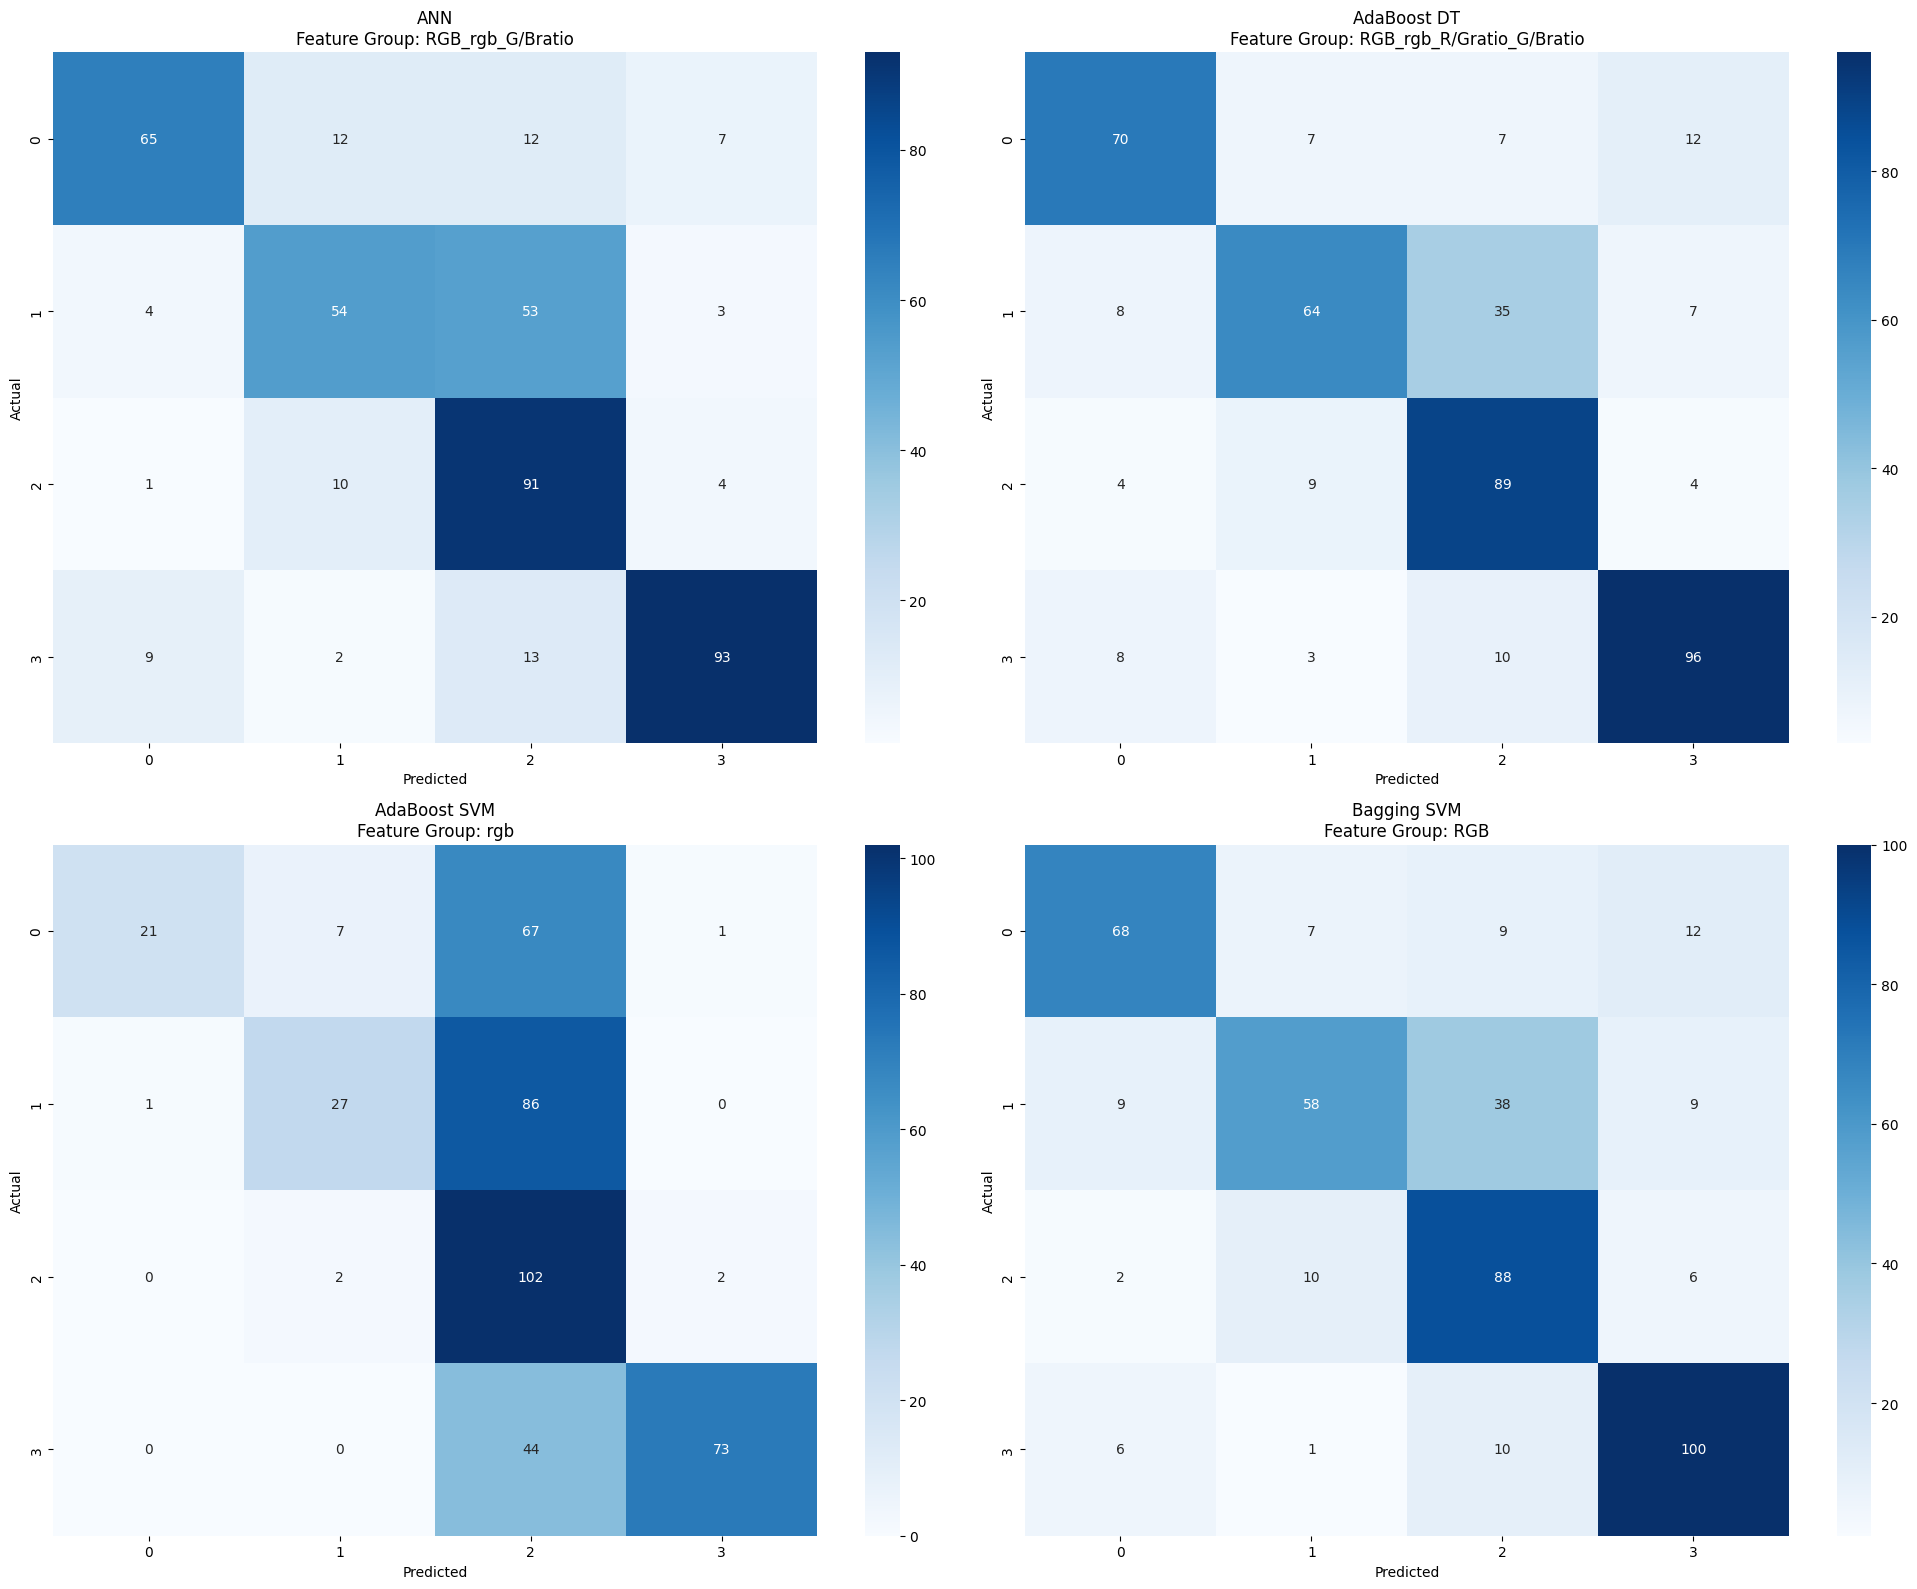

In [120]:
visualize_top_feature_combinations(
    data_prep=data_prep,
    results=results_dict_gb,
    metrics_df=metrics_dict_gb,
    models=model_names,
    method='gb'
)

### **Seleksi Fitur**

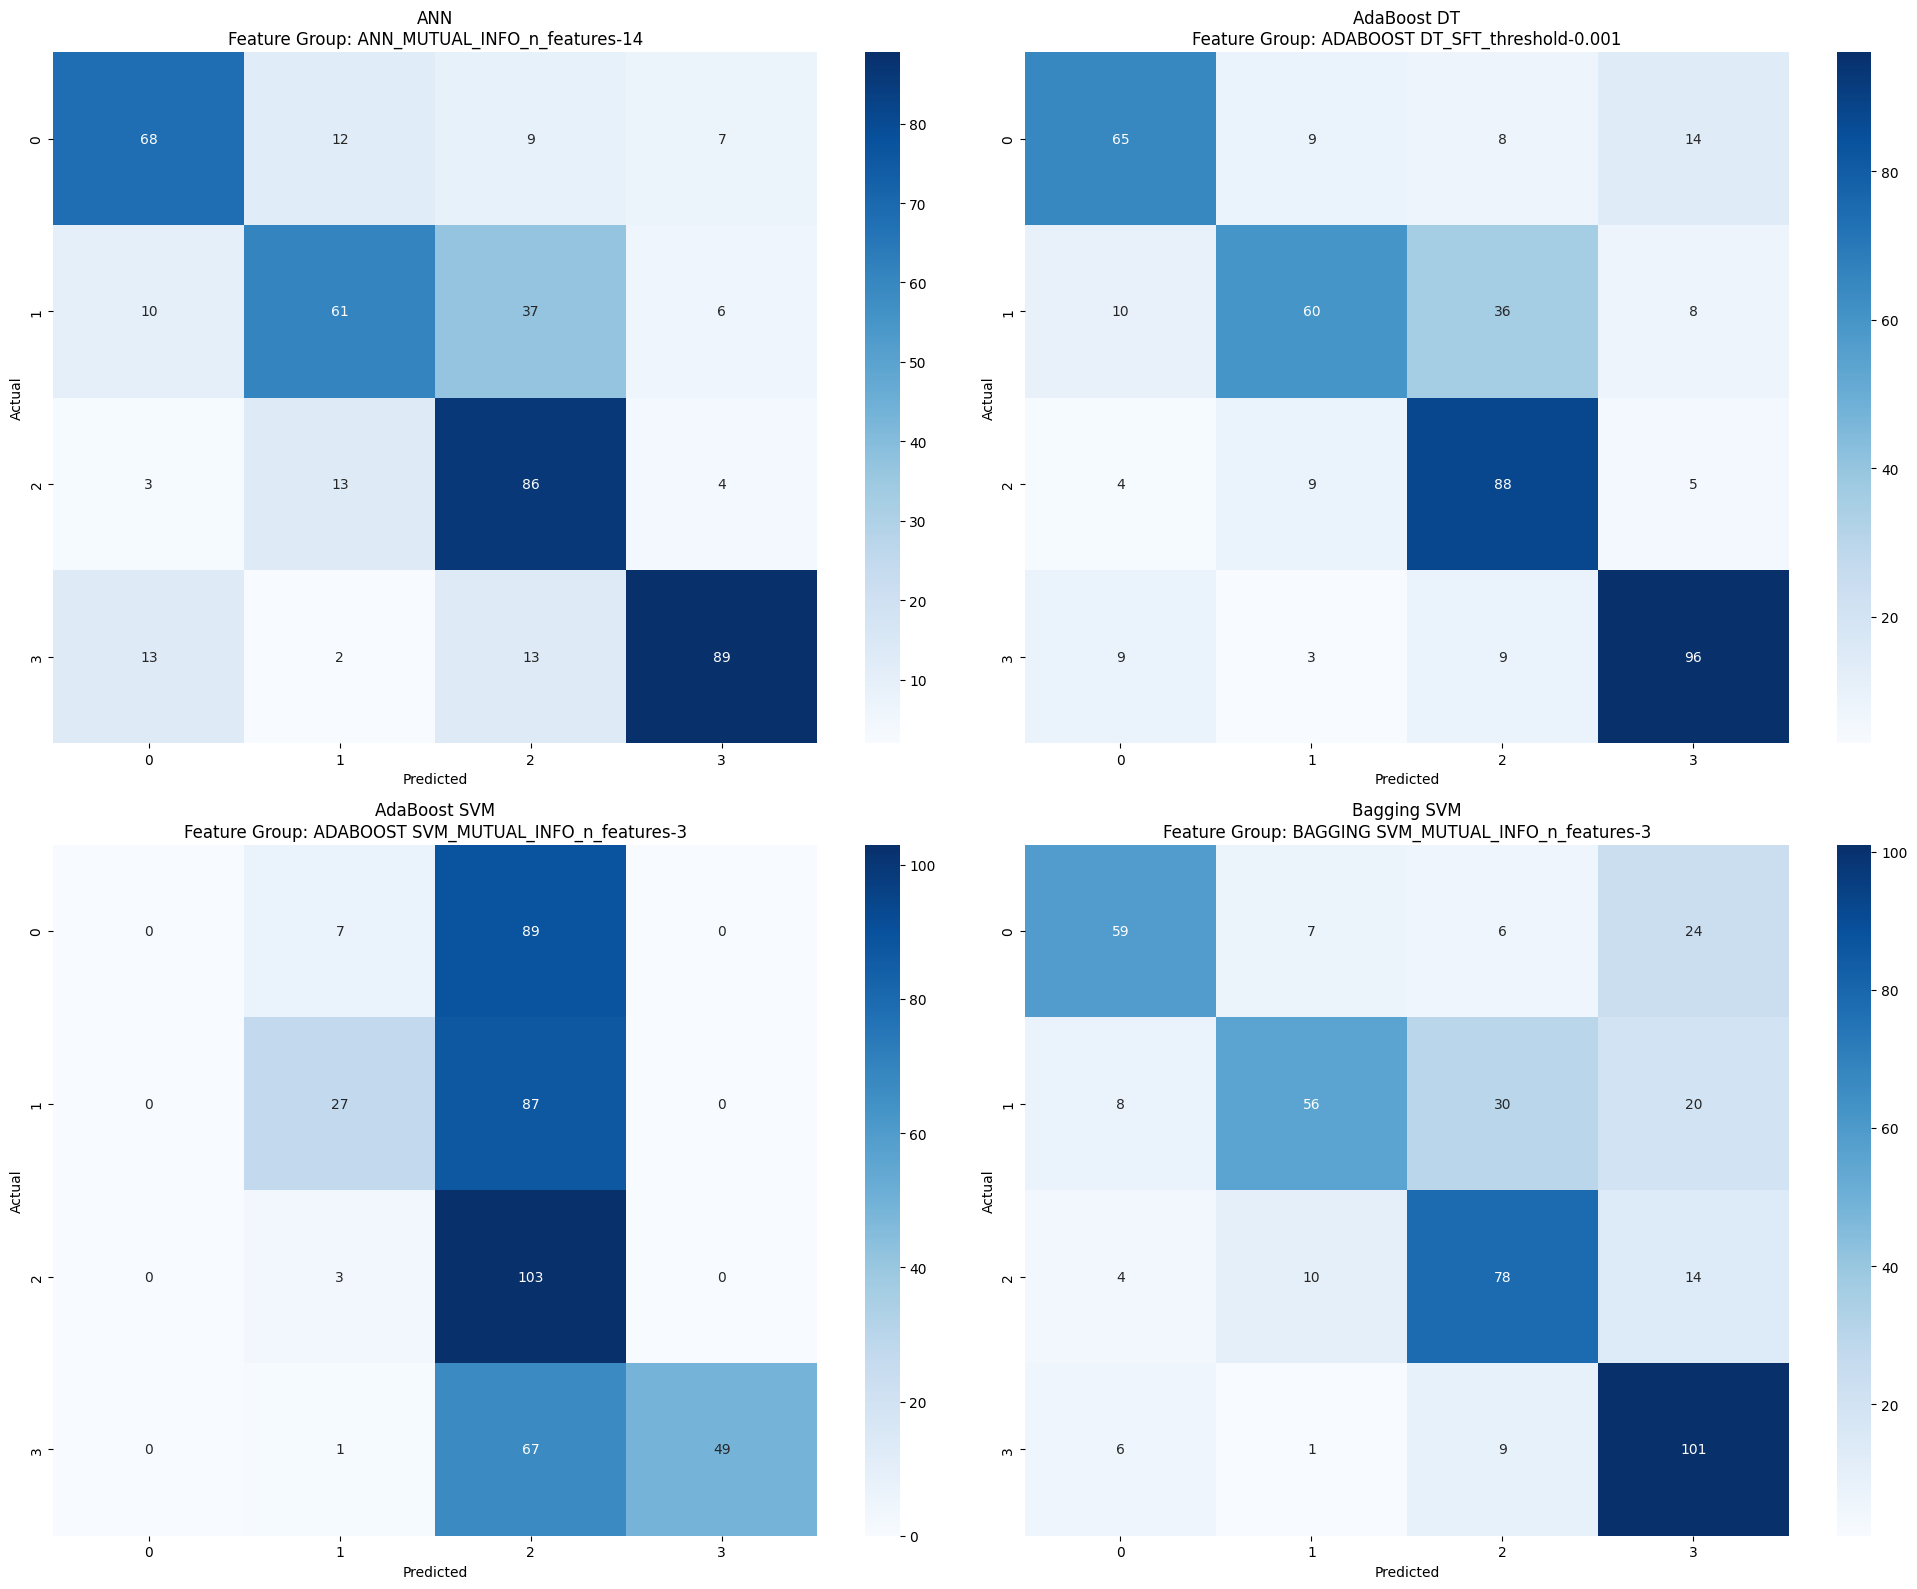

In [121]:
visualize_top_feature_combinations(
    data_prep=data_prep_selection,
    results=results_fs,
    metrics_df=metrics_dict_fs,
    models=model_names,
    method='ag'
)

### **Hyperparameter Tuning**

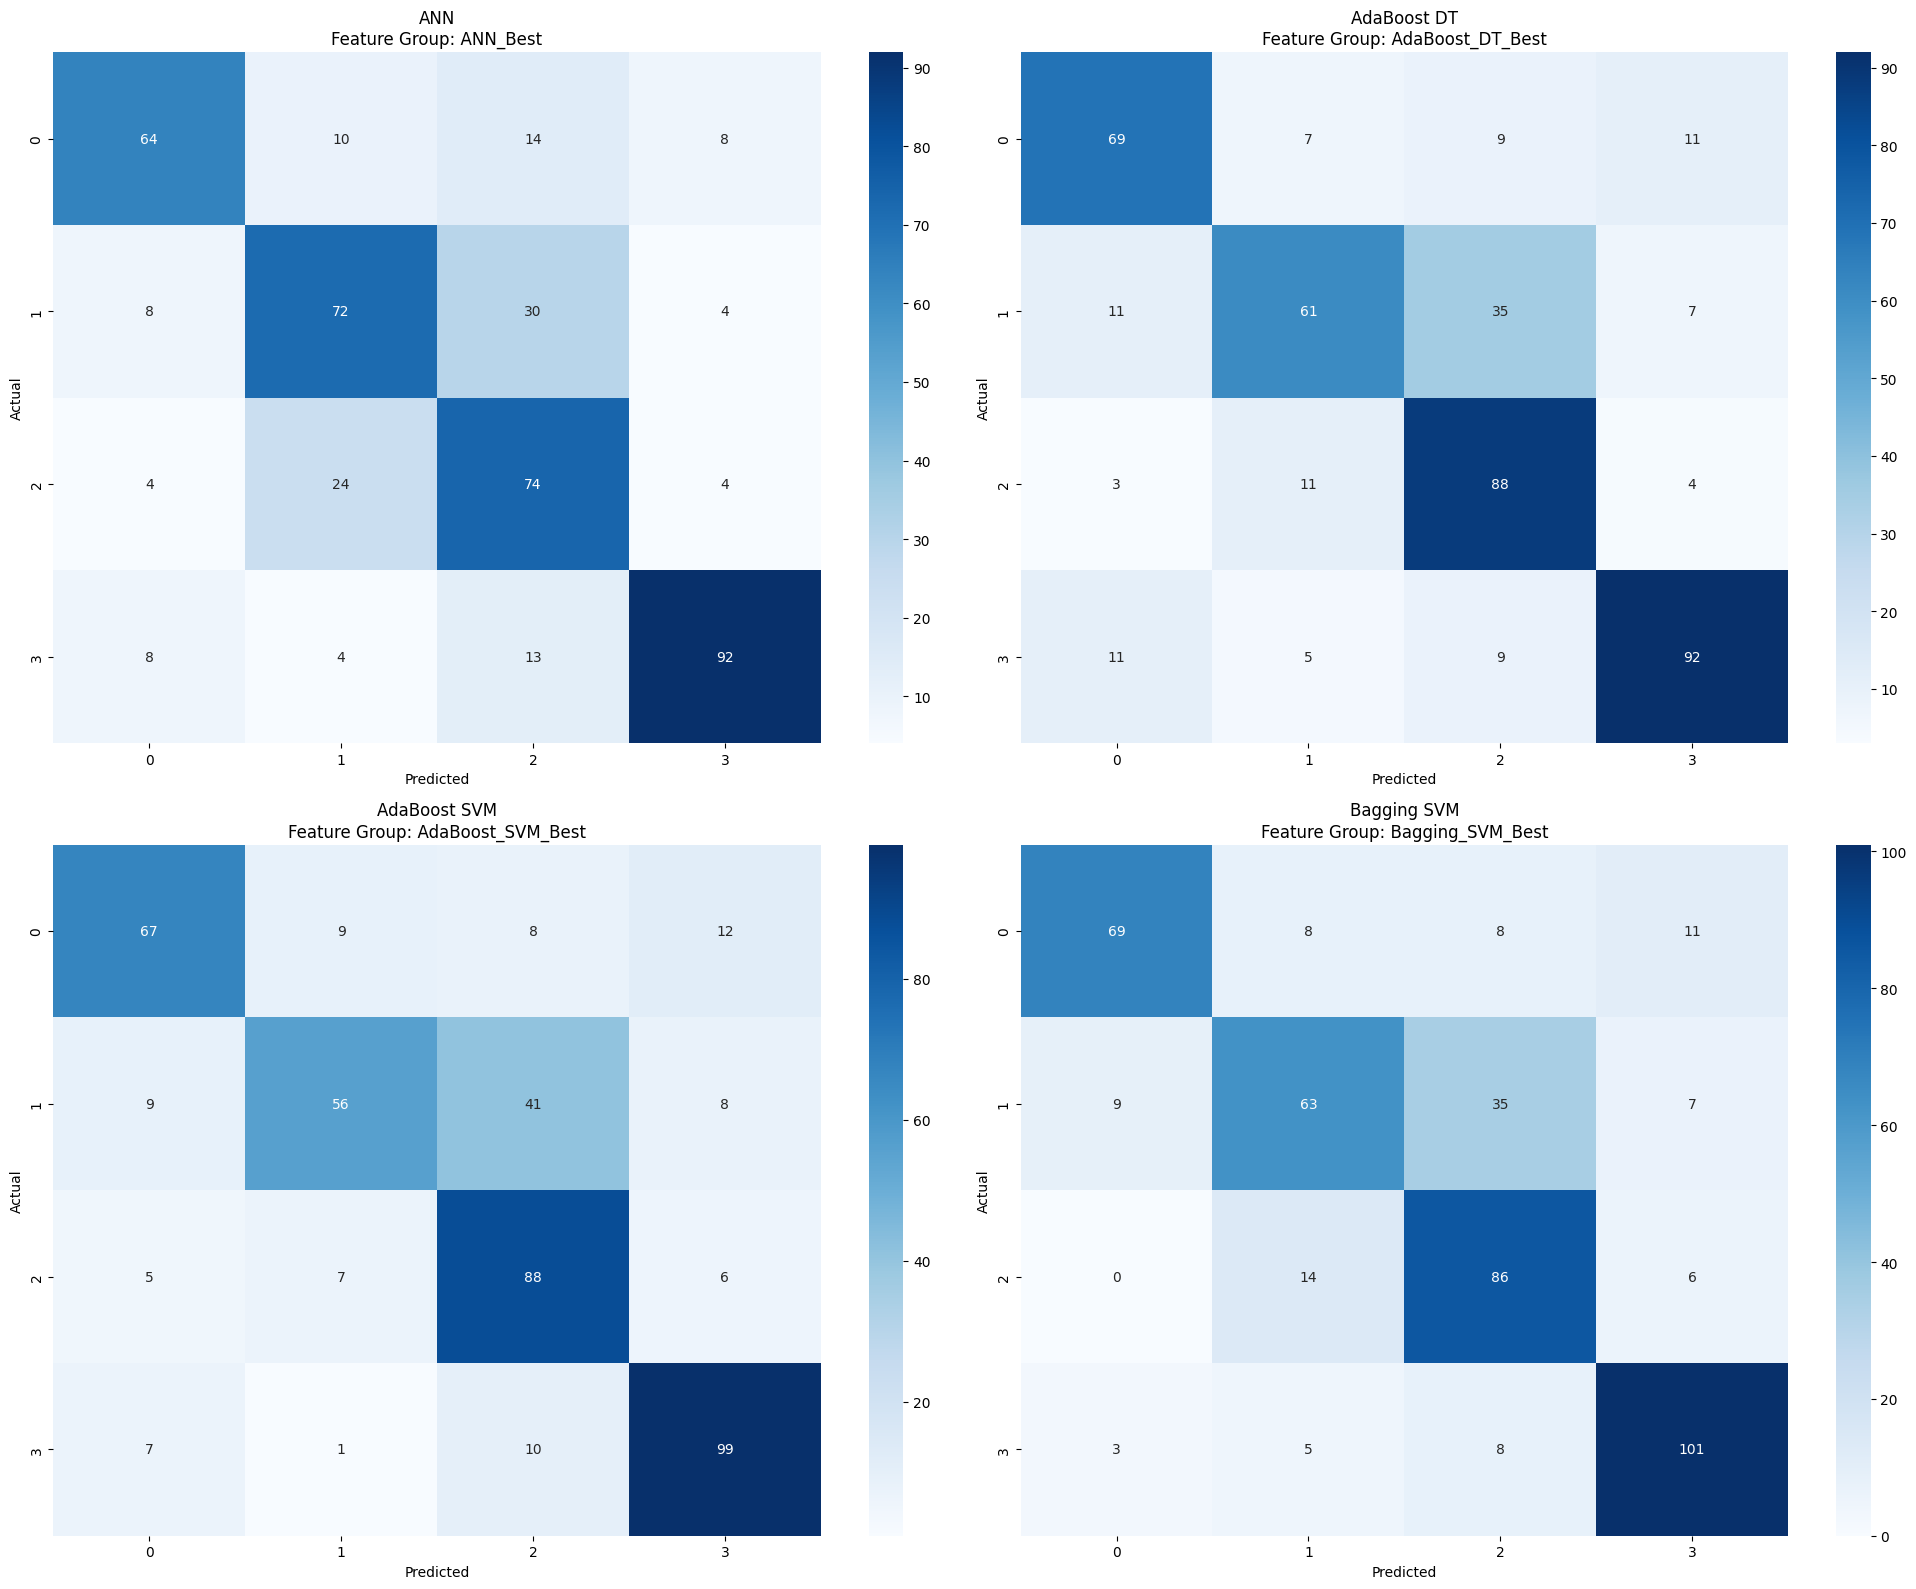

In [122]:
visualize_top_feature_combinations(
    data_prep=data_prep_finetuning,
    results=results_dict_ht,
    metrics_df=metrics_df_final_dict_ht,
    models=model_names,
    method='ht'
)

## **ROC-AUC**

### **Fungsi ROC-AUC**

In [123]:
def plot_roc_per_class(results, data_prep, metrics_df, models=None, method='gb', top_n=4):
    if models is None:
        models = metrics_df['Model'].unique().tolist()

    # Ambil sample y_test untuk cek jumlah kelas
    first_model = models[0]
    top_group_for_first = metrics_df[metrics_df['Model'] == first_model].nlargest(1, 'Test Accuracy')['Feature Group'].iloc[0]

    if method == 'gb':
        y_test_sample = data_prep[top_group_for_first]['y_test']
    elif method == 'ag':
        y_test_sample = data_prep['y_test']
    elif method == 'ht':
        y_test_sample = data_prep[top_group_for_first]['y_test']
    classes = np.unique(y_test_sample)
    n_classes = len(classes)

    # Setup figure dengan grid: 2 kolom per baris
    n_cols = 2
    n_rows = (n_classes + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
    axes = axes.flatten()  # Flatten agar mudah diiterasi

    # Warna untuk setiap model
    model_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray']
    model_color_map = {model: model_colors[i % len(model_colors)] for i, model in enumerate(models)}

    # Loop tiap kelas
    for cls_idx, class_label in enumerate(classes):
        ax = axes[cls_idx]
        ax.set_title(f"Class {class_label} - ROC Curve (All Models)")

        # Loop tiap model
        for model_name in models:
            color = model_color_map[model_name]

            # Ambil grup terbaik untuk model ini
            top_group = metrics_df[metrics_df['Model'] == model_name].nlargest(1, 'Test Accuracy')['Feature Group'].iloc[0]

            # Akses y_test dan y_prob sesuai method
            if method == 'gb':
                if top_group not in data_prep:
                    print(f"Skipping {model_name} ({top_group}): tidak ditemukan di data_prep")
                    continue
                y_test = data_prep[top_group]['y_test']
                y_prob = results[model_name][top_group]['test_results']['y_prob']
            elif method == 'ag':
                y_test = data_prep['y_test']
                y_prob = results[model_name][top_group]['test_results']['y_prob']
            elif method == 'ht':
                y_test = data_prep[top_group]['y_test']
                y_prob = results[model_name][top_group]['test_prob']

            # Binarize y_test untuk kelas tertentu
            y_test_bin = label_binarize(y_test, classes=classes)[:, cls_idx]

            # Hitung FPR, TPR, dan AUC
            fpr, tpr, _ = roc_curve(y_test_bin, y_prob[:, cls_idx])
            roc_auc = auc(fpr, tpr)

            # Plot ROC Curve
            if method == 'gb':
                ax.plot(
                    fpr, tpr,
                    color=color,
                    lw=1.5,
                    linestyle='-',
                    label=f'{model_name} ({top_group}, AUC = {roc_auc:.2f})'
                )
            elif method == 'ag' or method == 'ht':
                ax.plot(
                    fpr, tpr,
                    color=color,
                    lw=1.5,
                    linestyle='-',
                    label=f'({top_group}, AUC = {roc_auc:.2f})'
                )

        # Tambahkan diagonal reference line
        ax.plot([0, 1], [0, 1], 'k--', lw=1.5)
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc="lower right")

    # Nonaktifkan axis kosong jika jumlah kelas ganjil
    for i in range(len(classes), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

### **Gabungan Fitur**

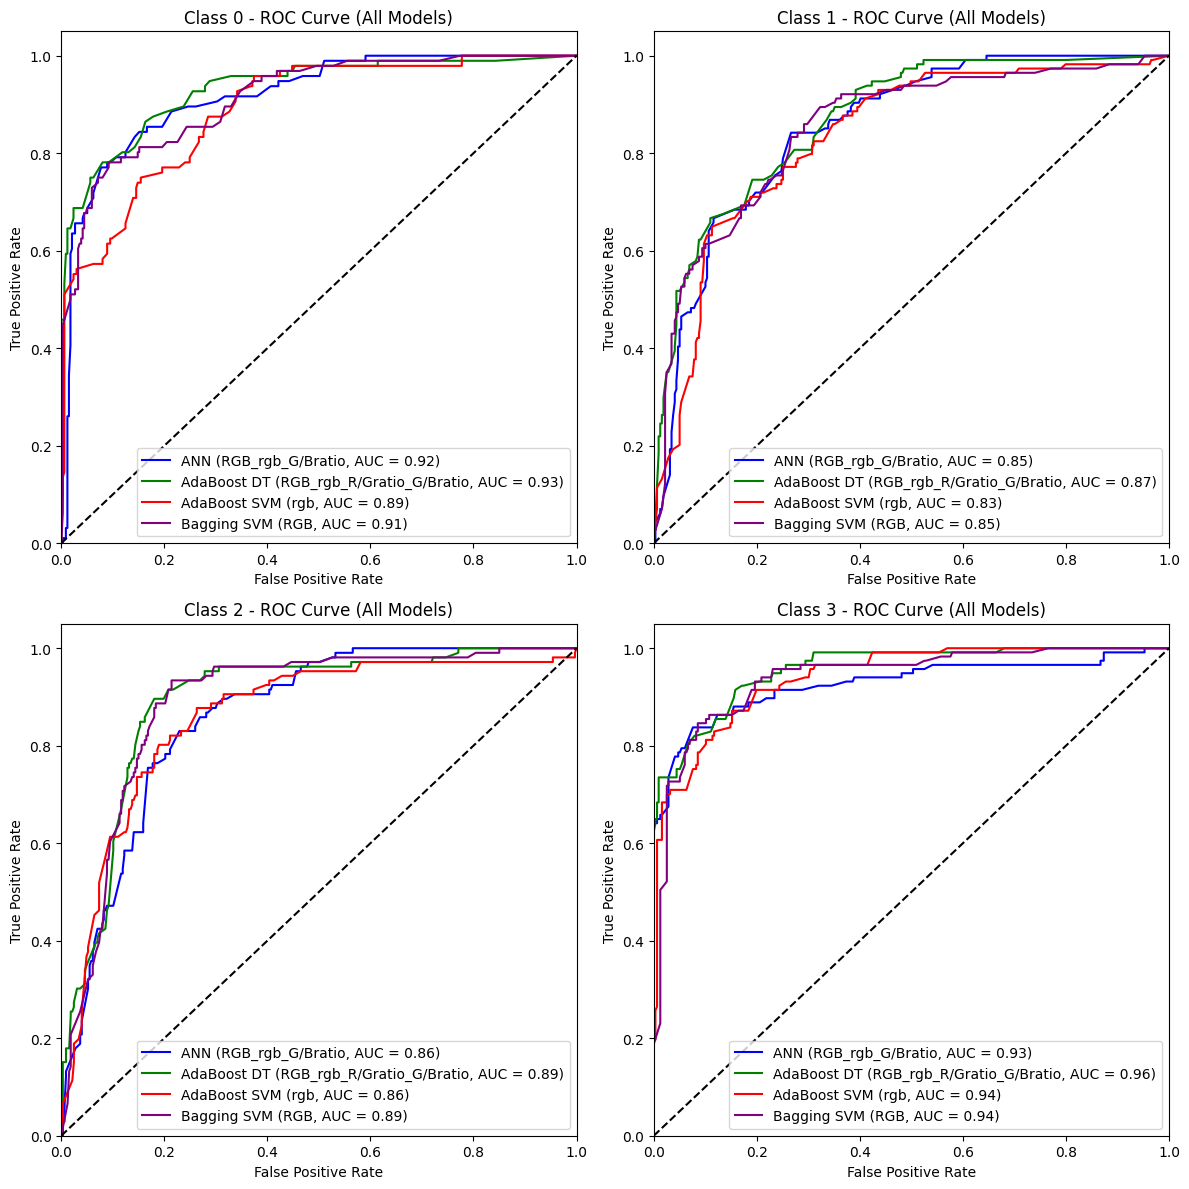

In [124]:
plot_roc_per_class(
    results=results_dict_gb,
    data_prep=data_prep,
    metrics_df=metrics_dict_gb,
    models=model_names,
    method='gb'
)

### **Seleksi Fitur**

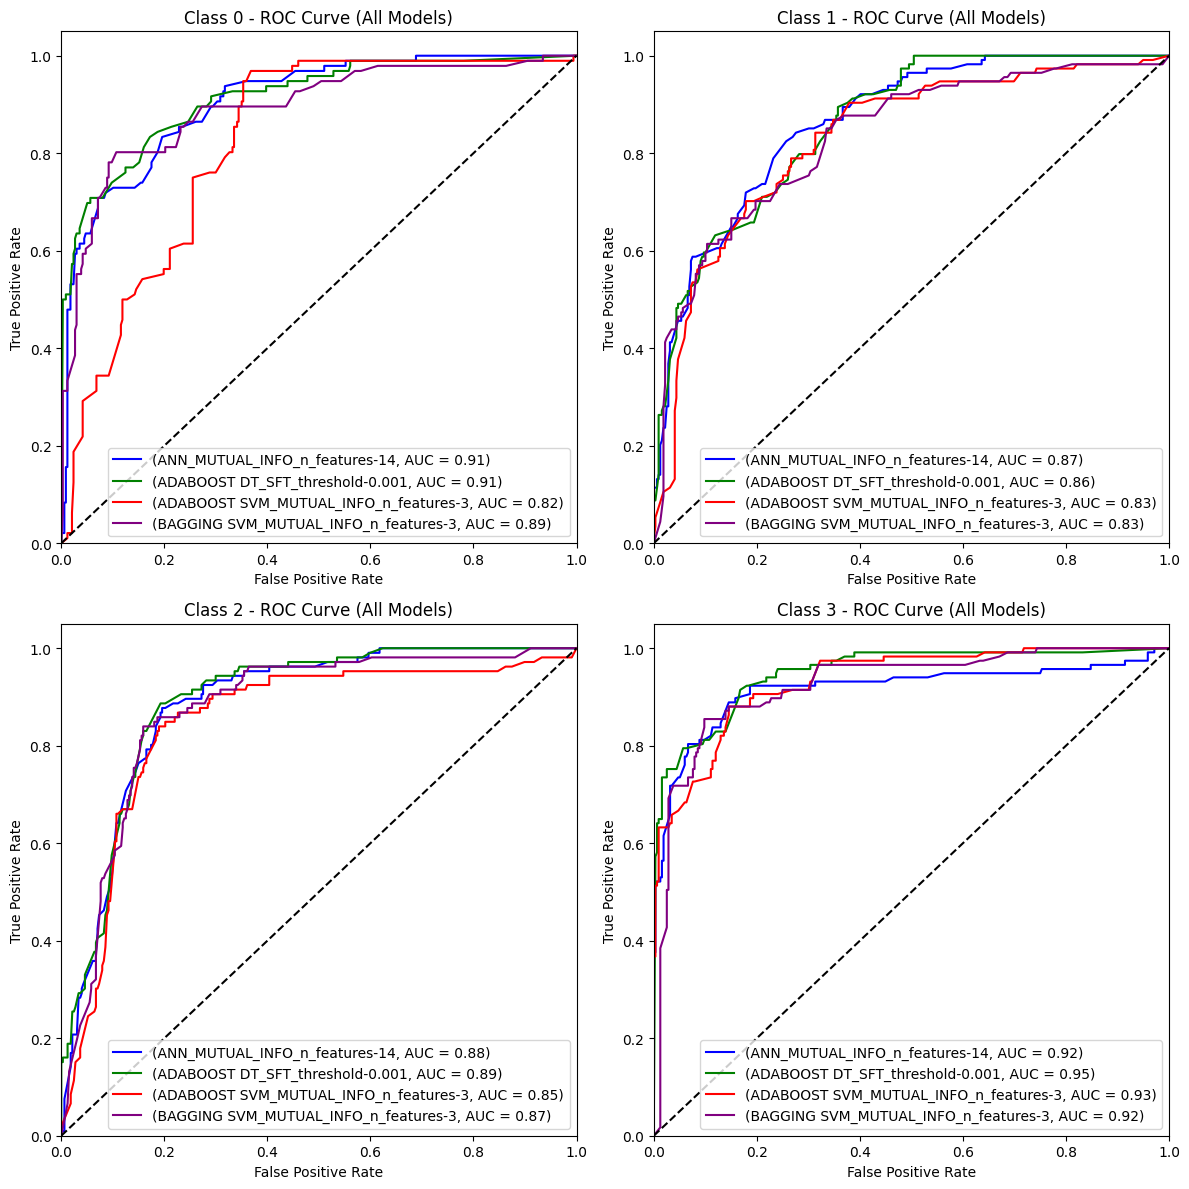

In [125]:
plot_roc_per_class(
    results=results_fs,
    data_prep=data_prep_selection,
    metrics_df=metrics_dict_fs,
    models=model_names,
    method='ag'
)

### **Hyperparameter Tuning**

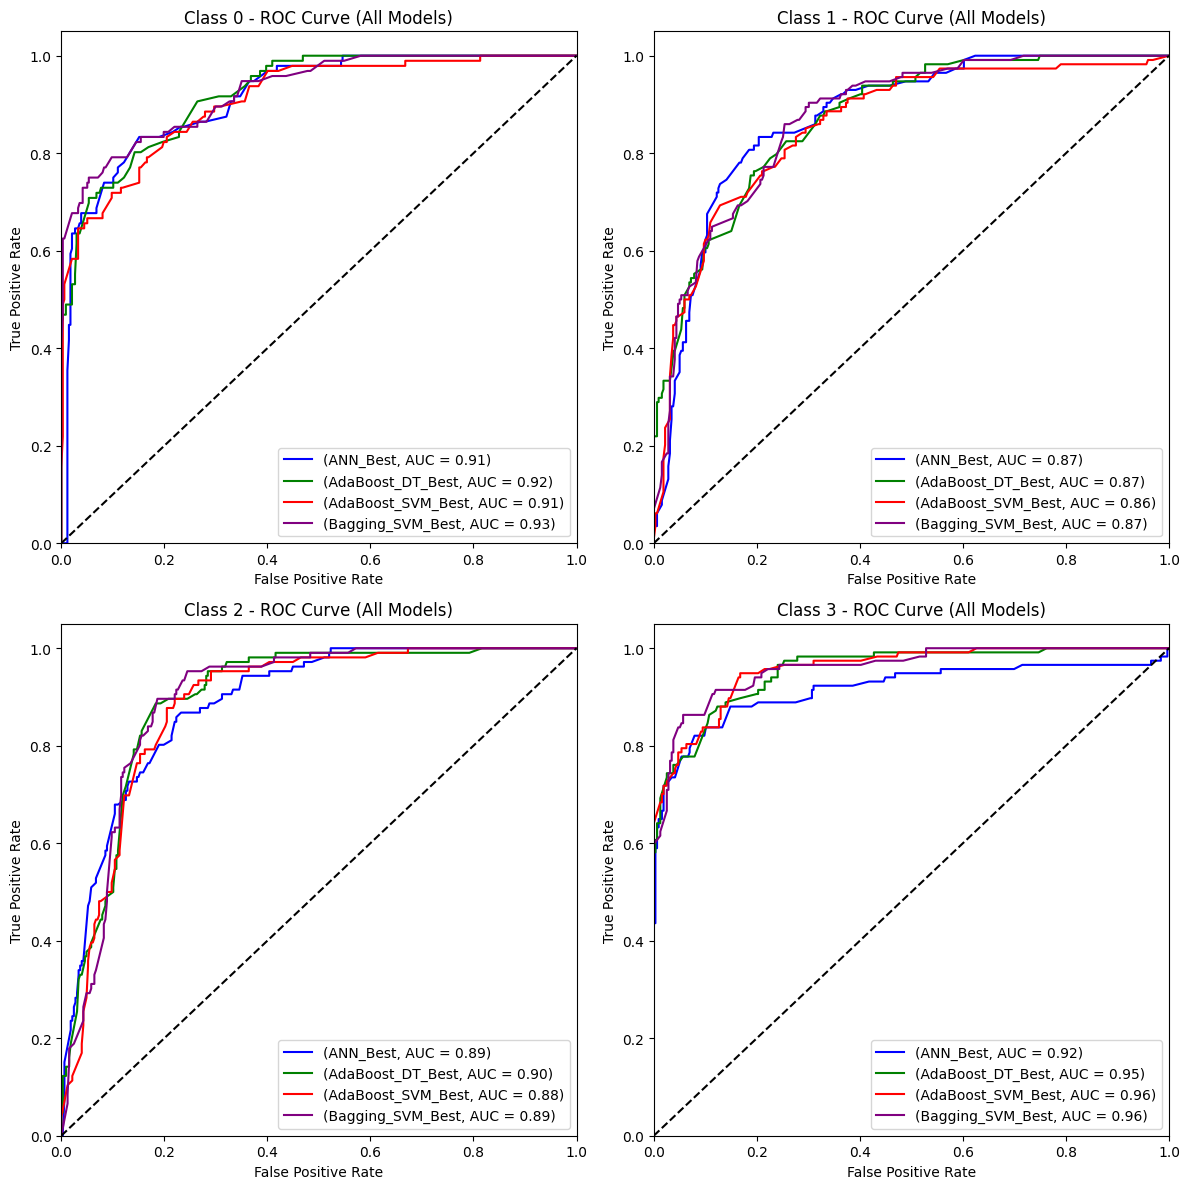

In [126]:
plot_roc_per_class(
    results=results_dict_ht,
    data_prep=data_prep_finetuning,
    metrics_df=metrics_df_final_dict_ht,
    models=model_names,
    method='ht'
)

## **Classification Report**

### **Fungsi Classification Report**

In [127]:
def visualize_model_feature_metrics(all_metrics_df, model_names, top_n=1):

    def get_metric_column(df, metric_name):
        """Mencari kolom metrik yang sesuai (Test atau Val)."""
        if f"Test {metric_name}" in df.columns:
            return f"Test {metric_name}"
        elif f"Val {metric_name}" in df.columns:
            return f"Val {metric_name}"
        else:
            raise KeyError(f"Kolom untuk '{metric_name}' tidak ditemukan dalam DataFrame.")

    n_models = len(model_names)

    # Atur layout grid berdasarkan jumlah model
    cols_per_row = 2 if n_models > 1 else 1  # Jika banyak model, 2 kolom per baris
    rows = (n_models + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 6, rows * 4))
    
    # Flatten axes agar mudah diiterasi
    axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

    plot_idx = 0  # Indeks subplot

    for model_name in model_names:
        # Filter data untuk model tertentu
        model_df = all_metrics_df[all_metrics_df['Model'] == model_name]
        if model_df.empty:
            raise ValueError(f"Tidak ada data untuk model '{model_name}' dalam DataFrame.")

        # Ambil top_n kombinasi fitur berdasarkan Test Accuracy
        accuracy_col = get_metric_column(model_df, "Accuracy")
        top_features_df = model_df.nlargest(top_n, accuracy_col)
        feature_group = top_features_df.iloc[0]['Feature Group']

        ax = axes[plot_idx]

        # Ambil metrik
        metrics = top_features_df.iloc[0]
        labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
        values = [
            metrics[get_metric_column(model_df, "Accuracy")],
            metrics[get_metric_column(model_df, "Precision")],
            metrics[get_metric_column(model_df, "Recall")],
            metrics[get_metric_column(model_df, "F1-Score")]
        ]

        # Plot barchart
        bars = sns.barplot(x=labels, y=values, ax=ax, palette='tab10',hue=labels)
        ax.set_title(f"{model_name} - {feature_group}")
        ax.set_ylim(0, 1)
        ax.set_ylabel('Score')
        ax.set_xlabel('Metrics')
        ax.grid(axis='y')

        # Label persentase di atas bar
        for bar, value in zip(bars.patches, values):
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{value:.2%}",
                ha='center',
                va='bottom',
                fontsize=10
            )

        plot_idx += 1

    # Hapus subplot kosong jika ada
    for i in range(plot_idx, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

### **Gabungan Fitur**

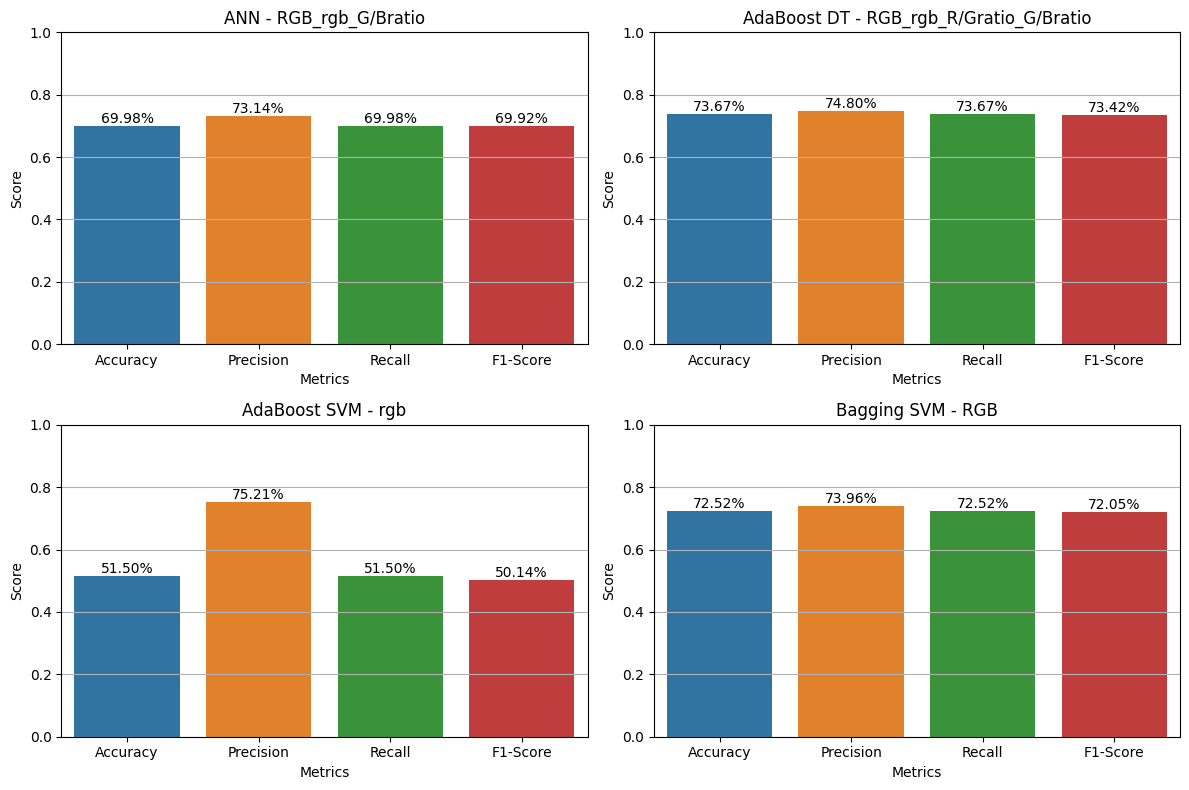

In [128]:
visualize_model_feature_metrics(
    all_metrics_df=metrics_dict_gb,
    model_names=model_names,
)

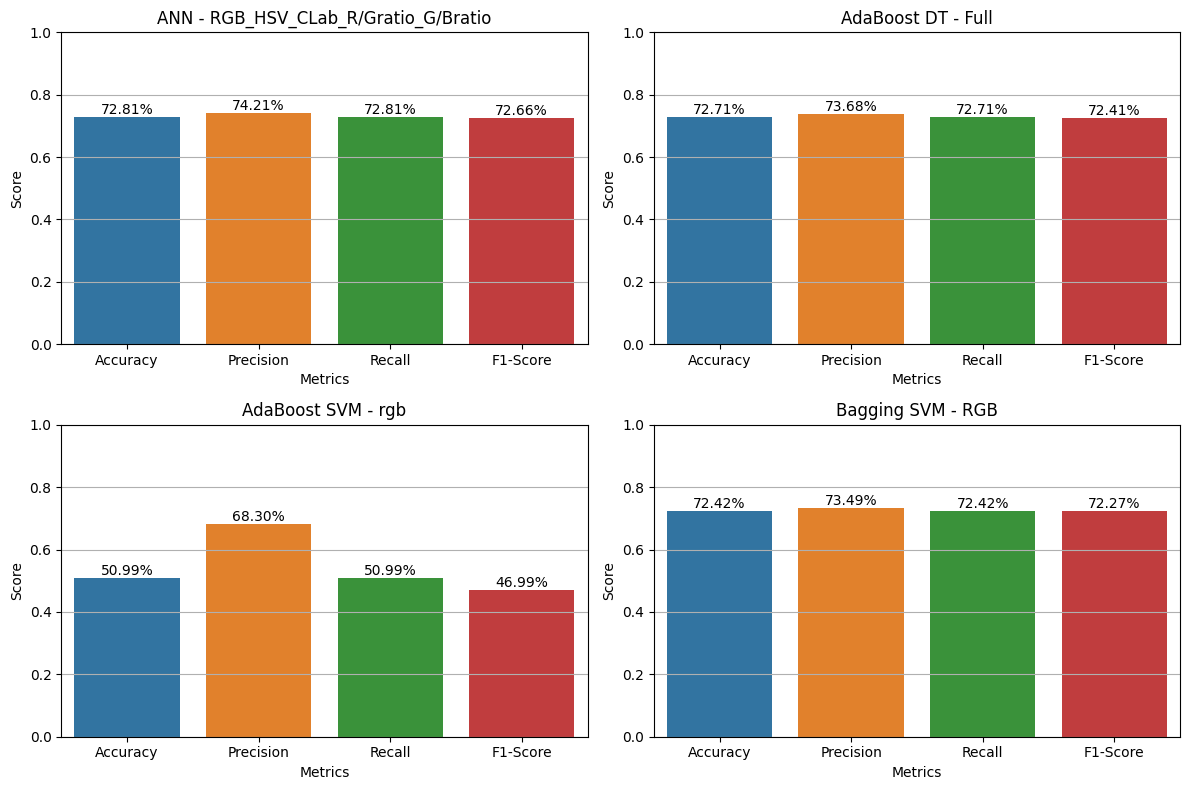

In [129]:
visualize_model_feature_metrics(
    all_metrics_df=metrics_dict_cv,
    model_names=model_names,
)

### **Seleksi Fitur**

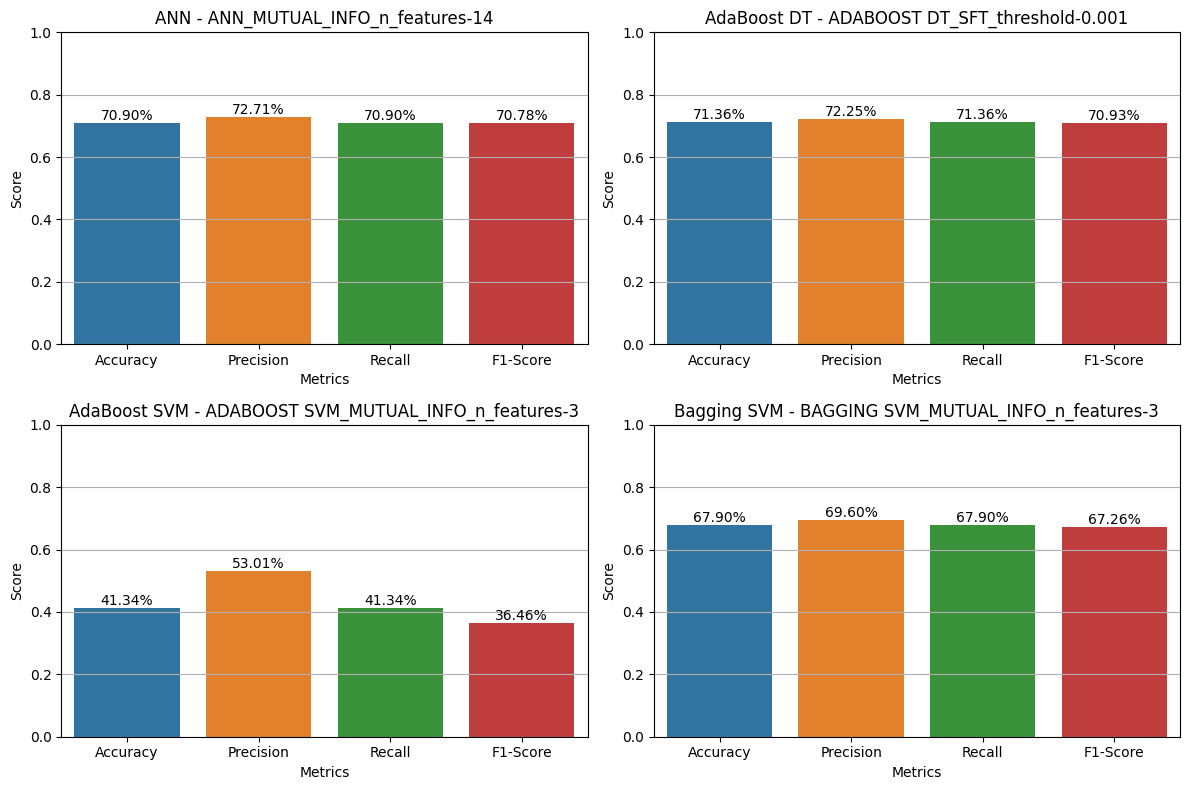

In [130]:
visualize_model_feature_metrics(
    all_metrics_df=metrics_dict_fs,
    model_names=model_names,
)

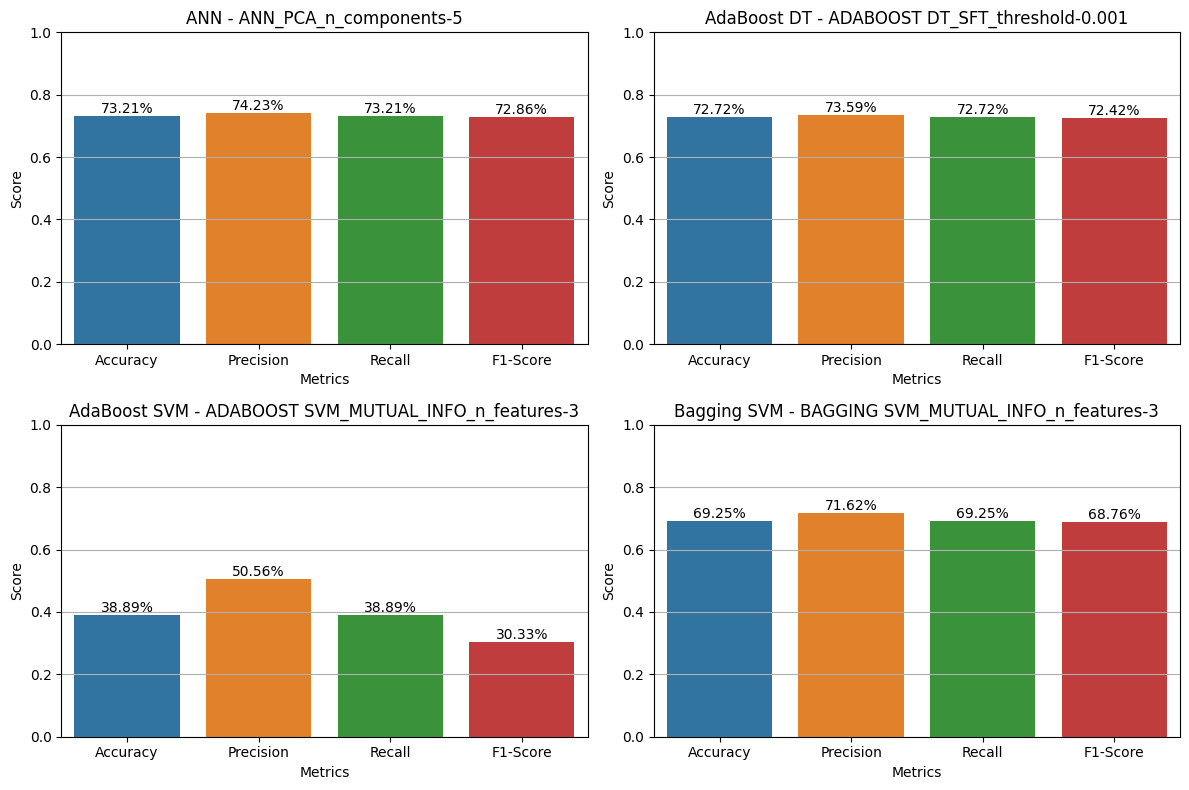

In [131]:
visualize_model_feature_metrics(
    all_metrics_df=metrics_dict_fs_cv,
    model_names=model_names,
)

### **Hyperparameter Tuning**

#### **Cross Validation**

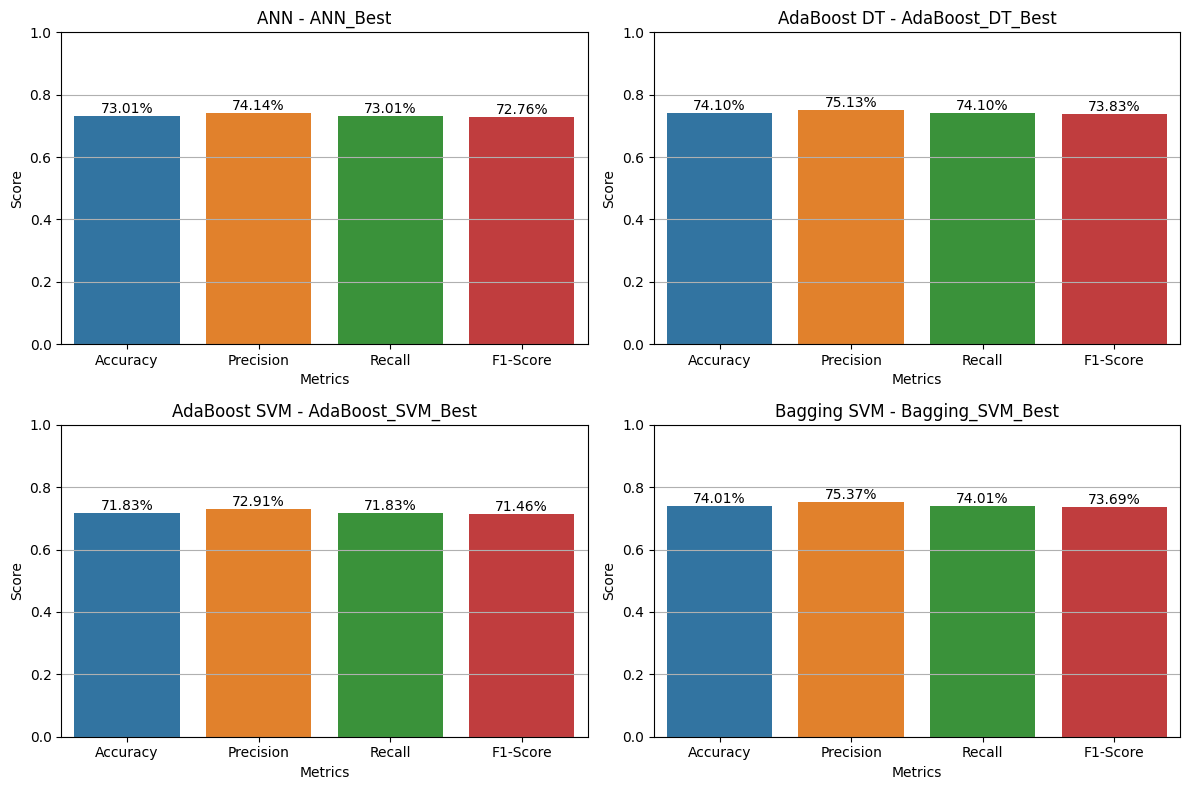

In [132]:
visualize_model_feature_metrics(
    all_metrics_df=metrics_dicts_average_cv,
    model_names=model_names,
)

#### **Final Model**

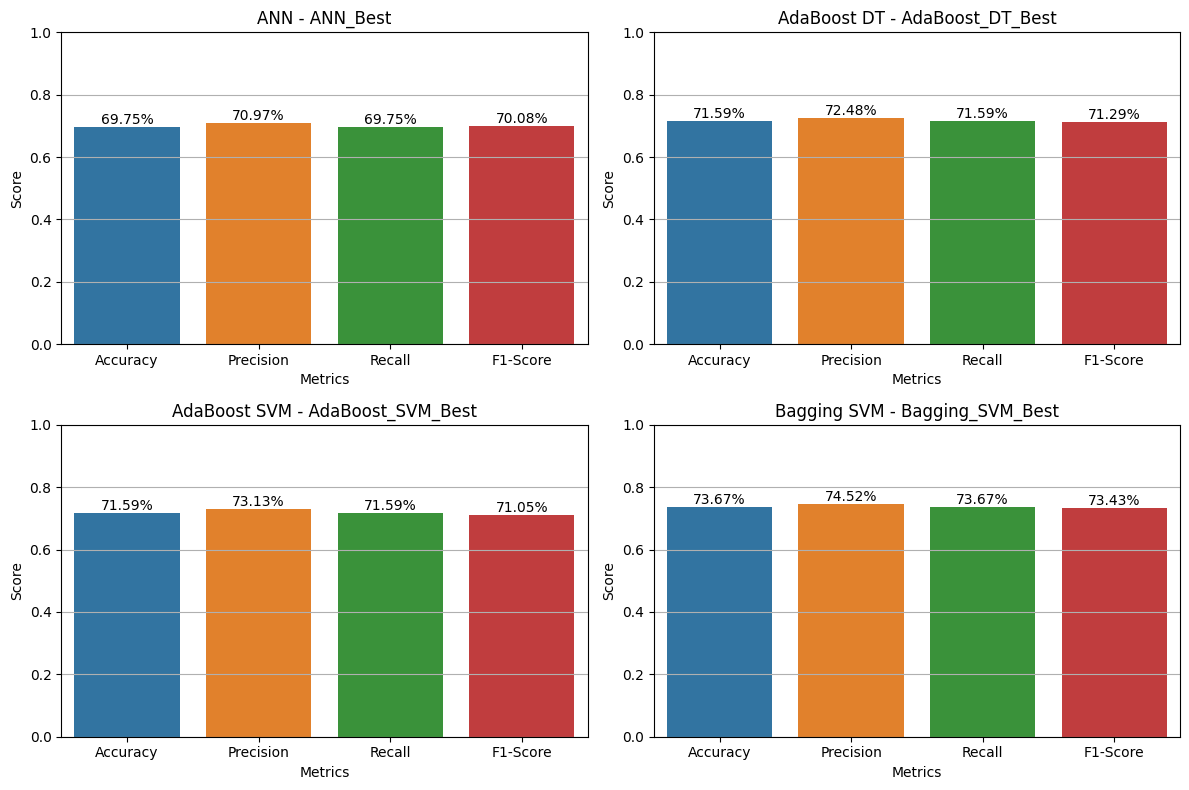

In [133]:
visualize_model_feature_metrics(
    all_metrics_df=metrics_df_final_dict_ht,
    model_names=model_names,
)